**CASE STUDY 3**



*Estimate the liquidity profile of Euro Area large banks by using regulatory indicators.*

In [ ]:
# load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import missingno as msno
from pylab import rcParams
from scipy import stats
import statistics


The dataset is downloaded from the **BankFocus** database.

In [ ]:
# load dataset
data_object = pd.read_excel('Case_Study_3_Dataset_2.xlsx', sheet_name = 'Results2')
data_euro_area21_22 = pd.read_excel('Net_Stable_Funding_EuroArea.xlsx')
lcr_euro_area = pd.read_excel('LCR_ratio_euro_area.xlsx')
gsib_df = pd.read_excel('GSIB_22_21.xlsx')

In [ ]:
data_object = data_object.replace('n.a.', np.nan)

# view dataset
data_object.head()

Company name Latin alphabet  Country Consolidation code  \
0                 BNP PARIBAS   France                 C2   
1          CREDIT AGRICOLE SA   France                 C2   
2          BANCO SANTANDER SA    Spain                 C2   
3            SOCIETE GENERALE   France                 C2   
4            DEUTSCHE BANK AG  Germany                 C2   

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2022  \
0                                             115.05               
1                                             114.20               
2                                             121.00               
3                                             113.60               
4                                             120.00               

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2021  \
0                                             121.58               
1                                             122.48               
2                                             126.00               
3                                                NaN               
4                                             121.00               

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2020  \
0                                                NaN               
1                                                NaN               
2                                              120.0               
3                                                NaN               
4                                                NaN               

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2019  \
0                                                NaN               
1                                                NaN               
2                                              112.0               
3                                                NaN               
4                                                NaN               

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2018  \
0                                                NaN               
1                                                NaN               
2                                              114.0               
3                                                NaN               
4                                                NaN               

   Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2022  \
0                                              129.0              
1                                              162.7              
2                                              152.0              
3                                              141.0              
4                                              141.6              

   Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2021  \
0                                              143.0              
1                                              183.0              
2                                              163.0              
3                                              129.0              
4                                              133.1              

   Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2020  \
0                                              154.0              
1                                                NaN              
2                                              168.0              
3                                              149.0              
4                                              144.8              

   Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2019  \
0                                              125.0              
1                                              131.6              
2                                              147.0              
3                                              119.0              
4                                             

In order to better visualize the data, we decide to *change* the column names of each dataset, according to their meaning:

In [ ]:
# dataframe
data_object_pd = pd.DataFrame(data_object)

# rename columns
data_object_pd.rename(columns = {'Company name Latin alphabet':'Company',
                                 'Consolidation code':'C_code',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2022':'NSFR_22',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2021':'NSFR_21',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2020':'NSFR_20',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2019':'NSFR_19',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2018':'NSFR_18',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2022':'LCR_22',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2021':'LCR_21',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2020':'LCR_20',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2019':'LCR_19',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2018':'LCR_18',
                                 'Total assets\nm EUR 2022':'TotAss_22',
                                 'Total assets\nm EUR 2021':'TotAss_21',
                                 'Total assets\nm EUR 2020':'TotAss_20',
                                 'Total assets\nm EUR 2019':'TotAss_19',
                                 'Total assets\nm EUR 2018':'TotAss_18',
                                 }, inplace = True)

In [ ]:
# describe dataset
data_object.describe()

NSFR_22     NSFR_21     NSFR_20     NSFR_19     NSFR_18      LCR_22  \
count   82.000000   81.000000   45.000000   40.000000   32.000000   87.000000   
mean   130.123733  133.772377  130.275333  120.767000  122.751563  185.792701   
std     31.232837   27.688926   14.264800   14.275362   11.877883   90.327448   
min    102.000000  104.600000  105.150000   79.000000  100.000000  107.600000   
25%    112.775000  116.253700  121.020000  112.000000  114.000000  141.050000   
50%    126.500000  130.000000  128.600000  121.700000  121.050000  161.000000   
75%    136.510000  142.493000  139.700000  130.625000  131.087500  199.000000   
max    352.760000  325.250000  173.000000  156.000000  148.900000  786.990000   

           LCR_21      LCR_20       LCR_19      LCR_18     TotAss_22  \
count   85.000000   85.000000    77.000000   72.000000  1.090000e+02   
mean   217.083882  209.460588   187.394961  170.728333  2.972693e+05   
std    130.241313  125.352809   197.039794   77.265433  4.420492e+05   
min    107.000000  105.000000    97.000000   62.000000  3.004862e+04   
25%    158.000000  150.000000   131.600000  128.750000  6.042400e+04   
50%    182.000000  171.000000   148.000000  147.000000  1.075070e+05   
75%    221.410000  211.000000   173.300000  185.250000  3.241740e+05   
max    949.000000  885.960000  1804.000000  519.000000  2.666376e+06   

          TotAss_21     TotAss_20     TotAss_19     TotAss_18  
count  1.090000e+02  1.090000e+02  1.090000e+02  1.090000e+02  
mean   2.929086e+05  2.799903e+05  2.481734e+05  2.388391e+05  
std    4.348612e+05  4.170647e+05  3.748148e+05  3.602081e+05  
min    2.774100e+04  2.530242e+04  2.259691e+04  2.130456e+04  
25%    5.840200e+04  5.361706e+04  4.771200e+04  4.598360e+04  
50%    1.040101e+05  9.431600e+04  8.375440e+04  8.046200e+04  
75%    3.123040e+05  3.207430e+05  2.566300e+05  2.452010e+05  
max    2.634444e+06  2.488491e+06  2.164713e+06  2.040836e+06

The majority of *data_object* dataset consists of continuous attributes (about 83.33%), representing the annual liquidity ratios and the total assets collected from 2018 to 2022. The remaining features (about 16.67%) refer to:
*   ***Company*** name in Latin alphabet;
*   ***Country*** in the Euro Area, where company is domiciled;
*   ***Consolidation code***, the attribute used to group similar object levels into categories for reporting.

Since we need to estimate the liquidity profile of Euro Area ***large*** *banks*, we notice that the banks presenting the consolidated accounts with an unconsolidated companion, show the *greatest* results in the ***size*** assessment. For this reason, we decide to filter our data by considering the **C2** Consolidation Code.

Let's now perform the ***missing*** *values* analysis in order to evaluate whether our sample can be considered as a good *representation* of the population:

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
percent_missing = data_object.isnull().sum() * 100 / len(data_object)
print(percent_missing)

Company       0.000000
Country       0.000000
C_code        0.000000
NSFR_22      24.770642
NSFR_21      25.688073
NSFR_20      58.715596
NSFR_19      63.302752
NSFR_18      70.642202
LCR_22       20.183486
LCR_21       22.018349
LCR_20       22.018349
LCR_19       29.357798
LCR_18       33.944954
TotAss_22     0.000000
TotAss_21     0.000000
TotAss_20     0.000000
TotAss_19     0.000000
TotAss_18     0.000000
dtype: float64


In [ ]:
percent_missing_table = missing_values_table(data_object)
percent_missing_table

Your selected dataframe has 18 columns.
There are 10 columns that have missing values.


Missing Values  % of Total Values
NSFR_18              77               70.6
NSFR_19              69               63.3
NSFR_20              64               58.7
LCR_18               37               33.9
LCR_19               32               29.4
NSFR_21              28               25.7
NSFR_22              27               24.8
LCR_21               24               22.0
LCR_20               24               22.0
LCR_22               22               20.2

Inspecting the results, we can notice that the features that contain ***most*** of the missing observations are: NSFR_18 (*70.6%*), NSFR_19 (*63.3%*) and NSFR_20 (*58.7%*). Then, we have the LCR_18 (*33.9%*), LCR_19 (*29.4%*), NSFR_21 (*25.7%*), NSFR_22 (*24.8%*), LCR_21 (*22.0%*), LCR_20 (*22.0%*) and LCR_22 (*20.2%*). The remaining variables do *not* have any missing values.

Text(-0.01, -0.2, 'Source of the data: BankFocus')

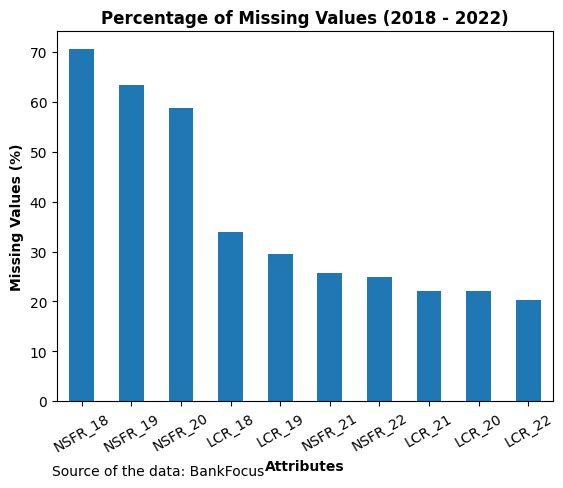

In [ ]:
pl = percent_missing_table['% of Total Values'].plot(kind = 'bar', rot = 30)
pl.set_title('Percentage of Missing Values (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Attributes', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Missing Values (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = pl.transAxes)

Considering the time frame *2018 - 2020*, Liquidity Coverage Ratio and Net Stable Funding Ratio have a huge percentage of missing values.

In fact, although the implementation of a binding NSFR was originally planned for the 1st of January 2018, it was pushed back in connection with the overhaul of the EU banking packege, and the binding NSFR became effective only in **July 2021**, two years after the Capital Requirements Regulation (CRR) comes into force.

# **1. NSFR**

Let's start considering the Net Stable Funding Ratio.

The **NSFR** establishes a minimum acceptable amount of *medium-long* term funding in front of the banks' assets and activities. It aims to *limit* over-reliance on short-term wholesale funding during times of buoyant market liquidity and encourage better *assessment* of liquidity risk across all on- and off-balance sheet items.

The ratio is given by the ***available*** amount of stable funding over the ***required*** amount of stable funding, that has to be *greater* than ***100%***.

The *stable funding* is defined as the portion of equity capital and liability financing that is expected to be a *reliable* source of funds over a ***1-year*** time horizon.

In [ ]:
nsfr = data_object[['Company', 'Country', 'NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22',
                    'TotAss_18', 'TotAss_19', 'TotAss_20', 'TotAss_21', 'TotAss_22']]
#nsfr
nsfr.shape

(109, 12)

Text(-0.01, -0.2, 'Source of the data: BankFocus')

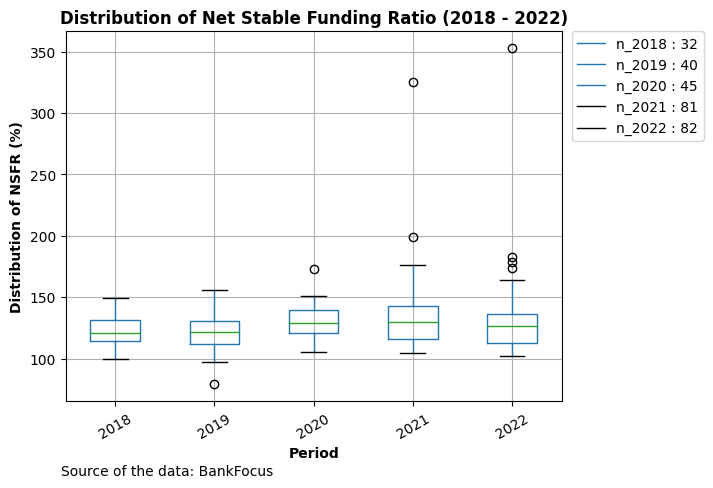

In [ ]:
nsfr_only = nsfr[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
#nsfr_only

bp = nsfr_only.boxplot(rot = 30)
nobs = nsfr[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']].count()
nobs = [str(x) for x in nobs.tolist()]
nobs = [f'NSFR_{18+i} n:{nobs[i]}' for i in range(len(nobs))]
bp.legend(['n_2018 : 32', 'n_2019 : 40', 'n_2020 : 45', 'n_2021 : 81', 'n_2022 : 82'], bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
bp.set_title('Distribution of Net Stable Funding Ratio (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('Distribution of NSFR (%)', fontweight = 'bold', fontsize = 10)
bp.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

In [ ]:
# drop rows with NaN
nsfr_df = nsfr.dropna(axis = 'rows')

nsfr_df.shape

(28, 12)

In [ ]:
nsfr_df.value_counts('Country')

Country
Belgium        4
Ireland        4
Italy          4
Portugal       4
Spain          4
Austria        2
France         2
Germany        2
Netherlands    2
dtype: int64

Text(-0.01, -0.2, 'Source of the data: BankFocus')

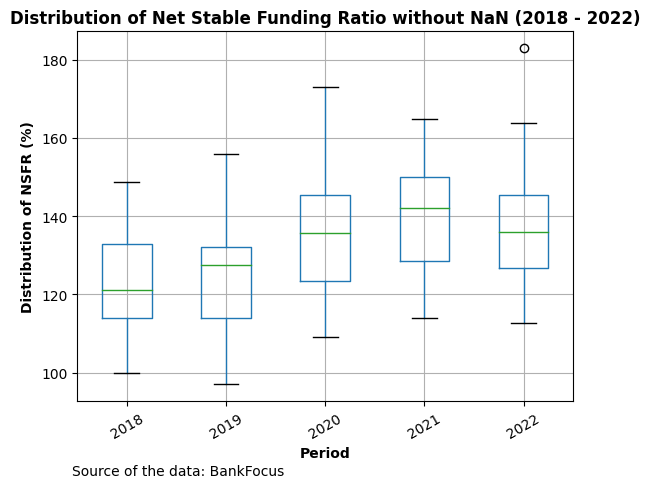

In [ ]:
nsfr_only_df = nsfr_df[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
#nsfr_only_df

bp = nsfr_only_df.boxplot(rot = 30)
nobs = nsfr[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']].count()
nobs = [str(x) for x in nobs.tolist()]
nobs = [f'NSFR_{18+i} n:{nobs[i]}' for i in range(len(nobs))]
#bp.legend(['n_2018 : 28', 'n_2019 : 28', 'n_2020 : 28', 'n_2021 : 28', 'n_2022 : 28'], bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
bp.set_title('Distribution of Net Stable Funding Ratio without NaN (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('Distribution of NSFR (%)', fontweight = 'bold', fontsize = 10)
bp.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

In [ ]:
# threshold > 100%
nsfr_100 = nsfr[(nsfr['NSFR_22'] > 100) | (nsfr['NSFR_21'] > 100) | (nsfr['NSFR_20'] > 100) | (nsfr['NSFR_19'] > 100) | (nsfr['NSFR_18'] > 100)]

# drop rows with NaN
nsfr100_df = nsfr_100.dropna(axis = 'rows')

nsfr100_df.shape

(28, 12)

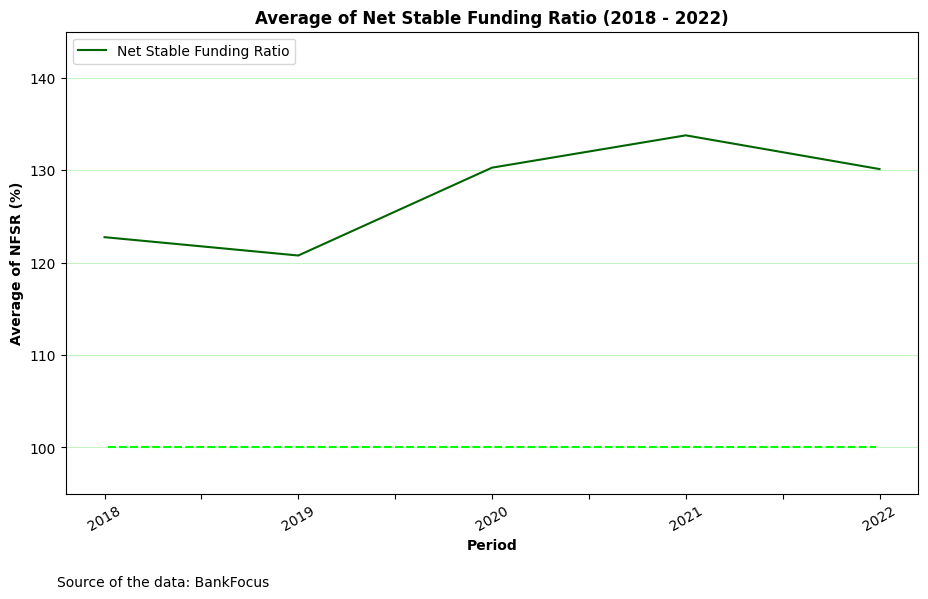

In [ ]:
# MEAN
nsfr_only_df = nsfr_only.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
pl = nsfr_only_df.mean().T.plot(color = "purple", rot = 30, figsize = (11, 6))
pl.set_title('Average of Net Stable Funding Ratio (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of NFSR (%)', fontweight = 'bold', fontsize = 10)
pl.legend(['Net Stable Funding Ratio'], frameon = True, loc = 'upper left')
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
plt.ylim(95, 145)
pl.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = pl.transAxes)
plt.grid(color = 'lightgrey', linewidth = 0.4)

## *1.1. SIZE*

In [ ]:
nsfr_df.describe()

NSFR_18     NSFR_19     NSFR_20     NSFR_21     NSFR_22  \
count   28.000000   28.000000   28.000000   28.000000   28.000000   
mean   123.244643  123.931429  134.271071  138.961736  138.555218   
std     12.196033   13.138623   14.776494   14.489671   17.663524   
min    100.000000   97.000000  109.000000  114.000000  112.700000   
25%    114.000000  114.000000  123.510000  128.625000  126.734750   
50%    121.050000  127.500000  135.795000  142.246500  136.000000   
75%    133.000000  132.265000  145.400000  150.050000  145.425000   
max    148.900000  156.000000  173.000000  165.000000  183.000000   

          TotAss_18     TotAss_19     TotAss_20     TotAss_21     TotAss_22  
count  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01  2.800000e+01  
mean   1.873447e+05  1.970907e+05  2.096540e+05  2.307819e+05  2.340970e+05  
std    2.772623e+05  2.876624e+05  2.881096e+05  3.104749e+05  3.302605e+05  
min    3.156801e+04  3.181155e+04  3.381500e+04  3.031000e+04  3.181800e+04  
25%    5.747308e+04  5.854923e+04  7.559832e+04  9.032828e+04  9.039145e+04  
50%    1.076050e+05  1.152290e+05  1.220795e+05  1.371082e+05  1.297520e+05  
75%    1.683604e+05  2.146910e+05  2.237678e+05  2.149218e+05  2.285475e+05  
max    1.459271e+06  1.522695e+06  1.508250e+06  1.595835e+06  1.734659e+06

**We decided to separate the banks into 4 quartiles according to their total assets so as to see the behvaior of each quartile in terms of liquidity. In this part we analyse each quartile's behavior in terms of net stable funding ratio.**

In [ ]:
# Creating the Quartiles for years
%matplotlib inline
rcParams['figure.figsize'] = 12,8

#First quartile of elements for the sample according to total assets
Quart1_2018 = nsfr_df[(nsfr_df['TotAss_18']>=3.156801e+04) & (nsfr_df['TotAss_18']<=5.747308e+04)]
Quart1_2019 = nsfr_df[(nsfr_df['TotAss_19']>=3.181155e+04) & (nsfr_df['TotAss_19']<=5.854923e+04)]
Quart1_2020 = nsfr_df[(nsfr_df['TotAss_20']>=3.381500e+04) & (nsfr_df['TotAss_20']<=7.559832e+04)]
Quart1_2021 = nsfr_df[(nsfr_df['TotAss_21']>=3.031000e+04) & (nsfr_df['TotAss_21']<=9.032828e+04)]
Quart1_2022 = nsfr_df[(nsfr_df['TotAss_22']>=3.181800e+04) & (nsfr_df['TotAss_22']<=9.039145e+04)]

#Second quartile of elements for the sample according to total assets
Quart2_2018 = nsfr_df[(nsfr_df['TotAss_18']>=5.747308e+04) & (nsfr_df['TotAss_18']<=1.076050e+05)]
Quart2_2019 = nsfr_df[(nsfr_df['TotAss_19']>=5.854923e+04) & (nsfr_df['TotAss_19']<=1.152290e+05)]
Quart2_2020 = nsfr_df[(nsfr_df['TotAss_20']>=7.559832e+04) & (nsfr_df['TotAss_20']<=1.220795e+05)]
Quart2_2021 = nsfr_df[(nsfr_df['TotAss_21']>=9.032828e+04) & (nsfr_df['TotAss_21']<=1.371082e+05)]
Quart2_2022 = nsfr_df[(nsfr_df['TotAss_22']>=9.039145e+04) & (nsfr_df['TotAss_22']<=1.297520e+05)]

#Third quartile of elements for the sample according to total assets
Quart3_2018 = nsfr_df[(nsfr_df['TotAss_18']>=1.076050e+05) & (nsfr_df['TotAss_18']<=1.683604e+05)]
Quart3_2019 = nsfr_df[(nsfr_df['TotAss_19']>=1.152290e+05) & (nsfr_df['TotAss_19']<=2.146910e+05)]
Quart3_2020 = nsfr_df[(nsfr_df['TotAss_20']>=1.220795e+05) & (nsfr_df['TotAss_20']<=2.237678e+05)]
Quart3_2021 = nsfr_df[(nsfr_df['TotAss_21']>=1.371082e+05) & (nsfr_df['TotAss_21']<=2.149218e+05)]
Quart3_2022 = nsfr_df[(nsfr_df['TotAss_22']>=1.297520e+05) & (nsfr_df['TotAss_22']<=2.285475e+05)]

#Forth quartile of elements for the sample according to total assets
Quart4_2018 = nsfr_df[(nsfr_df['TotAss_18']>=1.683604e+05) & (nsfr_df['TotAss_18']<=1.459271e+06)]
Quart4_2019 = nsfr_df[(nsfr_df['TotAss_19']>=2.146910e+05) & (nsfr_df['TotAss_19']<=1.522695e+06)]
Quart4_2020 = nsfr_df[(nsfr_df['TotAss_20']>=2.237678e+05) & (nsfr_df['TotAss_20']<=1.508250e+06)]
Quart4_2021 = nsfr_df[(nsfr_df['TotAss_21']>=2.149218e+05) & (nsfr_df['TotAss_21']<=1.595835e+06)]
Quart4_2022 = nsfr_df[(nsfr_df['TotAss_22']>=2.285475e+05) & (nsfr_df['TotAss_22']<=1.734659e+06)]

In [ ]:
#Intersection for the first quartile
merge_1Q_18 = pd.merge(Quart1_2018, Quart1_2019, on = 'Company')
merge_1Q_19 = pd.merge(merge_1Q_18, Quart1_2020, on = 'Company')
merge_1Q_20 = pd.merge(merge_1Q_19, Quart1_2021, on = 'Company')
merge_1Q_21 = pd.merge(merge_1Q_20, Quart1_2022, on = 'Company')

#Intersection for the second quartile
merge_2Q_18 = pd.merge(Quart2_2018, Quart2_2019, on = 'Company')
merge_2Q_19 = pd.merge(merge_2Q_18, Quart2_2020, on = 'Company')
merge_2Q_20 = pd.merge(merge_2Q_19, Quart2_2021, on = 'Company')
merge_2Q_21 = pd.merge(merge_2Q_20, Quart2_2022, on = 'Company')

#Intersection for the third quartile
merge_3Q_18 = pd.merge(Quart3_2018, Quart3_2019, on = 'Company')
merge_3Q_19 = pd.merge(merge_3Q_18, Quart3_2020, on = 'Company')
merge_3Q_20 = pd.merge(merge_3Q_19, Quart3_2021, on = 'Company')
merge_3Q_21 = pd.merge(merge_3Q_20, Quart3_2022, on = 'Company')

#Intersection for the forth quartile
merge_4Q_18 = pd.merge(Quart4_2018, Quart4_2019, on = 'Company')
merge_4Q_19 = pd.merge(merge_4Q_18, Quart4_2020, on = 'Company')
merge_4Q_20 = pd.merge(merge_4Q_19, Quart4_2021, on = 'Company')
merge_4Q_21 = pd.merge(merge_4Q_20, Quart4_2022, on = 'Company')

<ipython-input-19-84540d4ea41a>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'NSFR_22_x', 'TotAss_19_x', 'NSFR_19_x', 'NSFR_18_x', 'Country_x', 'TotAss_22_x', 'TotAss_21_x', 'NSFR_20_x', 'NSFR_21_x', 'TotAss_18_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_1Q_20 = pd.merge(merge_1Q_19, Quart1_2021, on = 'Company')
<ipython-input-19-84540d4ea41a>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'NSFR_22_x', 'TotAss_19_x', 'NSFR_19_x', 'NSFR_18_x', 'Country_x', 'TotAss_22_x', 'TotAss_21_x', 'NSFR_20_x', 'NSFR_21_x', 'TotAss_18_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_2Q_20 = pd.merge(merge_2Q_19, Quart2_2021, on = 'Company')
<ipython-input-19-84540d4ea41a>:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'NSFR_22_x', 'TotAss_19_x', 'NSFR_19_x', 'NSFR_18_x', 'Country_x', 'TotAss_22_x', 'TotAss

In [ ]:
Quartile_1 = merge_1Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_2 = merge_2Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_3 = merge_3Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_4 = merge_4Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]

Quartile_1 = Quartile_1.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_2 = Quartile_2.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_3 = Quartile_3.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_4 = Quartile_4.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})

Quartile_1

2018    2019    2020    2021    2022
0  121.10  125.00  125.00  135.81  136.68
1  130.45  131.42  151.00  152.00  152.70
2  141.30  136.26  135.59  145.16  142.00
3  106.00  101.00  113.00  117.00  113.00
4  119.00  129.00  151.00  153.00  141.00
5  121.00  114.00  111.00  114.00  112.70

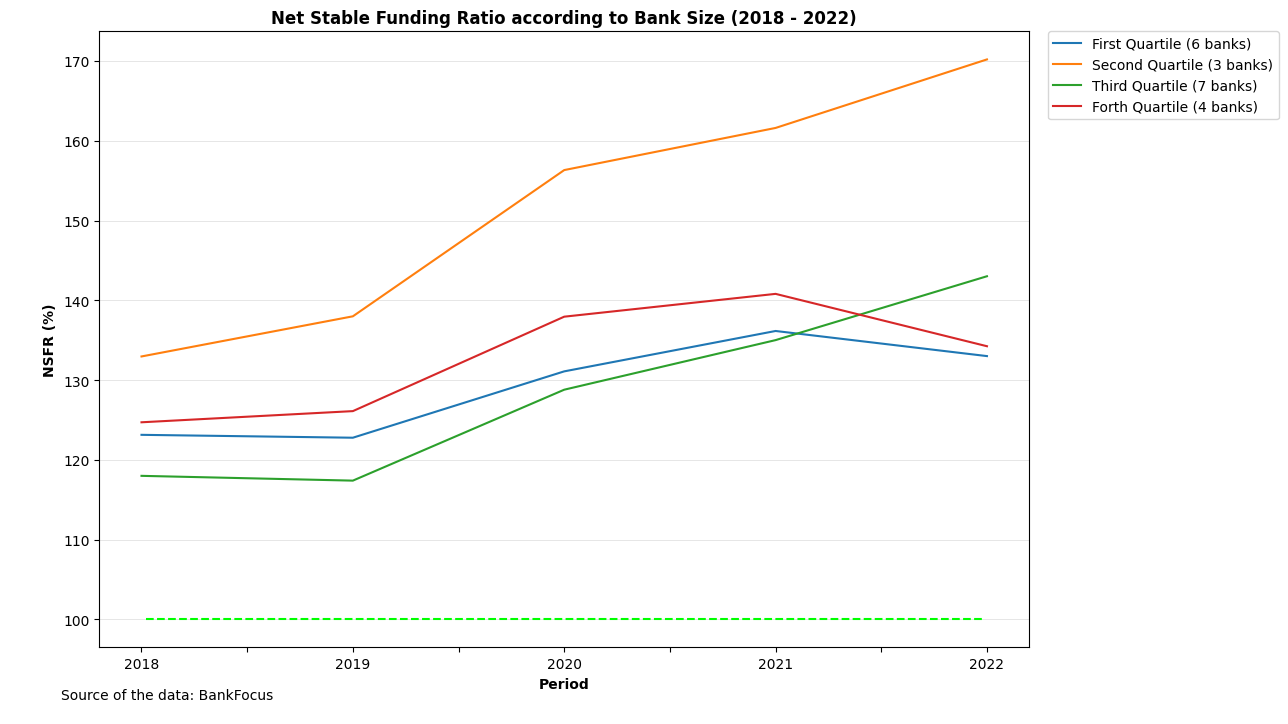

In [ ]:
fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
Quartile_1.mean().plot(ax = ax, label = 'First Quartile (6 banks)')
Quartile_2.mean().plot(ax = ax, label = 'Second Quartile (3 banks)')
Quartile_3.mean().plot(ax = ax, label = 'Third Quartile (7 banks)')
Quartile_4.mean().plot(ax = ax, label = 'Forth Quartile (4 banks)')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
ax.set_title('Net Stable Funding Ratio according to Bank Size (2018 - 2022)', fontweight = 'bold', fontsize = 12)
ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
ax.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
ax.text(-0.09, -0.09, 'Source of the data: BankFocus', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

**We decided to separate the banks into 8 subsets according to their total assets so as to see the behvaior of each quartile in terms of liquidity. In this part we analyse each quartile's behavior in terms of net stable funding ratio.**

In [ ]:
# Creating the Quartiles for years
%matplotlib inline
rcParams['figure.figsize'] = 12,8

#First quartile of elements for the sample according to total assets
Quart1_2018 = nsfr_df[(nsfr_df['TotAss_18']>=30000) & (nsfr_df['TotAss_18']<=50000)]
Quart1_2019 = nsfr_df[(nsfr_df['TotAss_19']>=30000) & (nsfr_df['TotAss_19']<=50000)]
Quart1_2020 = nsfr_df[(nsfr_df['TotAss_20']>=30000) & (nsfr_df['TotAss_20']<=50000)]
Quart1_2021 = nsfr_df[(nsfr_df['TotAss_21']>=30000) & (nsfr_df['TotAss_21']<=50000)]
Quart1_2022 = nsfr_df[(nsfr_df['TotAss_22']>=30000) & (nsfr_df['TotAss_22']<=50000)]

#Second quartile of elements for the sample according to total assets
Quart2_2018 = nsfr_df[(nsfr_df['TotAss_18']>=50000) & (nsfr_df['TotAss_18']<=75000)]
Quart2_2019 = nsfr_df[(nsfr_df['TotAss_19']>=50000) & (nsfr_df['TotAss_19']<=75000)]
Quart2_2020 = nsfr_df[(nsfr_df['TotAss_20']>=50000) & (nsfr_df['TotAss_20']<=75000)]
Quart2_2021 = nsfr_df[(nsfr_df['TotAss_21']>=50000) & (nsfr_df['TotAss_21']<=75000)]
Quart2_2022 = nsfr_df[(nsfr_df['TotAss_22']>=50000) & (nsfr_df['TotAss_22']<=75000)]

#Third quartile of elements for the sample according to total assets
Quart3_2018 = nsfr_df[(nsfr_df['TotAss_18']>=75000) & (nsfr_df['TotAss_18']<=100000)]
Quart3_2019 = nsfr_df[(nsfr_df['TotAss_19']>=75000) & (nsfr_df['TotAss_19']<=100000)]
Quart3_2020 = nsfr_df[(nsfr_df['TotAss_20']>=75000) & (nsfr_df['TotAss_20']<=100000)]
Quart3_2021 = nsfr_df[(nsfr_df['TotAss_21']>=75000) & (nsfr_df['TotAss_21']<=100000)]
Quart3_2022 = nsfr_df[(nsfr_df['TotAss_22']>=75000) & (nsfr_df['TotAss_22']<=100000)]

#Forth quartile of elements for the sample according to total assets
Quart4_2018 = nsfr_df[(nsfr_df['TotAss_18']>=100000) & (nsfr_df['TotAss_18']<=150000)]
Quart4_2019 = nsfr_df[(nsfr_df['TotAss_19']>=100000) & (nsfr_df['TotAss_19']<=150000)]
Quart4_2020 = nsfr_df[(nsfr_df['TotAss_20']>=100000) & (nsfr_df['TotAss_20']<=150000)]
Quart4_2021 = nsfr_df[(nsfr_df['TotAss_21']>=100000) & (nsfr_df['TotAss_21']<=150000)]
Quart4_2022 = nsfr_df[(nsfr_df['TotAss_22']>=100000) & (nsfr_df['TotAss_22']<=150000)]

#Fifth quartile of elements for the sample according to total assets
Quart5_2018 = nsfr_df[(nsfr_df['TotAss_18']>=150000) & (nsfr_df['TotAss_18']<=300000)]
Quart5_2019 = nsfr_df[(nsfr_df['TotAss_19']>=150000) & (nsfr_df['TotAss_19']<=300000)]
Quart5_2020 = nsfr_df[(nsfr_df['TotAss_20']>=150000) & (nsfr_df['TotAss_20']<=300000)]
Quart5_2021 = nsfr_df[(nsfr_df['TotAss_21']>=150000) & (nsfr_df['TotAss_21']<=300000)]
Quart5_2022 = nsfr_df[(nsfr_df['TotAss_22']>=150000) & (nsfr_df['TotAss_22']<=300000)]

#Sixth quartile of elements for the sample according to total assets
Quart6_2018 = nsfr_df[(nsfr_df['TotAss_18']>=300000) & (nsfr_df['TotAss_18']<=500000)]
Quart6_2019 = nsfr_df[(nsfr_df['TotAss_19']>=300000) & (nsfr_df['TotAss_19']<=500000)]
Quart6_2020 = nsfr_df[(nsfr_df['TotAss_20']>=300000) & (nsfr_df['TotAss_20']<=500000)]
Quart6_2021 = nsfr_df[(nsfr_df['TotAss_21']>=300000) & (nsfr_df['TotAss_21']<=500000)]
Quart6_2022 = nsfr_df[(nsfr_df['TotAss_22']>=300000) & (nsfr_df['TotAss_22']<=500000)]

#Seventh quartile of elements for the sample according to total assets
Quart7_2018 = nsfr_df[(nsfr_df['TotAss_18']>=500000) & (nsfr_df['TotAss_18']<=1000000)]
Quart7_2019 = nsfr_df[(nsfr_df['TotAss_19']>=500000) & (nsfr_df['TotAss_19']<=1000000)]
Quart7_2020 = nsfr_df[(nsfr_df['TotAss_20']>=500000) & (nsfr_df['TotAss_20']<=1000000)]
Quart7_2021 = nsfr_df[(nsfr_df['TotAss_21']>=500000) & (nsfr_df['TotAss_21']<=1000000)]
Quart7_2022 = nsfr_df[(nsfr_df['TotAss_22']>=500000) & (nsfr_df['TotAss_22']<=1000000)]

#Eighth quartile of elements for the sample according to total assets
Quart8_2018 = nsfr_df[(nsfr_df['TotAss_18']>1000000)]
Quart8_2019 = nsfr_df[(nsfr_df['TotAss_19']>1000000)]
Quart8_2020 = nsfr_df[(nsfr_df['TotAss_20']>1000000)]
Quart8_2021 = nsfr_df[(nsfr_df['TotAss_21']>1000000)]
Quart8_2022 = nsfr_df[(nsfr_df['TotAss_22']>1000000)]

In [ ]:
#Intersection for the first quartile
merge_1Q_18 = pd.merge(Quart1_2018, Quart1_2019, on = 'Company')
merge_1Q_19 = pd.merge(merge_1Q_18, Quart1_2020, on = 'Company')
merge_1Q_20 = pd.merge(merge_1Q_19, Quart1_2021, on = 'Company')
merge_1Q_21 = pd.merge(merge_1Q_20, Quart1_2022, on = 'Company')

#Intersection for the second quartile
merge_2Q_18 = pd.merge(Quart2_2018, Quart2_2019, on = 'Company')
merge_2Q_19 = pd.merge(merge_2Q_18, Quart2_2020, on = 'Company')
merge_2Q_20 = pd.merge(merge_2Q_19, Quart2_2021, on = 'Company')
merge_2Q_21 = pd.merge(merge_2Q_20, Quart2_2022, on = 'Company')

#Intersection for the third quartile
merge_3Q_18 = pd.merge(Quart3_2018, Quart3_2019, on = 'Company')
merge_3Q_19 = pd.merge(merge_3Q_18, Quart3_2020, on = 'Company')
merge_3Q_20 = pd.merge(merge_3Q_19, Quart3_2021, on = 'Company')
merge_3Q_21 = pd.merge(merge_3Q_20, Quart3_2022, on = 'Company')

#Intersection for the forth quartile
merge_4Q_18 = pd.merge(Quart4_2018, Quart4_2019, on = 'Company')
merge_4Q_19 = pd.merge(merge_4Q_18, Quart4_2020, on = 'Company')
merge_4Q_20 = pd.merge(merge_4Q_19, Quart4_2021, on = 'Company')
merge_4Q_21 = pd.merge(merge_4Q_20, Quart4_2022, on = 'Company')

#Intersection for the fifth quartile
merge_5Q_18 = pd.merge(Quart5_2018, Quart5_2019, on = 'Company')
merge_5Q_19 = pd.merge(merge_5Q_18, Quart5_2020, on = 'Company')
merge_5Q_20 = pd.merge(merge_5Q_19, Quart5_2021, on = 'Company')
merge_5Q_21 = pd.merge(merge_5Q_20, Quart5_2022, on = 'Company')

#Intersection for the sixth quartile
merge_6Q_18 = pd.merge(Quart6_2018, Quart6_2019, on = 'Company')
merge_6Q_19 = pd.merge(merge_6Q_18, Quart6_2020, on = 'Company')
merge_6Q_20 = pd.merge(merge_6Q_19, Quart6_2021, on = 'Company')
merge_6Q_21 = pd.merge(merge_6Q_20, Quart6_2022, on = 'Company')

#Intersection for the seventh quartile
merge_7Q_18 = pd.merge(Quart7_2018, Quart7_2019, on = 'Company')
merge_7Q_19 = pd.merge(merge_7Q_18, Quart7_2020, on = 'Company')
merge_7Q_20 = pd.merge(merge_7Q_19, Quart7_2021, on = 'Company')
merge_7Q_21 = pd.merge(merge_7Q_20, Quart7_2022, on = 'Company')

#Intersection for the forth quartile
merge_8Q_18 = pd.merge(Quart8_2018, Quart8_2019, on = 'Company')
merge_8Q_19 = pd.merge(merge_8Q_18, Quart8_2020, on = 'Company')
merge_8Q_20 = pd.merge(merge_8Q_19, Quart8_2021, on = 'Company')
merge_8Q_21 = pd.merge(merge_8Q_20, Quart8_2022, on = 'Company')

<ipython-input-23-8c8054091422>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'NSFR_22_x', 'TotAss_19_x', 'NSFR_19_x', 'NSFR_18_x', 'Country_x', 'TotAss_22_x', 'TotAss_21_x', 'NSFR_20_x', 'NSFR_21_x', 'TotAss_18_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_1Q_20 = pd.merge(merge_1Q_19, Quart1_2021, on = 'Company')
<ipython-input-23-8c8054091422>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'NSFR_22_x', 'TotAss_19_x', 'NSFR_19_x', 'NSFR_18_x', 'Country_x', 'TotAss_22_x', 'TotAss_21_x', 'NSFR_20_x', 'NSFR_21_x', 'TotAss_18_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_2Q_20 = pd.merge(merge_2Q_19, Quart2_2021, on = 'Company')
<ipython-input-23-8c8054091422>:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'NSFR_22_x', 'TotAss_19_x', 'NSFR_19_x', 'NSFR_18_x', 'Country_x', 'TotAss_22_x', 'TotAss

In [ ]:
Quartile_1 = merge_1Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_2 = merge_2Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_3 = merge_3Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_4 = merge_4Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_5 = merge_5Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_6 = merge_6Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_7 = merge_7Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
Quartile_8 = merge_8Q_21[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]

Quartile_1 = Quartile_1.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_2 = Quartile_2.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_3 = Quartile_3.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_4 = Quartile_4.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_5 = Quartile_5.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_6 = Quartile_6.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_7 = Quartile_7.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
Quartile_8 = Quartile_8.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})



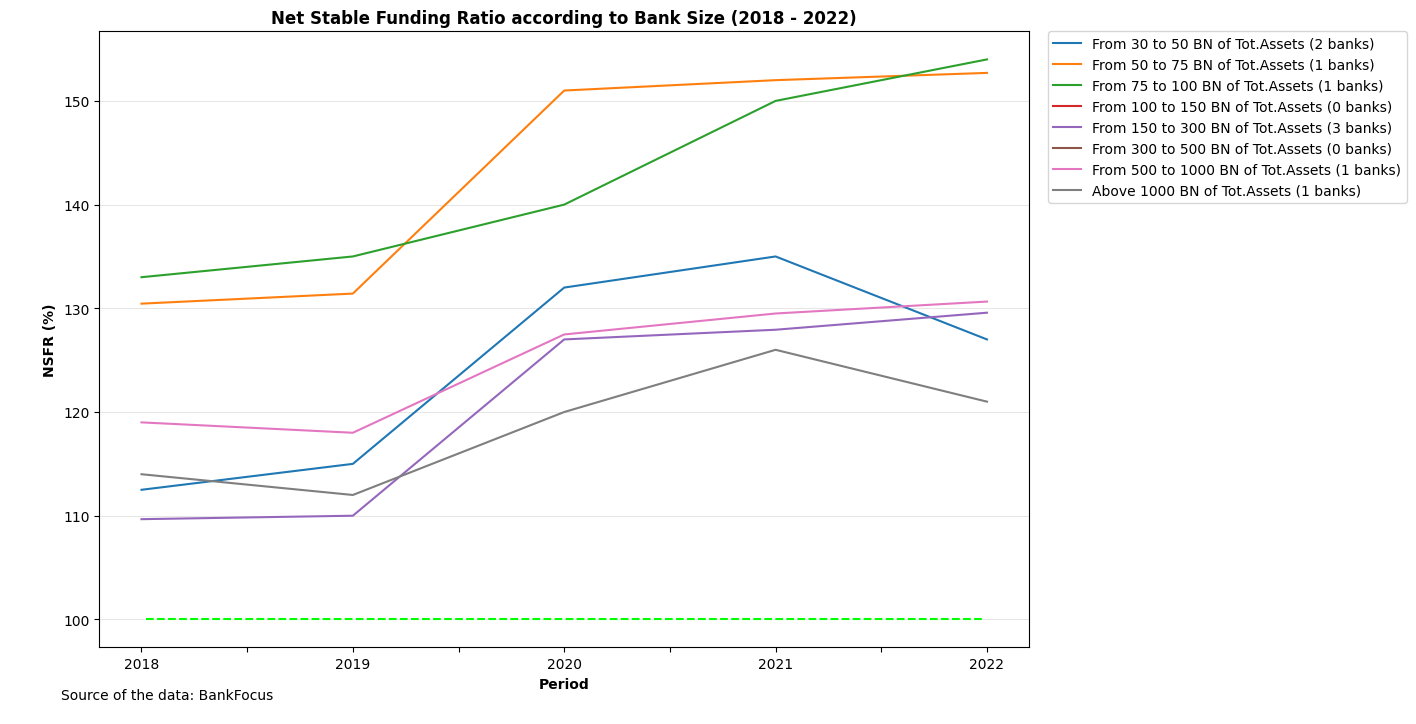

In [ ]:
fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
Quartile_1.mean().plot(ax = ax, label = 'From 30 to 50 BN of Tot.Assets (2 banks)')
Quartile_2.mean().plot(ax = ax, label = 'From 50 to 75 BN of Tot.Assets (1 banks)')
Quartile_3.mean().plot(ax = ax, label = 'From 75 to 100 BN of Tot.Assets (1 banks)')
Quartile_4.mean().plot(ax = ax, label = 'From 100 to 150 BN of Tot.Assets (0 banks)')
Quartile_5.mean().plot(ax = ax, label = 'From 150 to 300 BN of Tot.Assets (3 banks)')
Quartile_6.mean().plot(ax = ax, label = 'From 300 to 500 BN of Tot.Assets (0 banks)')
Quartile_7.mean().plot(ax = ax, label = 'From 500 to 1000 BN of Tot.Assets (1 banks)')
Quartile_8.mean().plot(ax = ax, label = 'Above 1000 BN of Tot.Assets (1 banks)')

plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
ax.set_title('Net Stable Funding Ratio according to Bank Size (2018 - 2022)', fontweight = 'bold', fontsize = 12)
ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
ax.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
ax.text(-0.09, -0.09, 'Source of the data: BankFocus', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

Text(0.5, 1.0, 'Above 1000 bn Total Assets')

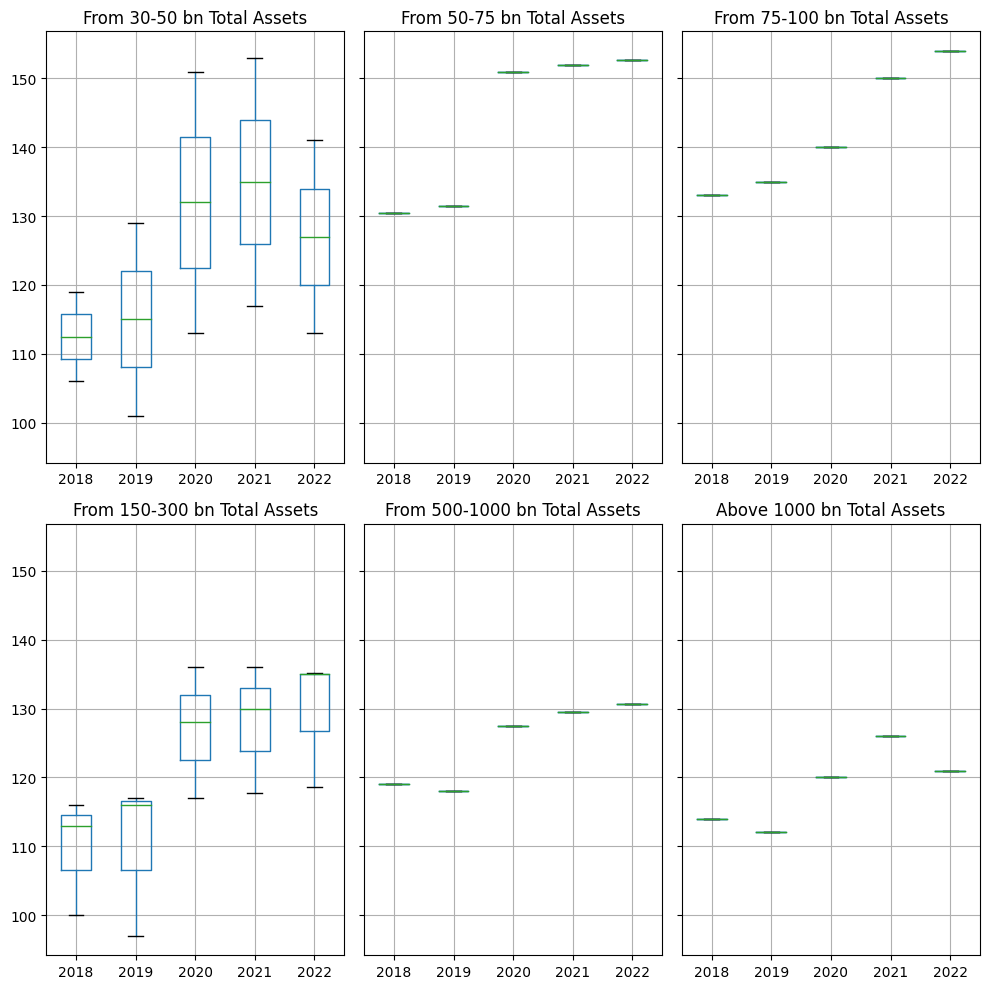

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=10,10

plt.rcParams["figure.autolayout"] = True

fix,((ax1, ax2, ax3),(ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3, sharey=True) # Create the figure and axes object

Quartile_1.boxplot(ax = ax1, fontsize=10)
ax1.set_title('From 30-50 bn Total Assets')

Quartile_2.boxplot(ax = ax2, fontsize=10)
ax2.set_title('From 50-75 bn Total Assets')

Quartile_3.boxplot(ax = ax3, fontsize=10)
ax3.set_title('From 75-100 bn Total Assets')

Quartile_5.boxplot(ax = ax4, fontsize=10)
ax4.set_title('From 150-300 bn Total Assets')

Quartile_7.boxplot(ax = ax5, fontsize=10)
ax5.set_title('From 500-1000 bn Total Assets')

Quartile_8.boxplot(ax = ax6, fontsize=10)
ax6.set_title('Above 1000 bn Total Assets')


## *1.2 YEAR TO YEAR ANALYSIS*

The first step towards a year to year analysis is isolating each year and examining the NSFR ratio. To isolate the year we created a variable containg only the NSFR ratio for the certain year from our sample of 109 banks.

###**2018**

In [ ]:
nsfr_18 = data_object[['Company', 'Country', 'NSFR_18']]
nsfr_df_18_na = nsfr_18.dropna(axis = 'rows')
nsfr_df_18_na.shape

(32, 3)

What we see is that in the new dataframe we have 32 banks for the year 2018 with NSFR ratio not missing.

In [ ]:
def line_plot_boxplot(nsfr_df_18_na, nsfr_18, year):
  rcParams['figure.figsize'] = 15,5

  fix, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True) # Create the figure and axes object

  sns.scatterplot(ax = ax1, data = nsfr_18, x = range(1,110), y = 'NSFR_'  + str(year)[2:])
  ax1.set_title('NSFR in ' f'{year} ({nsfr_df_18_na.shape[0]} banks)', fontweight = 'bold', fontsize = 12)
  # Set x-axis label
  ax1.set_xlabel("Banks' Identifier", fontweight = 'bold', fontsize = 10)
  # Set y-axis label
  ax1.set_ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
  ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
  ax1.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)
  ax1.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = ax1.transAxes)

  nsfr_df_18_na.boxplot(ax = ax2, fontsize = 10, color = '#00E600')
  ax2.set_title('Distribution of NSFR in ' f'{year} ({nsfr_df_18_na.shape[0]} banks)', fontweight = 'bold', fontsize = 12)
  #ax2.set_xlabel(f'{year}', fontweight = 'bold', fontsize = 10)
  ax2.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

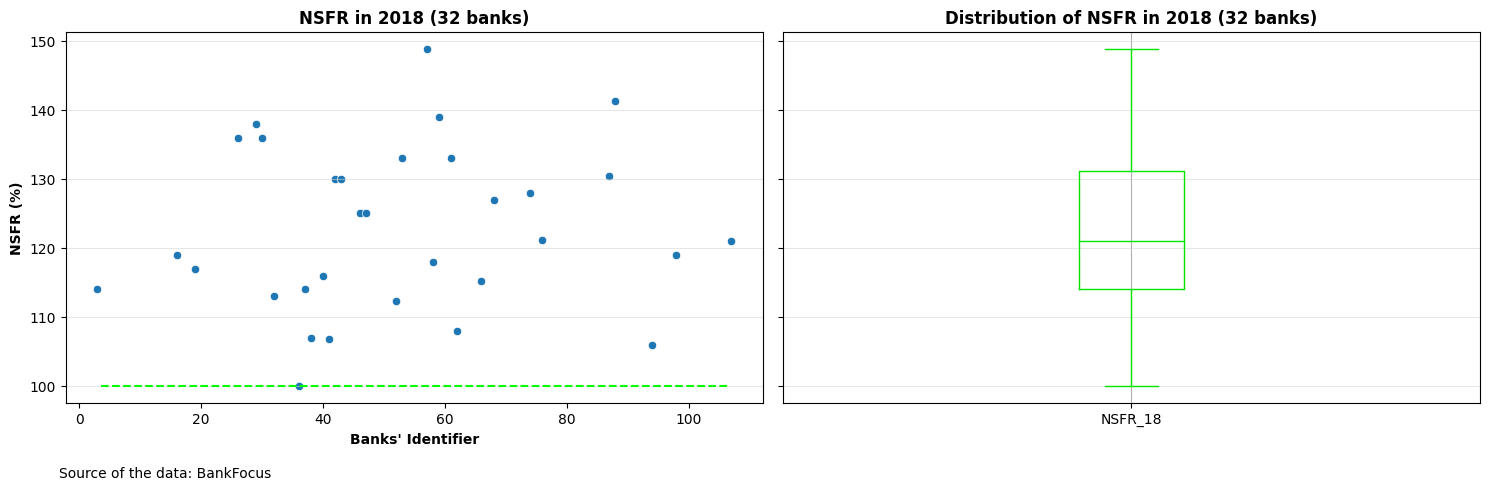

In [ ]:
line_plot_boxplot(nsfr_df_18_na, nsfr_18, 2018)

As we can see from the boxplot we don't have the outliers.

In [ ]:
nsfr_df_18_na_country = nsfr_df_18_na['Country'].value_counts()
nsfr_df_18_na_country

Spain          6
Italy          5
Belgium        4
Ireland        4
Portugal       4
Netherlands    2
Austria        2
France         2
Germany        2
Greece         1
Name: Country, dtype: int64

Text(0.5, 0, 'Countries')

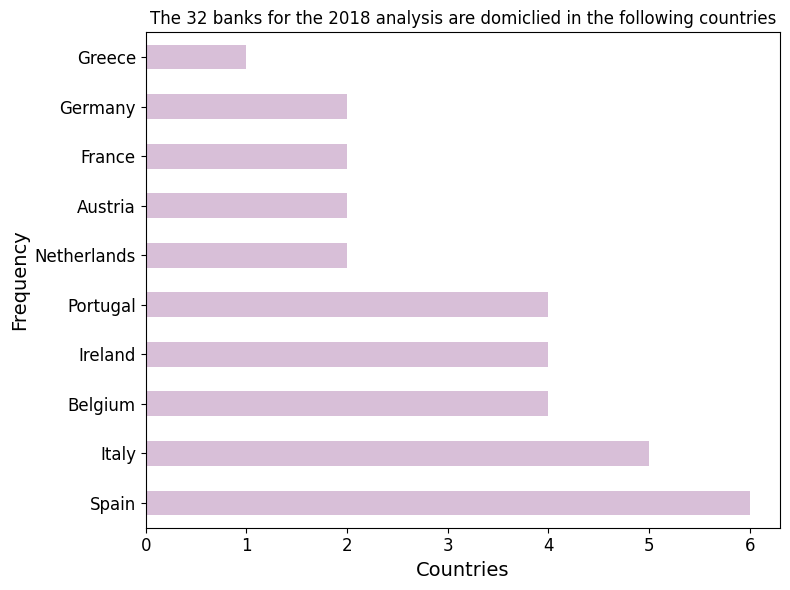

In [ ]:
rcParams['figure.figsize'] = 8,6

bottom,top = plt.ylim(0,19)
nsfr_df_18_na_country.plot(kind = 'barh', x = 'Country', color = 'thistle', fontsize = 12)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'The {nsfr_df_18_na.shape[0]} banks for the 2018 analysis are domiclied in the following countries')
plt.xlabel('Countries', fontsize=14)

###**2019**

In [ ]:
nsfr_19 = data_object[['Company', 'Country', 'NSFR_19']]
nsfr_df_19_na = nsfr_19.dropna(axis = 'rows')
nsfr_df_19_na.shape

(40, 3)

What we see is that in the new dataframe we have 40 banks for the year 2019 with NSFR ratio not missing.

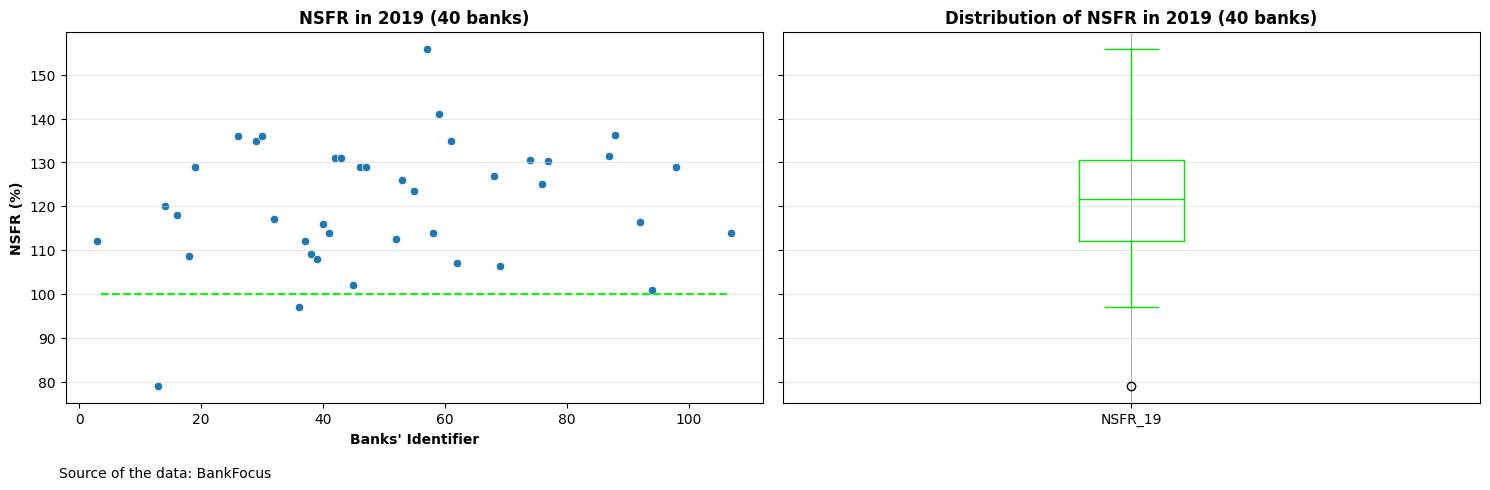

In [ ]:
line_plot_boxplot(nsfr_df_19_na, nsfr_19, 2019)

Opposite to what we were seeing till now, we see that there has been banks with less than 100% NSFR ratio in 2019.

In [ ]:
nsfr_df_19_na_less = nsfr_df_19_na[(nsfr_df_19_na['NSFR_19']<100)]
nsfr_df_19_na_less.head()

Company  Country  NSFR_19
12   CREDIT AGRICOLE CORPORATE AND INVESTMENT BANK SA   France     79.0
35  LANDESBANK HESSEN-THUERINGEN GIROZENTRALE - HE...  Germany     97.0

The banks that do not satisfy the minimum value for the regulatory ratio NSFR (%) are CREDIT AGRICOLE CORPORATE AND INVESTMENT BANK SA and LANDESBANK HESSEN-THUERINGEN GIROZENTRALE.

In [ ]:
nsfr_df_19_na_country = nsfr_df_19_na['Country'].value_counts()
nsfr_df_19_na_country

Spain          9
Belgium        5
Italy          5
France         4
Ireland        4
Portugal       4
Netherlands    2
Finland        2
Austria        2
Germany        2
Greece         1
Name: Country, dtype: int64

Text(0.5, 0, 'Countries')

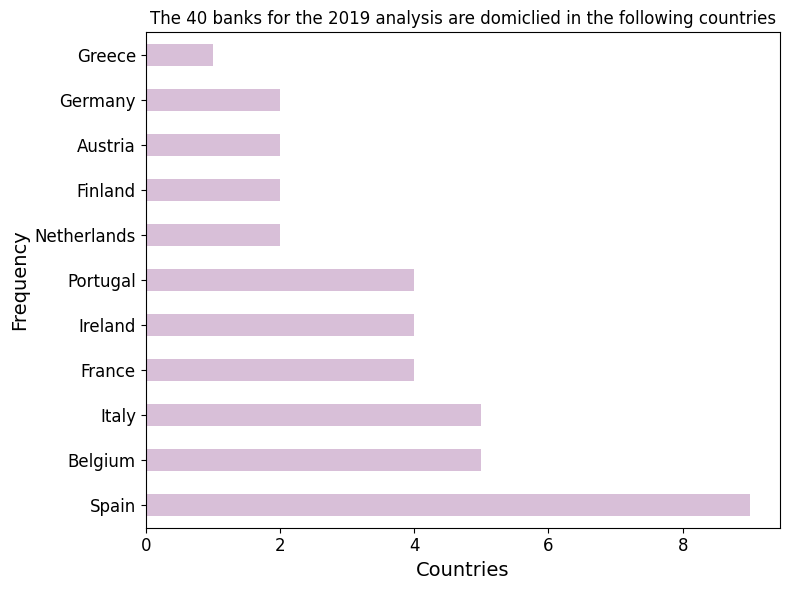

In [ ]:
rcParams['figure.figsize'] = 8,6

bottom,top = plt.ylim(0,19)
nsfr_df_19_na_country.plot(kind='barh', x='Country', color='thistle', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'The {nsfr_df_19_na.shape[0]} banks for the 2019 analysis are domiclied in the following countries')
plt.xlabel('Countries', fontsize=14)

Considering the presence of outliers, we decided to remove them and get a second view of the situation of the NSFR ratio for the year 2019 in our sample.

In [ ]:
for x in ['NSFR_19']:
    q75, q25 = np.percentile(nsfr_df_19_na.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    nsfr_df_19_na.loc[nsfr_df_19_na[x] < min,x] = np.nan
    nsfr_df_19_na.loc[nsfr_df_19_na[x] > max,x] = np.nan

    nsfr_df_19_na_outliers = nsfr_df_19_na.dropna(axis = 'rows')

nsfr_df_19_na_outliers.shape

(39, 3)

We see that without outliers we have 39 banks

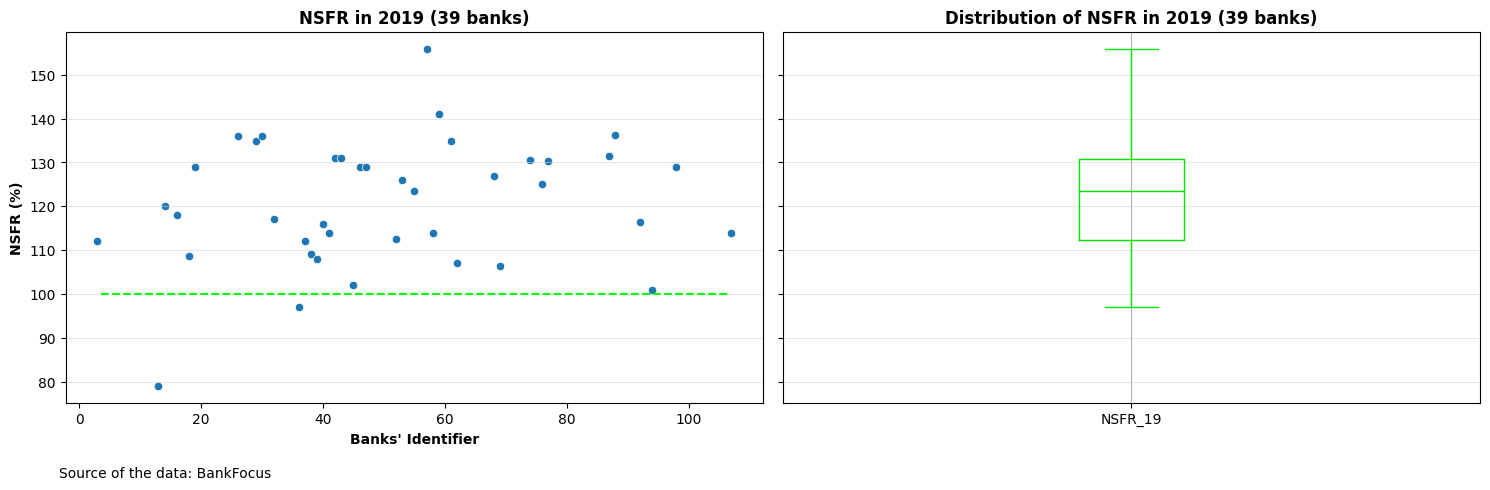

In [ ]:
line_plot_boxplot(nsfr_df_19_na_outliers, nsfr_19, 2019)

### **2020**

In [ ]:
nsfr_20 = data_object[['Company', 'Country', 'NSFR_20']]
nsfr_df_20_na = nsfr_20.dropna(axis = 'rows')
nsfr_df_20_na.shape

(45, 3)

We have 45 banks for the year 2020 with NSFR ratio not missing.

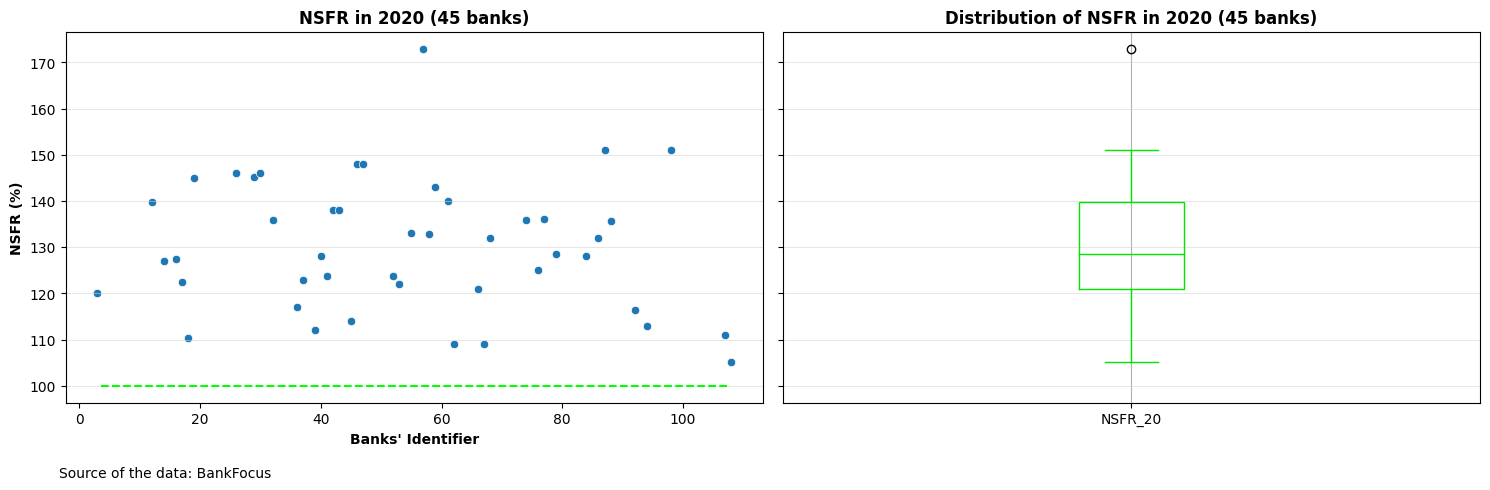

In [ ]:
line_plot_boxplot(nsfr_df_20_na, nsfr_20, 2020)

In 2020 all banks satisfy the minimum value for NSFR (%)

In [ ]:
nsfr_df_20_na_country = nsfr_df_20_na['Country'].value_counts()
nsfr_df_20_na_country

Spain          10
France          5
Belgium         5
Italy           5
Ireland         4
Portugal        4
Germany         3
Austria         3
Netherlands     2
Finland         2
Greece          2
Name: Country, dtype: int64

Text(0.5, 0, 'Countries')

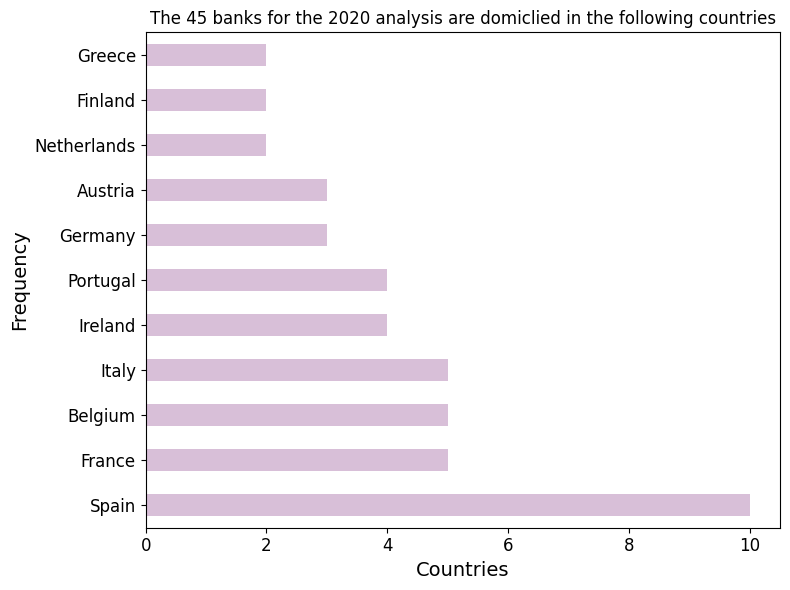

In [ ]:
rcParams['figure.figsize'] = 8,6

bottom,top = plt.ylim(0,19)
nsfr_df_20_na_country.plot(kind='barh', x='Country', color='thistle', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'The {nsfr_df_20_na.shape[0]} banks for the 2020 analysis are domiclied in the following countries')
plt.xlabel('Countries', fontsize=14)

Considering the presence of outliers, we decided to remove them.

In [ ]:
for x in ['NSFR_20']:
    q75, q25 = np.percentile(nsfr_df_20_na.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    nsfr_df_20_na.loc[nsfr_df_20_na[x] < min,x] = np.nan
    nsfr_df_20_na.loc[nsfr_df_20_na[x] > max,x] = np.nan

    nsfr_df_20_na_outliers = nsfr_df_20_na.dropna(axis = 'rows')

nsfr_df_20_na_outliers.shape

(44, 3)

We see that without outliers we have 44 banks.

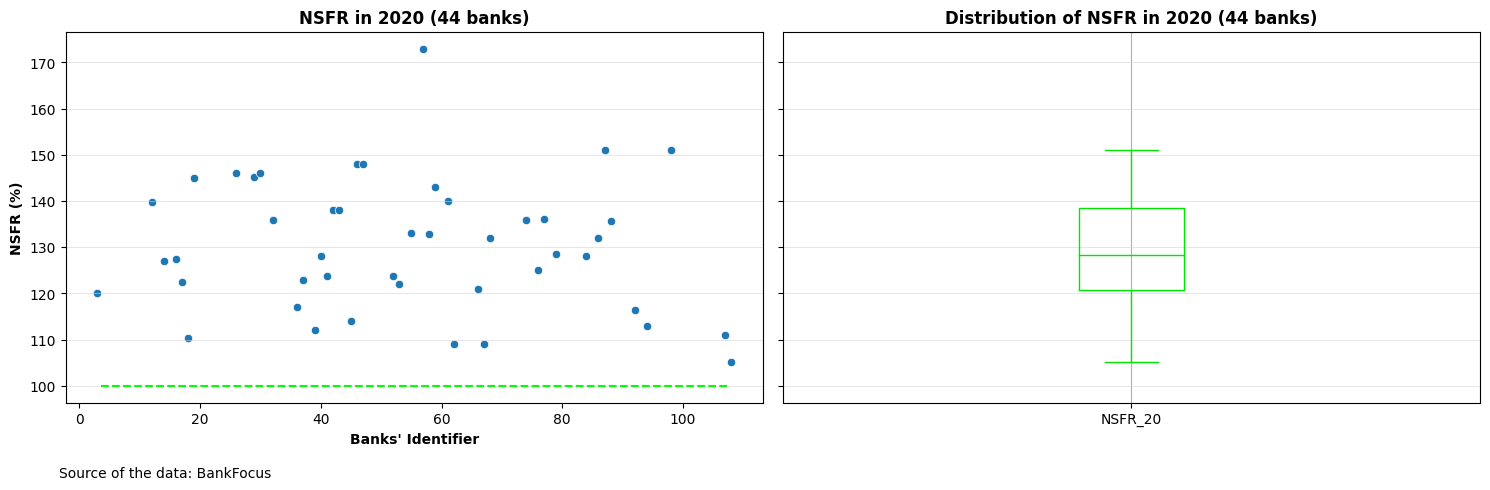

In [ ]:
line_plot_boxplot(nsfr_df_20_na_outliers, nsfr_20, 2020)

### **2021**

In [ ]:
nsfr_21 = data_object[['Company', 'Country', 'NSFR_21']]
nsfr_df_21_na = nsfr_21.dropna(axis = 'rows')
nsfr_df_21_na.shape

(81, 3)

We have 81 banks for the year 2021 with NSFR ratio not missing.

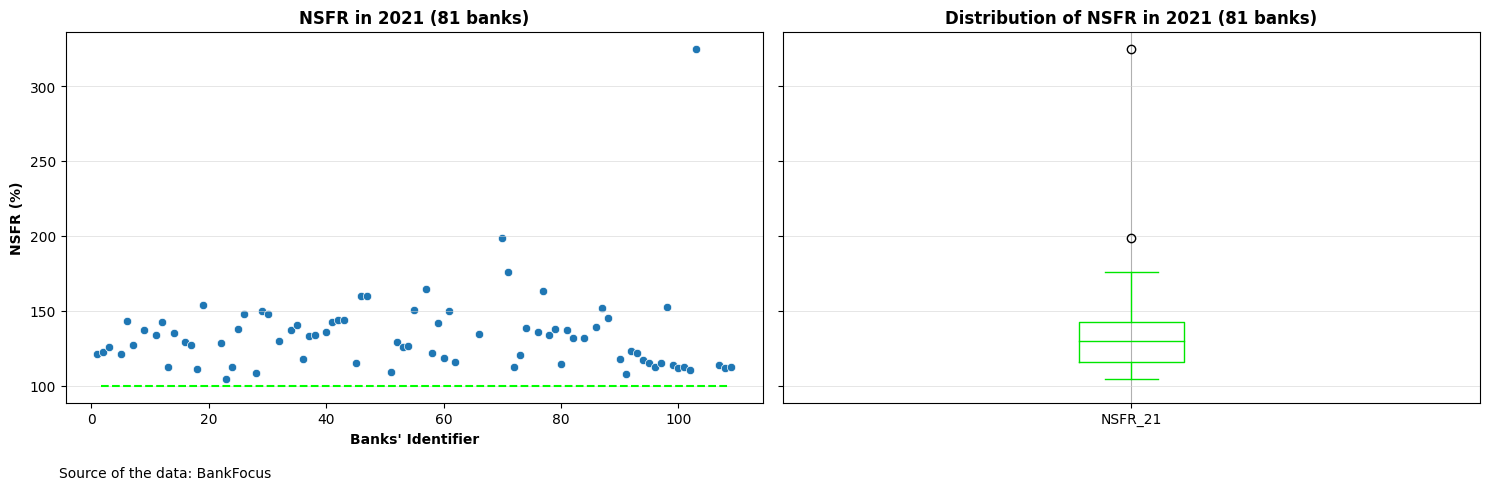

In [ ]:
line_plot_boxplot(nsfr_df_21_na, nsfr_21, 2021)

In 2021 all banks satisfy the minimum value for NSFR (%)

In [ ]:
nsfr_df_21_na_country = nsfr_df_21_na['Country'].value_counts()
nsfr_df_21_na_country

France         23
Germany        12
Italy          11
Spain          10
Netherlands     5
Belgium         5
Ireland         4
Portugal        4
Austria         3
Finland         2
Greece          1
Luxembourg      1
Name: Country, dtype: int64

Text(0.5, 0, 'Countries')

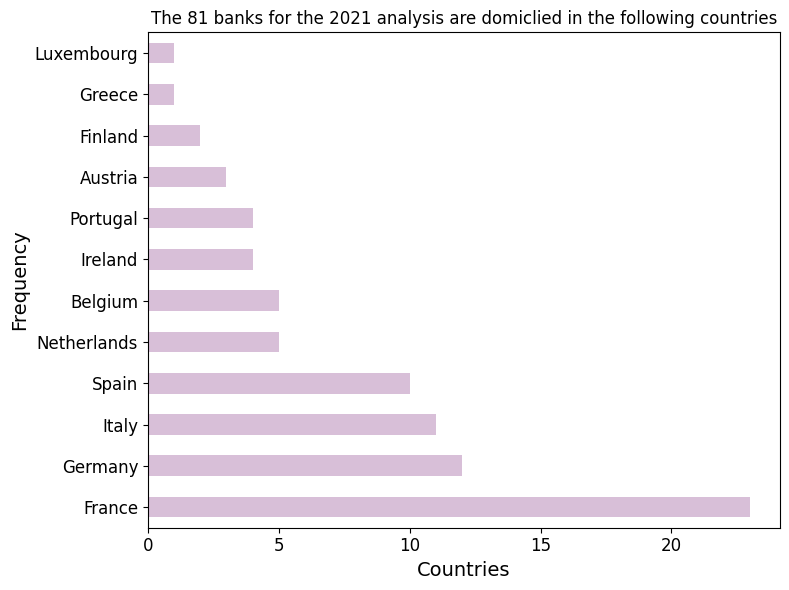

In [ ]:
rcParams['figure.figsize'] = 8,6

bottom,top = plt.ylim(0,19)
nsfr_df_21_na_country.plot(kind='barh', x='Country', color='thistle', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'The {nsfr_df_21_na.shape[0]} banks for the 2021 analysis are domiclied in the following countries')
plt.xlabel('Countries', fontsize=14)

Considering the presence of outliers, we decided to remove them and get a second view of the situation of the NSFR ratio for the year 2021 in our sample.

In [ ]:
for x in ['NSFR_21']:
    q75, q25 = np.percentile(nsfr_df_21_na.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    nsfr_df_21_na.loc[nsfr_df_21_na[x] < min,x] = np.nan
    nsfr_df_21_na.loc[nsfr_df_21_na[x] > max,x] = np.nan

    nsfr_df_21_na_outliers = nsfr_df_21_na.dropna(axis = 'rows')

nsfr_df_21_na_outliers.shape

(79, 3)

We see that without outliers we have 79 banks.

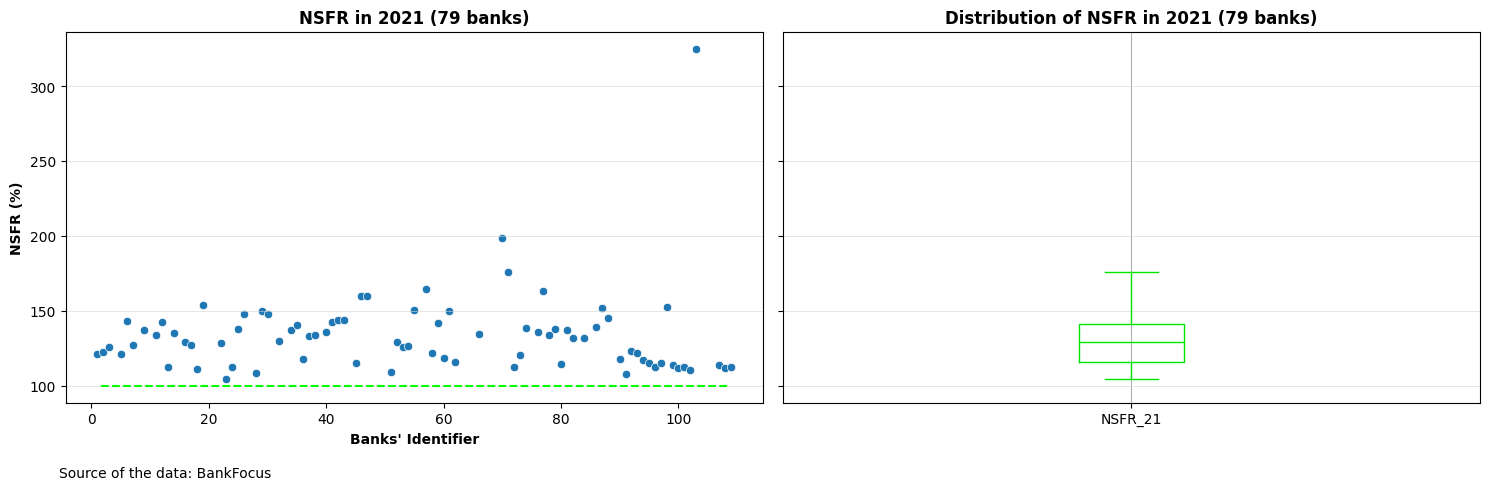

In [ ]:
line_plot_boxplot(nsfr_df_21_na_outliers, nsfr_21, 2021)

### **2022**

In [ ]:
nsfr_22 = data_object[['Company', 'Country', 'NSFR_22']]
nsfr_df_22_na = nsfr_22.dropna(axis = 'rows')
nsfr_df_22_na.shape

(82, 3)

What we see is that in the new dataframe we have 82 banks for the year 2022 with NSFR ratio not missing.

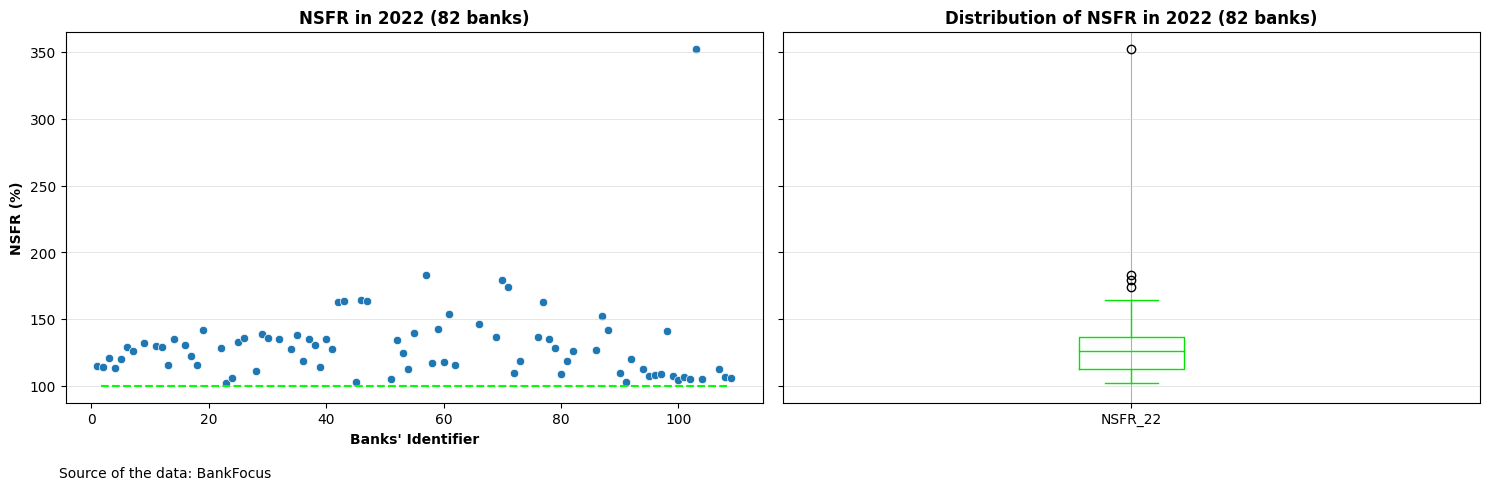

In [ ]:
line_plot_boxplot(nsfr_df_22_na, nsfr_22, 2022)

In [ ]:
nsfr_df_22_na_country = nsfr_df_22_na['Country'].value_counts()
nsfr_df_22_na_country

France         26
Germany        11
Italy          10
Spain           9
Netherlands     5
Belgium         5
Ireland         4
Portugal        4
Austria         3
Finland         2
Greece          2
Luxembourg      1
Name: Country, dtype: int64

Text(0.5, 0, 'Countries')

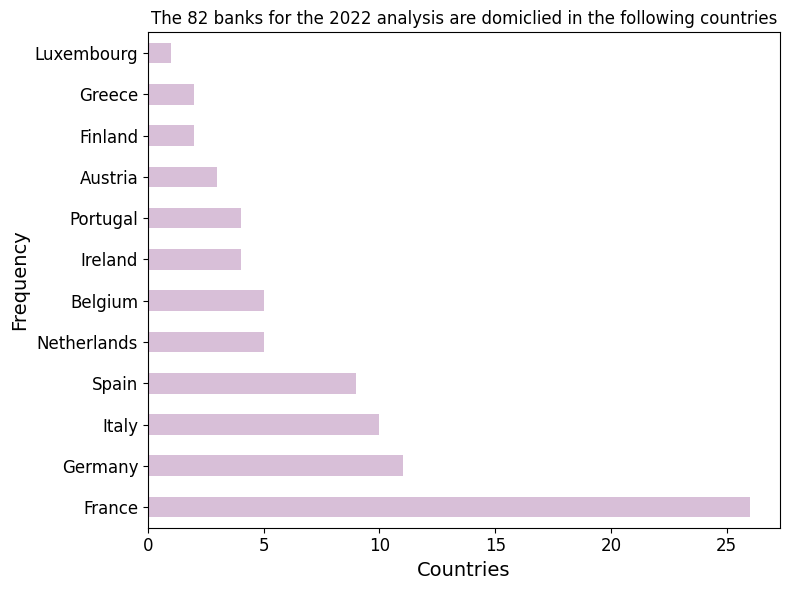

In [ ]:
rcParams['figure.figsize'] = 8,6

bottom,top = plt.ylim(0,19)
nsfr_df_22_na_country.plot(kind='barh', x='Country', color='thistle', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'The {nsfr_df_22_na.shape[0]} banks for the 2022 analysis are domiclied in the following countries')
plt.xlabel('Countries', fontsize=14)

Considering the presence of outliers, we decided to remove them and get a second view of the situation of the NSFR ratio for the year 2022 in our sample.

In [ ]:
for x in ['NSFR_22']:
    q75, q25 = np.percentile(nsfr_df_22_na.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    nsfr_df_22_na.loc[nsfr_df_22_na[x] < min,x] = np.nan
    nsfr_df_22_na.loc[nsfr_df_22_na[x] > max,x] = np.nan

    nsfr_df_22_na_outliers = nsfr_df_22_na.dropna(axis = 'rows')

nsfr_df_22_na_outliers.shape

(78, 3)

We see that without outliers we have 78 banks.

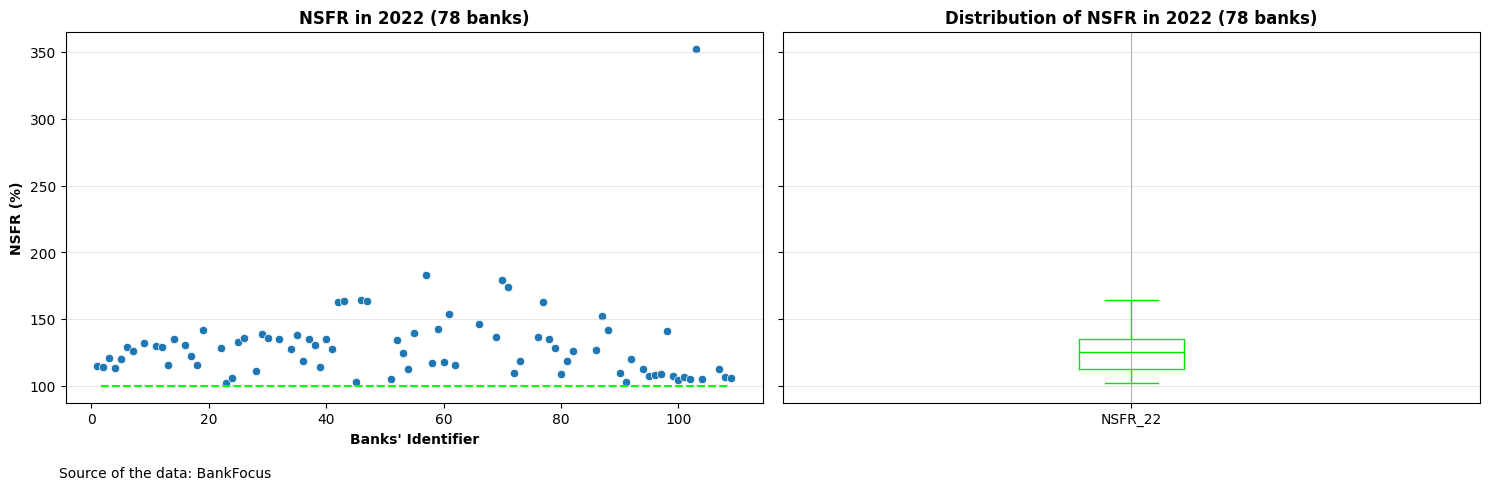

In [ ]:
line_plot_boxplot(nsfr_df_22_na_outliers, nsfr_22, 2022)

## *1.3. COUNTRY*

Let's consider the average of Net Stable Funding Ratio across the **countries** where the banks within our dataset are domicled.

The idea is to consider the banks from the samples as rapresentative for the country within the sample. In the last part of the analysis we will do a general analysis of the Euro Area with data that has been taken from the SDW of the ECB which could be considered as the representative data for the countries in general.

In [ ]:
# create the dataset with NSFR by country
nsfr_by_country = nsfr_only_df.groupby(by = nsfr_df['Country']).mean()
nsfr_by_country = nsfr_by_country.iloc[:, ::1]
nsfr_by_country = nsfr_by_country.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
nsfr_by_country

2018     2019      2020       2021       2022
Country                                                       
Austria      126.0000  123.400  134.1000  141.86500  137.05000
Belgium      132.3250  131.065  138.8975  144.29000  137.29250
France       115.5000  115.500  134.4200  126.00000  126.00000
Germany      110.5000  105.500  114.0000  115.90100  115.62845
Ireland      127.5000  130.000  143.0000  151.90000  163.50250
Italy        112.0500  114.650  120.3700  131.03415  128.41480
Netherlands  126.0000  122.000  124.7400  127.75000  127.82500
Portugal     126.7250  130.250  144.2500  146.25000  147.75000
Spain        125.1125  128.355  139.7500  143.50000  139.67500

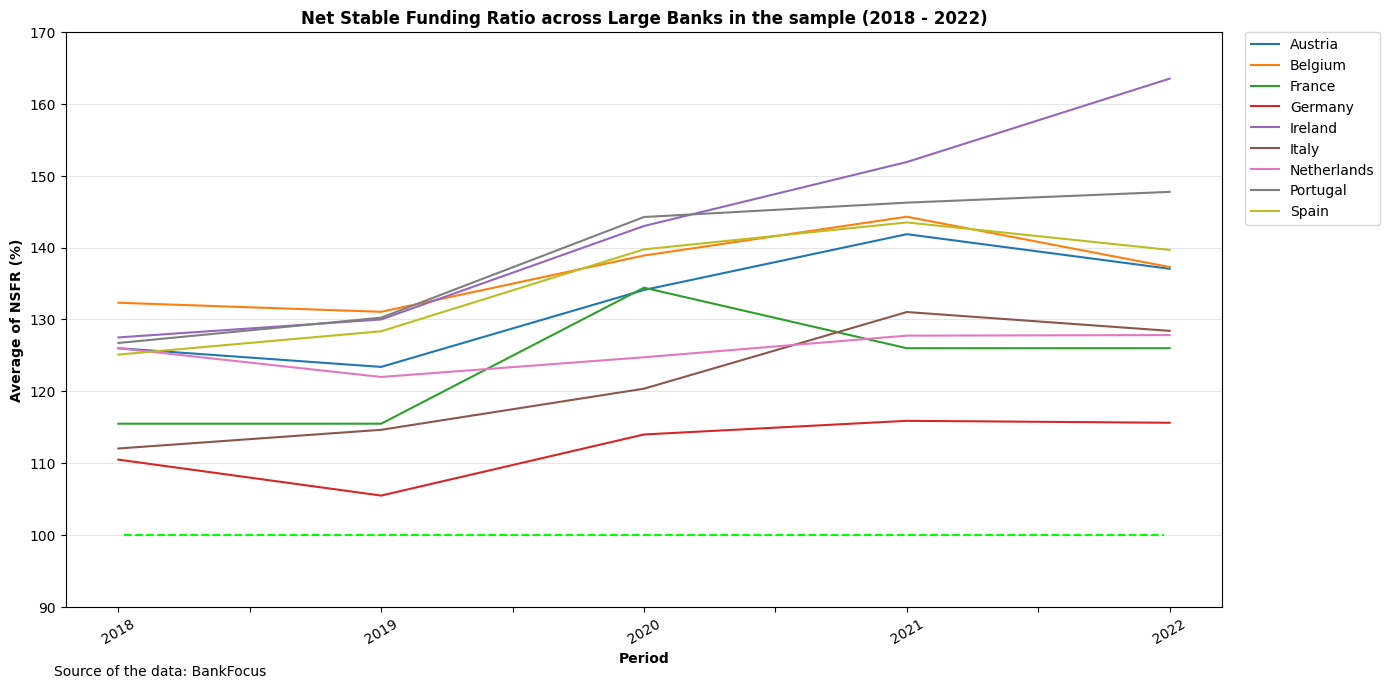

In [ ]:
# COUNTRY
pl = nsfr_by_country.T.plot(rot = 30, figsize = (14, 7))
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Net Stable Funding Ratio across Large Banks in the sample (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of NSFR (%)', fontweight = 'bold', fontsize = 10)
plt.ylim(90, 170)
pl.text(-0.01, -0.12, 'Source of the data: BankFocus', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

Inspecting the graph by considering only the *9* countries in which banks show the available data for the entire period, we can infer that all the *28* observations of the sample satisfy the requirement **NSFR > 100%**.

With the objective of evaluating the situaution from a micro point of view, we separate each country into a graph:

<ipython-input-59-f7314087fadc>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'NSFR: Country analysis of the sample')

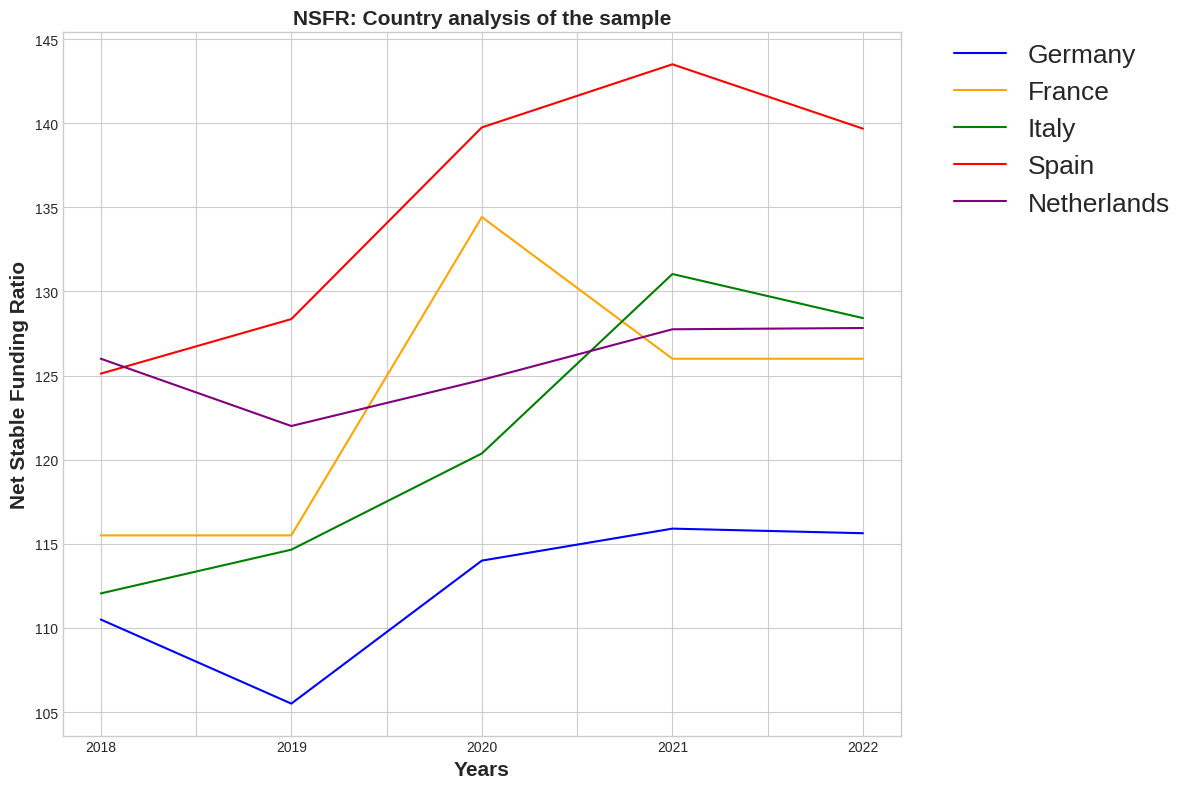

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8


pl_2=nsfr_by_country[nsfr_by_country.index=='Germany']
pl_3=nsfr_by_country[nsfr_by_country.index=='France']
pl_4=nsfr_by_country[nsfr_by_country.index=='Italy']
pl_5=nsfr_by_country[nsfr_by_country.index=='Spain']
pl_6=nsfr_by_country[nsfr_by_country.index=='Netherlands']

plt.style.use('seaborn-whitegrid')

fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl_2.mean().plot(ax = ax, label='Germany', color=['blue'])
pl_3.mean().plot(ax = ax, label='France', color=['orange'])
pl_4.mean().plot(ax = ax, label='Italy', color=['green'])
pl_5.mean().plot(ax = ax, label='Spain', color=['red'])
pl_6.mean().plot(ax = ax, label='Netherlands', color=['purple'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=19)
ax.set_xlabel('Years', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('Net Stable Funding Ratio' , fontweight = 'bold', fontsize = 15)
ax.set_title('NSFR: Country analysis of the sample', fontweight = 'bold', fontsize = 15)

In [ ]:
nsfr_by_country.value_counts('Country')

Country
Austria        1
Belgium        1
France         1
Germany        1
Ireland        1
Italy          1
Netherlands    1
Portugal       1
Spain          1
dtype: int64

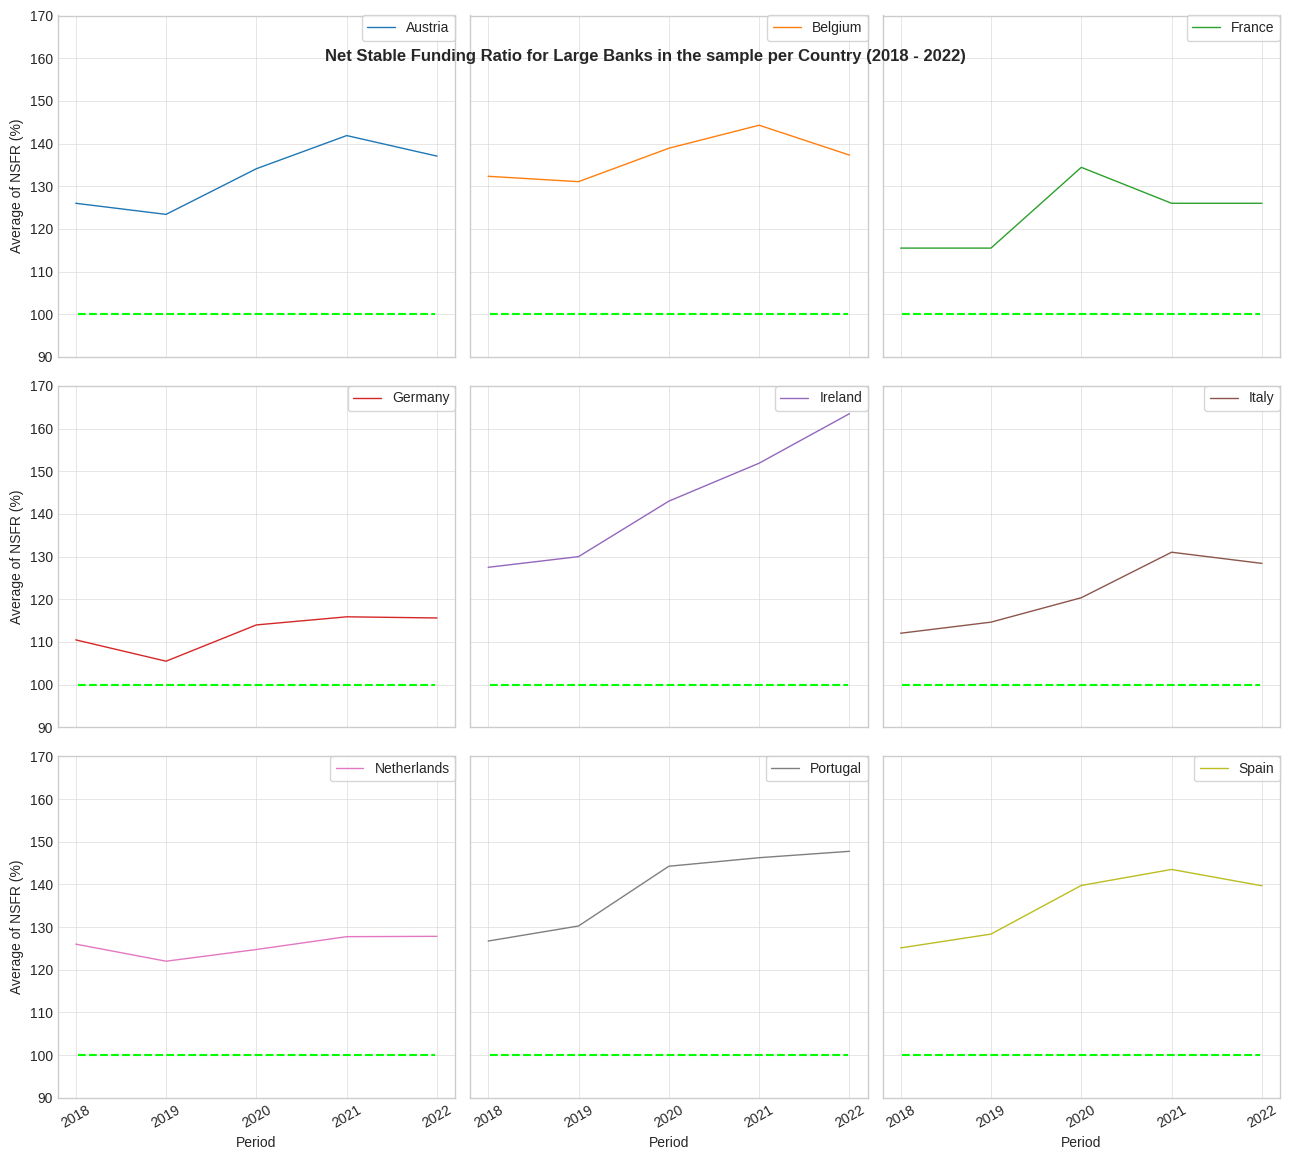

In [ ]:
# EACH COUNTRY
nsfr_by_country.T.plot(subplots = True, layout = (3, 3), figsize = (13, 12), sharey = True,
                    rot = 30,  ylabel = 'Average of NSFR (%)', xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle('Net Stable Funding Ratio for Large Banks in the sample per Country (2018 - 2022)', fontsize = 12, fontweight = 'bold', y = 0.93)

for ax in plt.gcf().axes:
    ax.legend(loc = 'best', frameon = True, borderaxespad = 0)
    ax.grid(color = 'lightgrey', linewidth = 0.4)
    ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
    plt.ylim(90, 170)

## *1.4. SOMETHING WITH OUTLIERS*

In [ ]:
list_nsfr = ['NSFR_18', 'NSFR_19','NSFR_20', 'NSFR_21', 'NSFR_22']
for i in list_nsfr:
  z = np.abs(stats.zscore(nsfr_df[i]))
  missing = z[z > 3]
  missing = missing.reset_index()
  print(i + ' outliers: ')
  for j in missing.loc[:, 'index']:
    print(nsfr_df.loc[j, ['Company', 'Country']])
  print('\n')

NSFR_18 outliers: 


NSFR_19 outliers: 


NSFR_20 outliers: 


NSFR_21 outliers: 


NSFR_22 outliers: 




In [ ]:
def outliers_nsfr(year):
  q1, q3 = np.percentile(nsfr['NSFR_' + year].dropna(axis=0, inplace=False), [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  #create conditions to isolate the outliers
  outlier_nsfr_year = nsfr[(nsfr['NSFR_' + year] >= upper_bound) | (nsfr['NSFR_' + year] <= lower_bound)]
  return outlier_nsfr_year

In [ ]:
def prepare_for_plot_nsfr(outlier_nsfr_year):
  nsfr = outlier_nsfr_year[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22', 'Company']]
  nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019',
                                  'NSFR_20': '2020', 'NSFR_21': '2021',
                                  'NSFR_22': '2022'}, inplace=True)
  nsfr = nsfr.T
  nsfr.columns = outlier_nsfr_year['Company']
  nsfr.drop(['Company'], axis=0, inplace=True)
  return nsfr

In [ ]:
outlier_nsfr_2019 = outliers_nsfr('19')
outlier_nsfr_2019

Company Country  NSFR_18  \
12  CREDIT AGRICOLE CORPORATE AND INVESTMENT BANK SA  France      NaN   

    NSFR_19  NSFR_20  NSFR_21  NSFR_22  TotAss_18  TotAss_19  TotAss_20  \
12     79.0      NaN   112.87    115.5   511702.0   552743.0   593890.0   

    TotAss_21  TotAss_22  
12   599721.0   728202.0

<ipython-input-64-35855588d0ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019',


Text(0, 0.5, 'NSFR (%)')

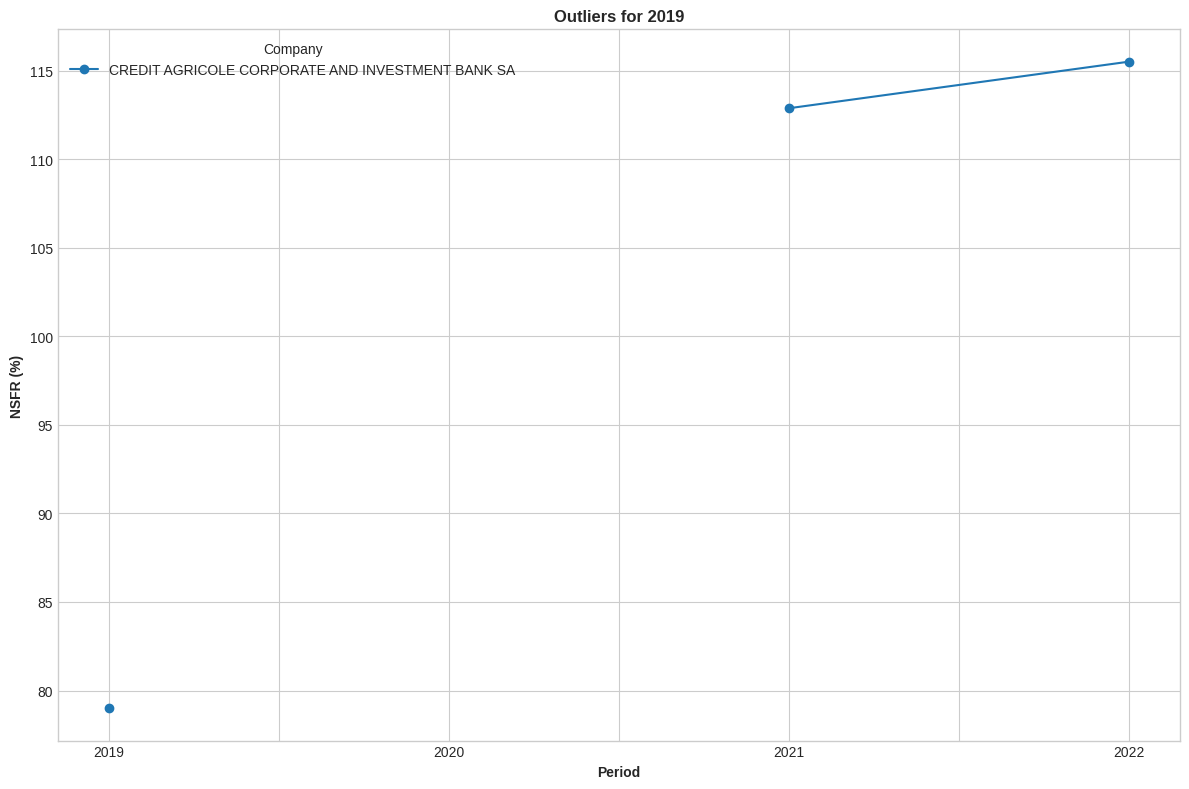

In [ ]:
nsfr_2019 = prepare_for_plot_nsfr(outlier_nsfr_2019)
nsfr_2019.plot(marker='o')
plt.title('Outliers for 2019', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)

In [ ]:
outlier_nsfr_2020 = outliers_nsfr('20')
outlier_nsfr_2020

Company   Country  NSFR_18  NSFR_19  NSFR_20  NSFR_21  \
56  CAIXA GERAL DE DEPOSITOS  Portugal    148.9    156.0    173.0    165.0   

    NSFR_22  TotAss_18  TotAss_19  TotAss_20   TotAss_21  TotAss_22  
56    183.0  89091.417   85776.06  91375.446  104010.147   102503.0

<ipython-input-64-35855588d0ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019',


Text(0, 0.5, 'NSFR (%)')

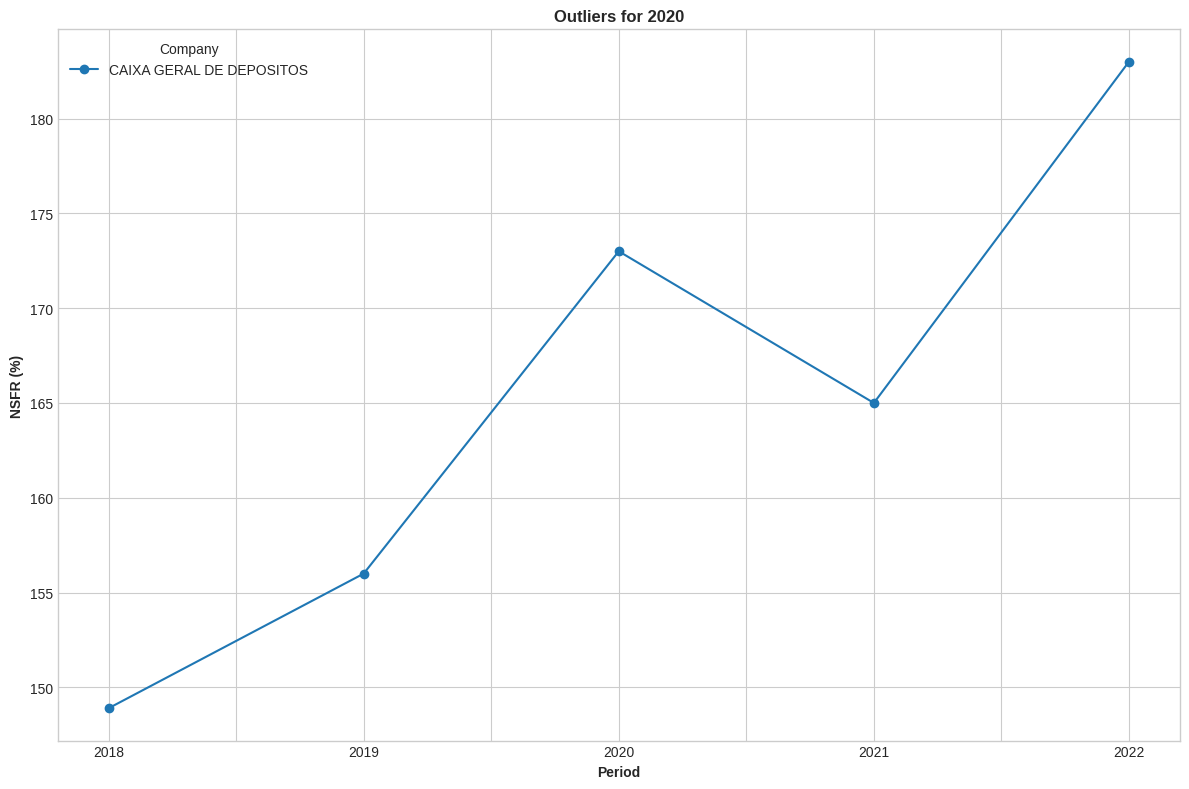

In [ ]:
nsfr_2020 = prepare_for_plot_nsfr(outlier_nsfr_2020)
nsfr_2020.plot(marker='o')
plt.title('Outliers for 2020', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)

In [ ]:
outlier_nsfr_2021 = outliers_nsfr('21')
outlier_nsfr_2021

Company Country  NSFR_18  NSFR_19  NSFR_20  NSFR_21  \
69          BANCA MEDIOLANUM SPA   Italy      NaN      NaN      NaN   198.78   
102  FINECOBANK BANCA FINECO SPA   Italy      NaN      NaN      NaN   325.25   

     NSFR_22  TotAss_18  TotAss_19  TotAss_20  TotAss_21  TotAss_22  
69    179.00  47374.365  53437.634  59029.046  73522.370  73598.890  
102   352.76  24732.630  28022.907  31755.017  33867.175  36268.885

<ipython-input-64-35855588d0ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019',


Text(0, 0.5, 'NSFR (%)')

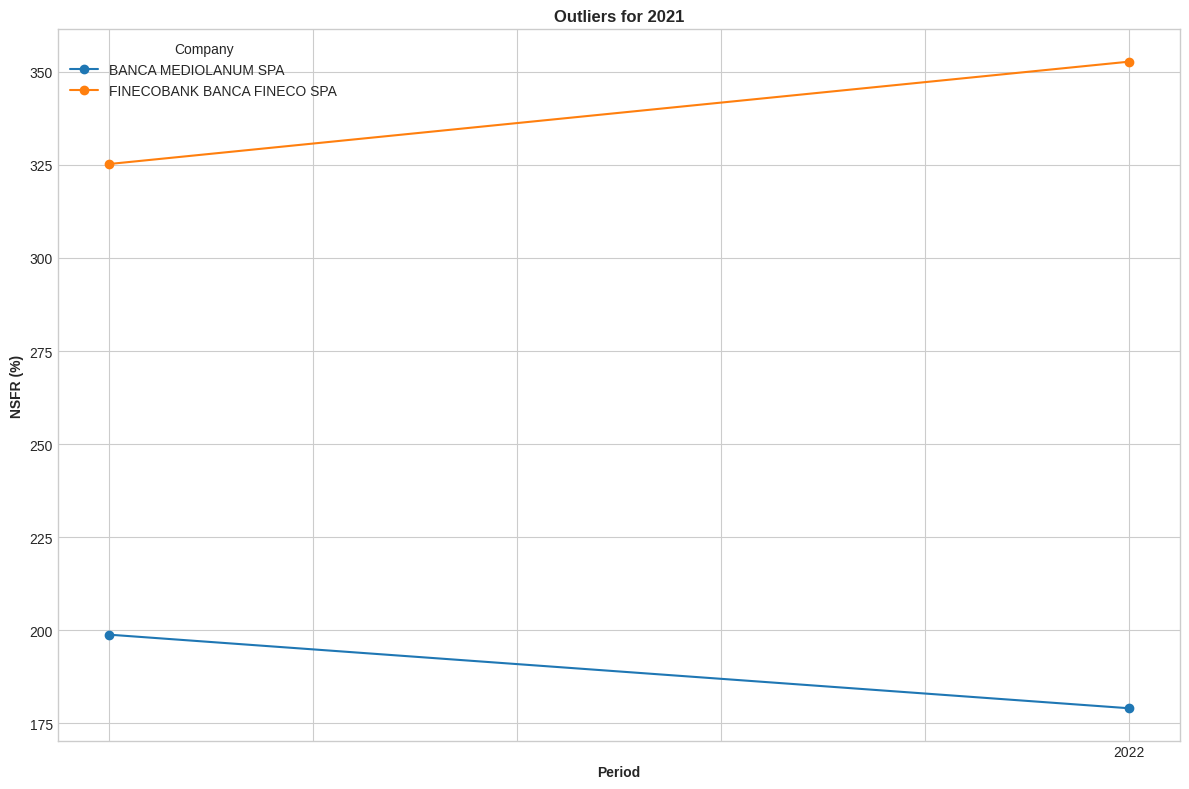

In [ ]:
nsfr_2021 = prepare_for_plot_nsfr(outlier_nsfr_2021)
nsfr_2021.plot(marker='o')
plt.title('Outliers for 2021', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)

# **2. LCR**

Let's now consider the **Liquidity Coverage Ratio**.

The **LCR** refers to the proportion of *highly liquid* assets held by financial institutions, to ensure their ongoing ability to meet *short-term* obligations. It aims to ensure that a bank maintains an adeguate level of *unecumbered*, high-quality liquid assets that can be converted into cash to meet ist liquidity needs for **30** calendar **days** time horizon.

The ratio is given by the ***high-quality*** liquid assets amount (HQLA) over the total ***net*** cash flows, that has to be *greater* than ***100%***.

The *high-quality* liquid assets include only those with a high potential to be converted *easily* and quickly into cash.

In [ ]:
lcr = data_object[['Company', 'Country', 'LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22',
                    'TotAss_18', 'TotAss_19', 'TotAss_20', 'TotAss_21', 'TotAss_22']]
#lcr
lcr.shape

(109, 12)

Text(-0.01, -0.2, 'Source of the data: BankFocus')

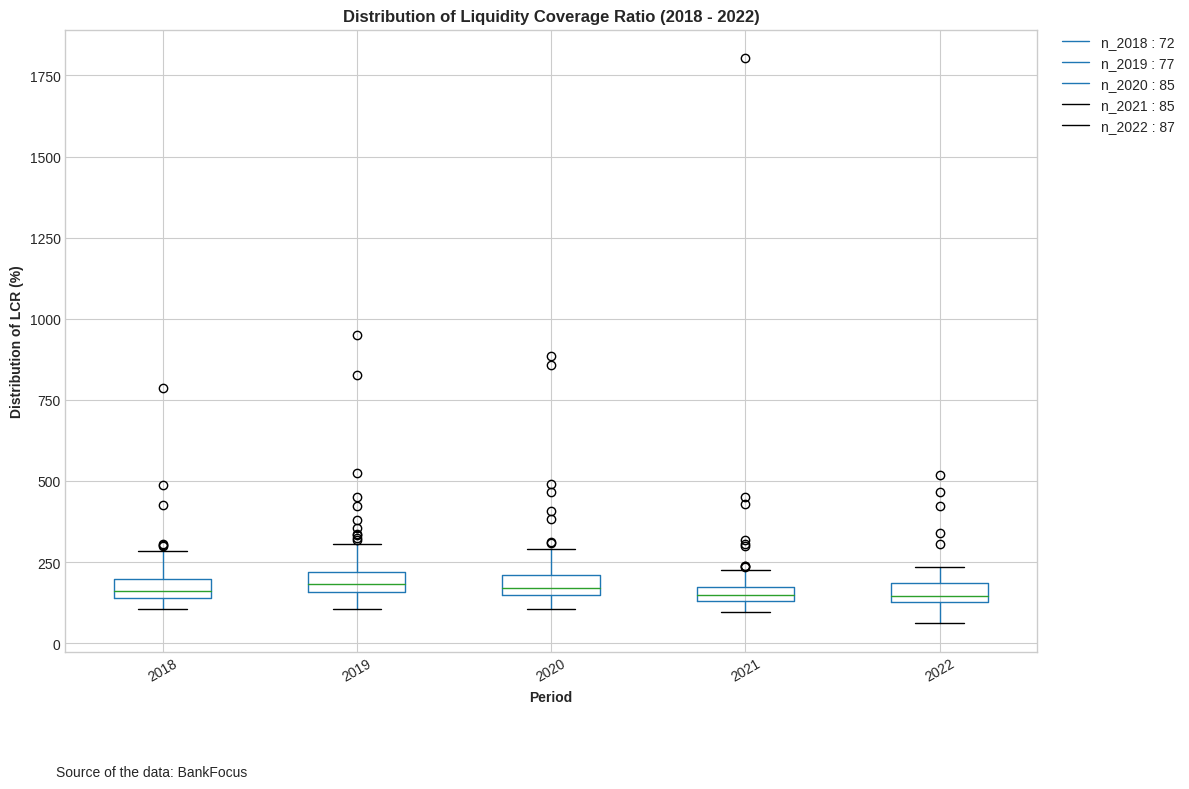

In [ ]:
lcr_only = lcr[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
#lcr_only

bp = lcr_only.iloc[:, ::-1].boxplot(rot = 30)
nobs = lcr[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']].count()
nobs = [str(x) for x in nobs.tolist()]
nobs = [f'LCR_{18+i} n:{nobs[i]}' for i in range(len(nobs))]
bp.legend(['n_2018 : 72', 'n_2019 : 77', 'n_2020 : 85', 'n_2021 : 85', 'n_2022 : 87'], bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
bp.set_title('Distribution of Liquidity Coverage Ratio (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('Distribution of LCR (%)', fontweight = 'bold', fontsize = 10)
bp.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

In [ ]:
# drop rows with NaN
lcr_df = lcr.dropna(axis = 'rows')
#lcr_df

lcr_df.shape

(63, 12)

Text(-0.01, -0.2, 'Source of the data: BankFocus')

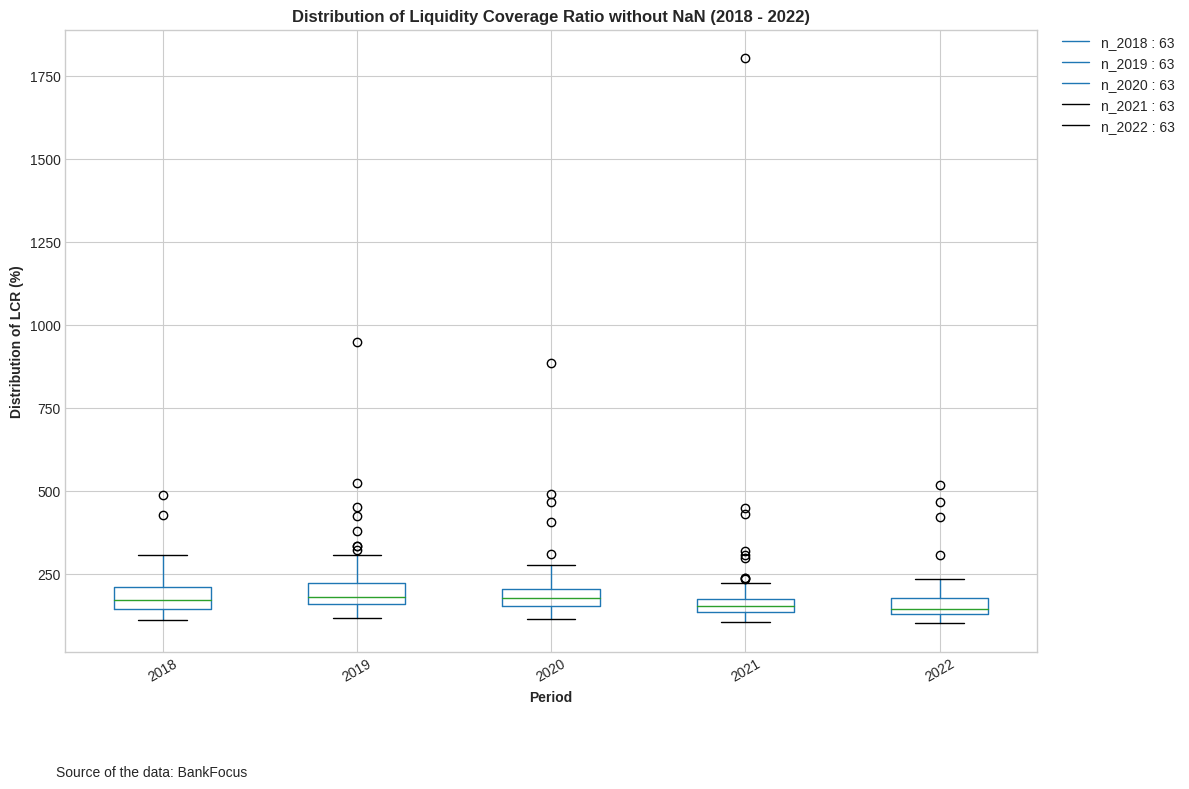

In [ ]:
lcr_only_df = lcr_df[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
#lcr_only_df

bp = lcr_only_df.iloc[:, ::-1].boxplot(rot = 30)
nobs = lcr[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']].count()
nobs = [str(x) for x in nobs.tolist()]
nobs = [f'LCR_{18+i} n:{nobs[i]}' for i in range(len(nobs))]
bp.legend(['n_2018 : 63', 'n_2019 : 63', 'n_2020 : 63', 'n_2021 : 63', 'n_2022 : 63'], bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
bp.set_title('Distribution of Liquidity Coverage Ratio without NaN (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('Distribution of LCR (%)', fontweight = 'bold', fontsize = 10)
bp.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

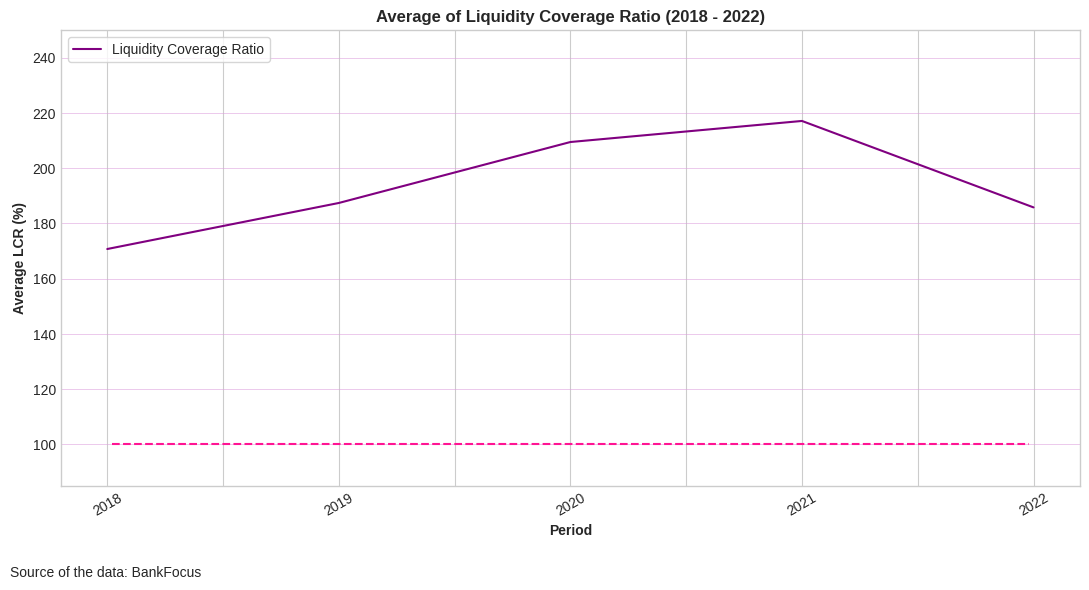

In [ ]:
# MEAN
lcr_only_df = lcr_only.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
pl = lcr_only_df.mean().T.plot(color = "purple", rot = 30, figsize = (11, 6))
pl.set_title('Average of Liquidity Coverage Ratio (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average LCR (%)', fontweight = 'bold', fontsize = 10)
pl.legend(['Liquidity Coverage Ratio'], frameon = True, loc = 'upper left')
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
plt.ylim(85, 250)
pl.text(-0.05, -0.2, 'Source of the data: BankFocus', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'plum', linewidth = 0.4)

## *2.1. SIZE*

In [ ]:
lcr_df.describe()

LCR_18       LCR_19      LCR_20      LCR_21      LCR_22  \
count   63.000000    63.000000   63.000000   63.000000   63.000000   
mean   170.081270   196.802063  206.638889  216.557619  187.965397   
std     77.065323   216.160952  112.781659  124.501488   66.469483   
min    102.100000   106.030000  115.000000  118.180000  113.000000   
25%    130.400000   136.000000  153.500000  159.000000  144.800000   
50%    145.000000   153.000000  177.000000  181.000000  171.000000   
75%    178.000000   174.150000  206.500000  224.205000  211.000000   
max    519.000000  1804.000000  885.960000  949.000000  487.000000   

          TotAss_18     TotAss_19     TotAss_20     TotAss_21     TotAss_22  
count  6.300000e+01  6.300000e+01  6.300000e+01  6.300000e+01  6.300000e+01  
mean   2.488729e+05  2.571348e+05  2.823277e+05  2.955459e+05  3.005192e+05  
std    3.876710e+05  4.005047e+05  4.365574e+05  4.541683e+05  4.650340e+05  
min    2.130456e+04  2.259691e+04  2.530242e+04  2.774100e+04  3.004862e+04  
25%    5.481817e+04  5.633064e+04  5.836563e+04  5.940851e+04  5.978600e+04  
50%    9.154100e+04  9.856200e+04  1.103850e+05  1.155500e+05  1.120740e+05  
75%    2.389944e+05  2.498049e+05  2.769188e+05  2.926675e+05  3.229765e+05  
max    2.040836e+06  2.164713e+06  2.488491e+06  2.634444e+06  2.666376e+06

**We decided to separate the banks into 4 quartiles according to their total assets so as to see the behvaior of each quartile in terms of liquidity. In this part we analyse each quartile's behavior in terms of liquidity coverage ratio.**

In [ ]:
# Creating the Quartiles for years
%matplotlib inline
rcParams['figure.figsize'] = 12,8

#First quartile of elements for the sample according to total assets
Quart1_2018 = lcr_df[(lcr_df['TotAss_18']>=2.130456e+04) & (lcr_df['TotAss_18']<5.481817e+04)]
Quart1_2019 = lcr_df[(lcr_df['TotAss_19']>=2.259691e+04) & (lcr_df['TotAss_19']<5.633064e+04)]
Quart1_2020 = lcr_df[(lcr_df['TotAss_20']>=2.530242e+04) & (lcr_df['TotAss_20']<5.836563e+04)]
Quart1_2021 = lcr_df[(lcr_df['TotAss_21']>=2.774100e+04) & (lcr_df['TotAss_21']<5.940851e+04)]
Quart1_2022 = lcr_df[(lcr_df['TotAss_22']>=3.004862e+04) & (lcr_df['TotAss_22']<5.978600e+04)]

#Second quartile of elements for the sample according to total assets
Quart2_2018 = lcr_df[(lcr_df['TotAss_18']>=5.481817e+04) & (lcr_df['TotAss_18']<9.154100e+04)]
Quart2_2019 = lcr_df[(lcr_df['TotAss_19']>=5.633064e+04) & (lcr_df['TotAss_19']<9.856200e+04)]
Quart2_2020 = lcr_df[(lcr_df['TotAss_20']>=5.836563e+04) & (lcr_df['TotAss_20']<1.103850e+05)]
Quart2_2021 = lcr_df[(lcr_df['TotAss_21']>=5.940851e+04) & (lcr_df['TotAss_21']<1.155500e+05)]
Quart2_2022 = lcr_df[(lcr_df['TotAss_22']>=5.978600e+04) & (lcr_df['TotAss_22']<1.120740e+05)]

#Third quartile of elements for the sample according to total assets
Quart3_2018 = lcr_df[(lcr_df['TotAss_18']>=9.154100e+04) & (lcr_df['TotAss_18']<2.389944e+05)]
Quart3_2019 = lcr_df[(lcr_df['TotAss_19']>=9.856200e+04) & (lcr_df['TotAss_19']<2.498049e+05)]
Quart3_2020 = lcr_df[(lcr_df['TotAss_20']>=1.103850e+05) & (lcr_df['TotAss_20']<2.769188e+05)]
Quart3_2021 = lcr_df[(lcr_df['TotAss_21']>=1.155500e+05) & (lcr_df['TotAss_21']<2.926675e+05)]
Quart3_2022 = lcr_df[(lcr_df['TotAss_22']>=1.120740e+05) & (lcr_df['TotAss_22']<3.229765e+05)]

#Forth quartile of elements for the sample according to total assets
Quart4_2018 = lcr_df[(lcr_df['TotAss_18']>=2.389944e+05) & (lcr_df['TotAss_18']<=2.040836e+06)]
Quart4_2019 = lcr_df[(lcr_df['TotAss_19']>=2.498049e+05) & (lcr_df['TotAss_19']<=2.164713e+06)]
Quart4_2020 = lcr_df[(lcr_df['TotAss_20']>=2.769188e+05) & (lcr_df['TotAss_20']<=2.488491e+06)]
Quart4_2021 = lcr_df[(lcr_df['TotAss_21']>=2.926675e+05) & (lcr_df['TotAss_21']<=2.634444e+06)]
Quart4_2022 = lcr_df[(lcr_df['TotAss_22']>=3.229765e+05) & (lcr_df['TotAss_22']<=2.666376e+06)]

In [ ]:
#Intersection for the first quartile
merge_1Q_18 = pd.merge(Quart1_2018, Quart1_2019, on = 'Company')
merge_1Q_19 = pd.merge(merge_1Q_18, Quart1_2020, on = 'Company')
merge_1Q_20 = pd.merge(merge_1Q_19, Quart1_2021, on = 'Company')
merge_1Q_21 = pd.merge(merge_1Q_20, Quart1_2022, on = 'Company')

#Intersection for the second quartile
merge_2Q_18 = pd.merge(Quart2_2018, Quart2_2019, on = 'Company')
merge_2Q_19 = pd.merge(merge_2Q_18, Quart2_2020, on = 'Company')
merge_2Q_20 = pd.merge(merge_2Q_19, Quart2_2021, on = 'Company')
merge_2Q_21 = pd.merge(merge_2Q_20, Quart2_2022, on = 'Company')

#Intersection for the third quartile
merge_3Q_18 = pd.merge(Quart3_2018, Quart3_2019, on = 'Company')
merge_3Q_19 = pd.merge(merge_3Q_18, Quart3_2020, on = 'Company')
merge_3Q_20 = pd.merge(merge_3Q_19, Quart3_2021, on = 'Company')
merge_3Q_21 = pd.merge(merge_3Q_20, Quart3_2022, on = 'Company')

#Intersection for the forth quartile
merge_4Q_18 = pd.merge(Quart4_2018, Quart4_2019, on = 'Company')
merge_4Q_19 = pd.merge(merge_4Q_18, Quart4_2020, on = 'Company')
merge_4Q_20 = pd.merge(merge_4Q_19, Quart4_2021, on = 'Company')
merge_4Q_21 = pd.merge(merge_4Q_20, Quart4_2022, on = 'Company')

<ipython-input-78-84540d4ea41a>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'TotAss_19_x', 'LCR_18_x', 'Country_x', 'TotAss_22_x', 'LCR_20_x', 'TotAss_21_x', 'LCR_22_x', 'TotAss_18_x', 'LCR_19_x', 'LCR_21_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_1Q_20 = pd.merge(merge_1Q_19, Quart1_2021, on = 'Company')
<ipython-input-78-84540d4ea41a>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'TotAss_19_x', 'LCR_18_x', 'Country_x', 'TotAss_22_x', 'LCR_20_x', 'TotAss_21_x', 'LCR_22_x', 'TotAss_18_x', 'LCR_19_x', 'LCR_21_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_2Q_20 = pd.merge(merge_2Q_19, Quart2_2021, on = 'Company')
<ipython-input-78-84540d4ea41a>:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'TotAss_19_x', 'LCR_18_x', 'Country_x', 'TotAss_22_x', 'LCR_20_x', 'TotAss_21_x', 'LCR_22_x', 'TotA

In [ ]:
Quartile_1 = merge_1Q_21[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_2 = merge_2Q_21[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_3 = merge_3Q_21[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_4 = merge_4Q_21[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]

'''

Quartile_1 = Quartile_1.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_2 = Quartile_2.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_3 = Quartile_3.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_4 = Quartile_4.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
'''

Quartile_4

LCR_18  LCR_19  LCR_20  LCR_21  LCR_22
0   132.00  125.00  154.00   143.0   129.0
1   158.00  147.00  168.00   163.0   152.0
2   129.00  119.00  149.00   129.0   141.0
3   140.40  141.20  144.80   133.1   141.6
4   123.00  127.00  137.00   139.0   134.0
5   145.00  153.00  179.00   186.0   166.0
6   127.00  128.00  149.00   165.0   159.0
7   135.00  132.00  192.77   184.0   156.0
8   141.40  144.60  146.30   147.7   145.9
9   185.00  166.00  158.00   160.0   162.0
10  200.00  179.00  276.00   336.0   194.0
11  135.66  132.72  135.70   145.1   141.1
12  123.00  157.00  154.00   131.0   145.0
13  139.00  138.00  147.00   167.0   152.0

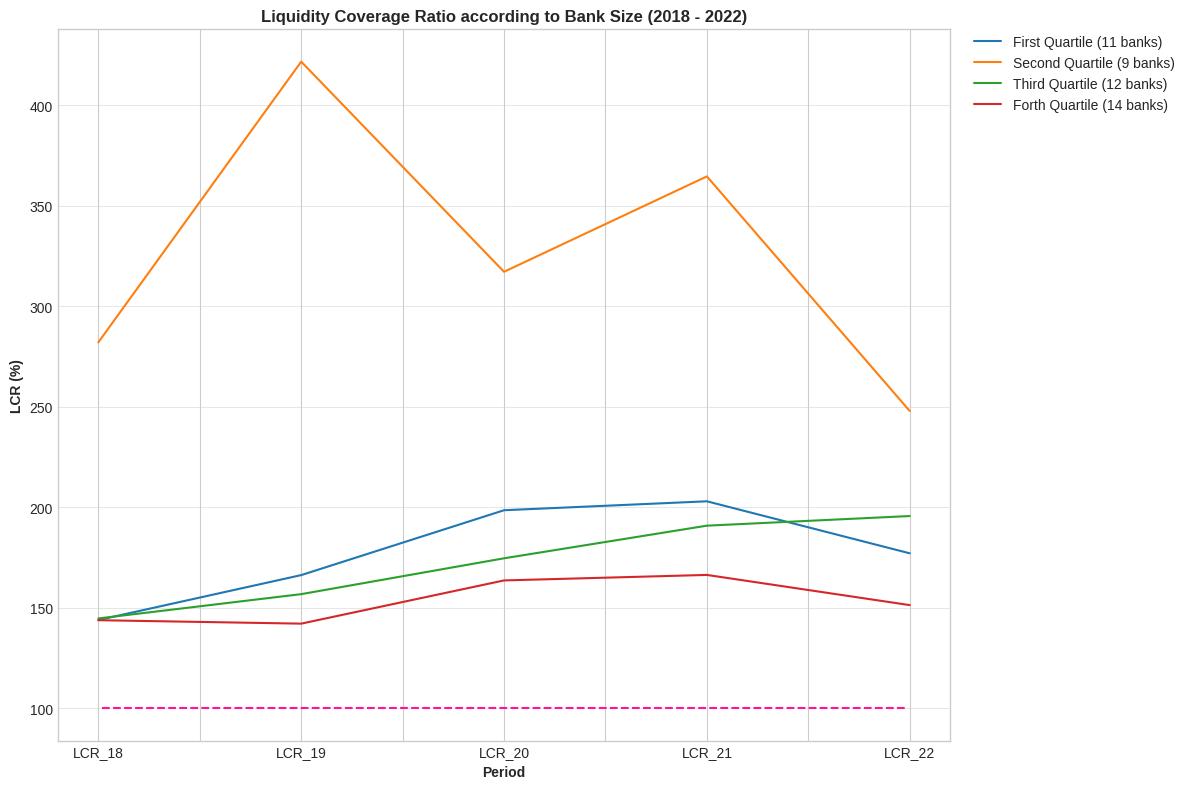

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 12,8
fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
Quartile_1.mean().plot(ax = ax, label = 'First Quartile (11 banks)')
Quartile_2.mean().plot(ax = ax, label = 'Second Quartile (9 banks)')
Quartile_3.mean().plot(ax = ax, label = 'Third Quartile (12 banks)')
Quartile_4.mean().plot(ax = ax, label = 'Forth Quartile (14 banks)')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
ax.set_title('Liquidity Coverage Ratio according to Bank Size (2018 - 2022)', fontweight = 'bold', fontsize = 12)
ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
ax.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

In [ ]:
#First qurtile of elemnts for the sample according to total assets
Quart1_2018 = lcr_df[(lcr_df['TotAss_18']>=2.130456e+04)& (lcr_df['TotAss_18']<=5.481817e+04)] #First quartile 15 banks
Quart1_2018.shape

(15, 12)

In [ ]:
Quart2_2018= lcr_df[(lcr_df['TotAss_18']>5.481817e+04)& (lcr_df['TotAss_18']<=9.154100e+04)]
Quart2_2018.shape

(16, 12)

In [ ]:
Quart3_2018= lcr_df[(lcr_df['TotAss_18']>	9.154100e+04)& (lcr_df['TotAss_18']<=2.389944e+05)]
Quart3_2018.shape

(15, 12)

In [ ]:
Quart4_2018= lcr_df[(lcr_df['TotAss_18']>	2.389944e+05)& (lcr_df['TotAss_18']<=2.040836e+06	)]
Quart4_2018.shape

(16, 12)

**We decided to separate the banks into 8 subsets according to their total assets so as to see the behvaior of each quartile in terms of liquidity. In this part we analyse each quartile's behavior in terms of liquidity coverage ratio.**

In [ ]:
# Creating the Quartiles for years
%matplotlib inline
rcParams['figure.figsize'] = 12,8

#First quartile of elements for the sample according to total assets
Quart1_2018 = lcr_df[(lcr_df['TotAss_18']>=30000) & (lcr_df['TotAss_18']<=50000)]
Quart1_2019 = lcr_df[(lcr_df['TotAss_19']>=30000) & (lcr_df['TotAss_19']<=50000)]
Quart1_2020 = lcr_df[(lcr_df['TotAss_20']>=30000) & (lcr_df['TotAss_20']<=50000)]
Quart1_2021 = lcr_df[(lcr_df['TotAss_21']>=30000) & (lcr_df['TotAss_21']<=50000)]
Quart1_2022 = lcr_df[(lcr_df['TotAss_22']>=30000) & (lcr_df['TotAss_22']<=50000)]

#Second quartile of elements for the sample according to total assets
Quart2_2018 = lcr_df[(lcr_df['TotAss_18']>=50000) & (lcr_df['TotAss_18']<=75000)]
Quart2_2019 = lcr_df[(lcr_df['TotAss_19']>=50000) & (lcr_df['TotAss_19']<=75000)]
Quart2_2020 = lcr_df[(lcr_df['TotAss_20']>=50000) & (lcr_df['TotAss_20']<=75000)]
Quart2_2021 = lcr_df[(lcr_df['TotAss_21']>=50000) & (lcr_df['TotAss_21']<=75000)]
Quart2_2022 = lcr_df[(lcr_df['TotAss_22']>=50000) & (lcr_df['TotAss_22']<=75000)]

#Third quartile of elements for the sample according to total assets
Quart3_2018 = lcr_df[(lcr_df['TotAss_18']>=75000) & (lcr_df['TotAss_18']<=100000)]
Quart3_2019 = lcr_df[(lcr_df['TotAss_19']>=75000) & (lcr_df['TotAss_19']<=100000)]
Quart3_2020 = lcr_df[(lcr_df['TotAss_20']>=75000) & (lcr_df['TotAss_20']<=100000)]
Quart3_2021 = lcr_df[(lcr_df['TotAss_21']>=75000) & (lcr_df['TotAss_21']<=100000)]
Quart3_2022 = lcr_df[(lcr_df['TotAss_22']>=75000) & (lcr_df['TotAss_22']<=100000)]

#Forth quartile of elements for the sample according to total assets
Quart4_2018 = lcr_df[(lcr_df['TotAss_18']>=100000) & (lcr_df['TotAss_18']<=150000)]
Quart4_2019 = lcr_df[(lcr_df['TotAss_19']>=100000) & (lcr_df['TotAss_19']<=150000)]
Quart4_2020 = lcr_df[(lcr_df['TotAss_20']>=100000) & (lcr_df['TotAss_20']<=150000)]
Quart4_2021 = lcr_df[(lcr_df['TotAss_21']>=100000) & (lcr_df['TotAss_21']<=150000)]
Quart4_2022 = lcr_df[(lcr_df['TotAss_22']>=100000) & (lcr_df['TotAss_22']<=150000)]

#Fifth quartile of elements for the sample according to total assets
Quart5_2018 = lcr_df[(lcr_df['TotAss_18']>=150000) & (lcr_df['TotAss_18']<=300000)]
Quart5_2019 = lcr_df[(lcr_df['TotAss_19']>=150000) & (lcr_df['TotAss_19']<=300000)]
Quart5_2020 = lcr_df[(lcr_df['TotAss_20']>=150000) & (lcr_df['TotAss_20']<=300000)]
Quart5_2021 = lcr_df[(lcr_df['TotAss_21']>=150000) & (lcr_df['TotAss_21']<=300000)]
Quart5_2022 = lcr_df[(lcr_df['TotAss_22']>=150000) & (lcr_df['TotAss_22']<=300000)]

#Sixth quartile of elements for the sample according to total assets
Quart6_2018 = lcr_df[(lcr_df['TotAss_18']>=300000) & (lcr_df['TotAss_18']<=500000)]
Quart6_2019 = lcr_df[(lcr_df['TotAss_19']>=300000) & (lcr_df['TotAss_19']<=500000)]
Quart6_2020 = lcr_df[(lcr_df['TotAss_20']>=300000) & (lcr_df['TotAss_20']<=500000)]
Quart6_2021 = lcr_df[(lcr_df['TotAss_21']>=300000) & (lcr_df['TotAss_21']<=500000)]
Quart6_2022 = lcr_df[(lcr_df['TotAss_22']>=300000) & (lcr_df['TotAss_22']<=500000)]

#Seventh quartile of elements for the sample according to total assets
Quart7_2018 = lcr_df[(lcr_df['TotAss_18']>=500000) & (lcr_df['TotAss_18']<=1000000)]
Quart7_2019 = lcr_df[(lcr_df['TotAss_19']>=500000) & (lcr_df['TotAss_19']<=1000000)]
Quart7_2020 = lcr_df[(lcr_df['TotAss_20']>=500000) & (lcr_df['TotAss_20']<=1000000)]
Quart7_2021 = lcr_df[(lcr_df['TotAss_21']>=500000) & (lcr_df['TotAss_21']<=1000000)]
Quart7_2022 = lcr_df[(lcr_df['TotAss_22']>=500000) & (lcr_df['TotAss_22']<=1000000)]

#Eighth quartile of elements for the sample according to total assets
Quart8_2018 = lcr_df[(lcr_df['TotAss_18']>1000000)]
Quart8_2019 = lcr_df[(lcr_df['TotAss_19']>1000000)]
Quart8_2020 = lcr_df[(lcr_df['TotAss_20']>1000000)]
Quart8_2021 = lcr_df[(lcr_df['TotAss_21']>1000000)]
Quart8_2022 = lcr_df[(lcr_df['TotAss_22']>1000000)]

In [ ]:
#Intersection for the first quartile
merge_1Q_18 = pd.merge(Quart1_2018, Quart1_2019, on = 'Company')
merge_1Q_19 = pd.merge(merge_1Q_18, Quart1_2020, on = 'Company')
merge_1Q_20 = pd.merge(merge_1Q_19, Quart1_2021, on = 'Company')
merge_1Q_21 = pd.merge(merge_1Q_20, Quart1_2022, on = 'Company')

#Intersection for the second quartile
merge_2Q_18 = pd.merge(Quart2_2018, Quart2_2019, on = 'Company')
merge_2Q_19 = pd.merge(merge_2Q_18, Quart2_2020, on = 'Company')
merge_2Q_20 = pd.merge(merge_2Q_19, Quart2_2021, on = 'Company')
merge_2Q_21 = pd.merge(merge_2Q_20, Quart2_2022, on = 'Company')

#Intersection for the third quartile
merge_3Q_18 = pd.merge(Quart3_2018, Quart3_2019, on = 'Company')
merge_3Q_19 = pd.merge(merge_3Q_18, Quart3_2020, on = 'Company')
merge_3Q_20 = pd.merge(merge_3Q_19, Quart3_2021, on = 'Company')
merge_3Q_21 = pd.merge(merge_3Q_20, Quart3_2022, on = 'Company')

#Intersection for the forth quartile
merge_4Q_18 = pd.merge(Quart4_2018, Quart4_2019, on = 'Company')
merge_4Q_19 = pd.merge(merge_4Q_18, Quart4_2020, on = 'Company')
merge_4Q_20 = pd.merge(merge_4Q_19, Quart4_2021, on = 'Company')
merge_4Q_21 = pd.merge(merge_4Q_20, Quart4_2022, on = 'Company')

#Intersection for the fifth quartile
merge_5Q_18 = pd.merge(Quart5_2018, Quart5_2019, on = 'Company')
merge_5Q_19 = pd.merge(merge_5Q_18, Quart5_2020, on = 'Company')
merge_5Q_20 = pd.merge(merge_5Q_19, Quart5_2021, on = 'Company')
merge_5Q_21 = pd.merge(merge_5Q_20, Quart5_2022, on = 'Company')

#Intersection for the sixth quartile
merge_6Q_18 = pd.merge(Quart6_2018, Quart6_2019, on = 'Company')
merge_6Q_19 = pd.merge(merge_6Q_18, Quart6_2020, on = 'Company')
merge_6Q_20 = pd.merge(merge_6Q_19, Quart6_2021, on = 'Company')
merge_6Q_21 = pd.merge(merge_6Q_20, Quart6_2022, on = 'Company')

#Intersection for the seventh quartile
merge_7Q_18 = pd.merge(Quart7_2018, Quart7_2019, on = 'Company')
merge_7Q_19 = pd.merge(merge_7Q_18, Quart7_2020, on = 'Company')
merge_7Q_20 = pd.merge(merge_7Q_19, Quart7_2021, on = 'Company')
merge_7Q_21 = pd.merge(merge_7Q_20, Quart7_2022, on = 'Company')

#Intersection for the forth quartile
merge_8Q_18 = pd.merge(Quart8_2018, Quart8_2019, on = 'Company')
merge_8Q_19 = pd.merge(merge_8Q_18, Quart8_2020, on = 'Company')
merge_8Q_20 = pd.merge(merge_8Q_19, Quart8_2021, on = 'Company')
merge_8Q_21 = pd.merge(merge_8Q_20, Quart8_2022, on = 'Company')

<ipython-input-86-8c8054091422>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'TotAss_19_x', 'LCR_18_x', 'Country_x', 'TotAss_22_x', 'LCR_20_x', 'TotAss_21_x', 'LCR_22_x', 'TotAss_18_x', 'LCR_19_x', 'LCR_21_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_1Q_20 = pd.merge(merge_1Q_19, Quart1_2021, on = 'Company')
<ipython-input-86-8c8054091422>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'TotAss_19_x', 'LCR_18_x', 'Country_x', 'TotAss_22_x', 'LCR_20_x', 'TotAss_21_x', 'LCR_22_x', 'TotAss_18_x', 'LCR_19_x', 'LCR_21_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_2Q_20 = pd.merge(merge_2Q_19, Quart2_2021, on = 'Company')
<ipython-input-86-8c8054091422>:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'TotAss_20_x', 'TotAss_19_x', 'LCR_18_x', 'Country_x', 'TotAss_22_x', 'LCR_20_x', 'TotAss_21_x', 'LCR_22_x', 'TotA

In [ ]:
Quartile_1 = merge_1Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_2 = merge_2Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_3 = merge_3Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_4 = merge_4Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_5 = merge_5Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_6 = merge_6Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_7 = merge_7Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_8 = merge_8Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]

'''
Quartile_1 = Quartile_1.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_2 = Quartile_2.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_3 = Quartile_3.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_4 = Quartile_4.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_5 = Quartile_5.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_6 = Quartile_6.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_7 = Quartile_7.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
Quartile_8 = Quartile_8.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
'''
Quartile_1

Country  LCR_18  LCR_19  LCR_20  LCR_21  LCR_22
0   Finland   177.0   430.2  264.40   334.9   256.7
1  Portugal   125.0   143.0  144.00   182.0   210.0
2  Portugal   167.0   173.3  260.16   272.0   237.0

<ipython-input-88-2de1297142b5>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Quartile_1.mean().plot(ax = ax, label = 'From 30 to 50 BN of Tot.Assets (3 banks)', fontsize=12)
<ipython-input-88-2de1297142b5>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Quartile_2.mean().plot(ax = ax, label = 'From 50 to 75 BN of Tot.Assets (6 banks)')
<ipython-input-88-2de1297142b5>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'nume

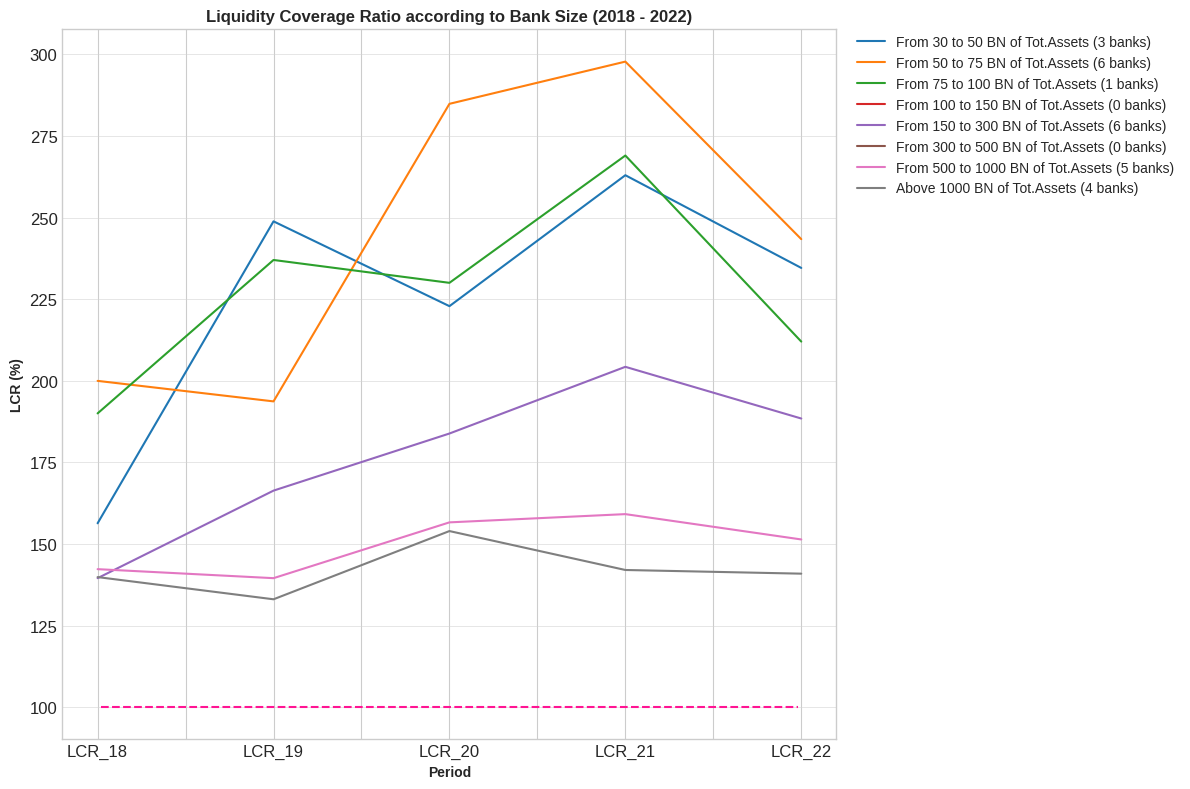

In [ ]:
fix, ax = plt.subplots() # Create the figure and axes object
%matplotlib inline
rcParams['figure.figsize'] = 12,8

# Plot the first x and y axes:
Quartile_1.mean().plot(ax = ax, label = 'From 30 to 50 BN of Tot.Assets (3 banks)', fontsize=12)
Quartile_2.mean().plot(ax = ax, label = 'From 50 to 75 BN of Tot.Assets (6 banks)')
Quartile_3.mean().plot(ax = ax, label = 'From 75 to 100 BN of Tot.Assets (1 banks)')
Quartile_4.mean().plot(ax = ax, label = 'From 100 to 150 BN of Tot.Assets (0 banks)')
Quartile_5.mean().plot(ax = ax, label = 'From 150 to 300 BN of Tot.Assets (6 banks)')
Quartile_6.mean().plot(ax = ax, label = 'From 300 to 500 BN of Tot.Assets (0 banks)')
Quartile_7.mean().plot(ax = ax, label = 'From 500 to 1000 BN of Tot.Assets (5 banks)')
Quartile_8.mean().plot(ax = ax, label = 'Above 1000 BN of Tot.Assets (4 banks)')

plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
ax.set_title('Liquidity Coverage Ratio according to Bank Size (2018 - 2022)', fontweight = 'bold', fontsize = 12)
ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
ax.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

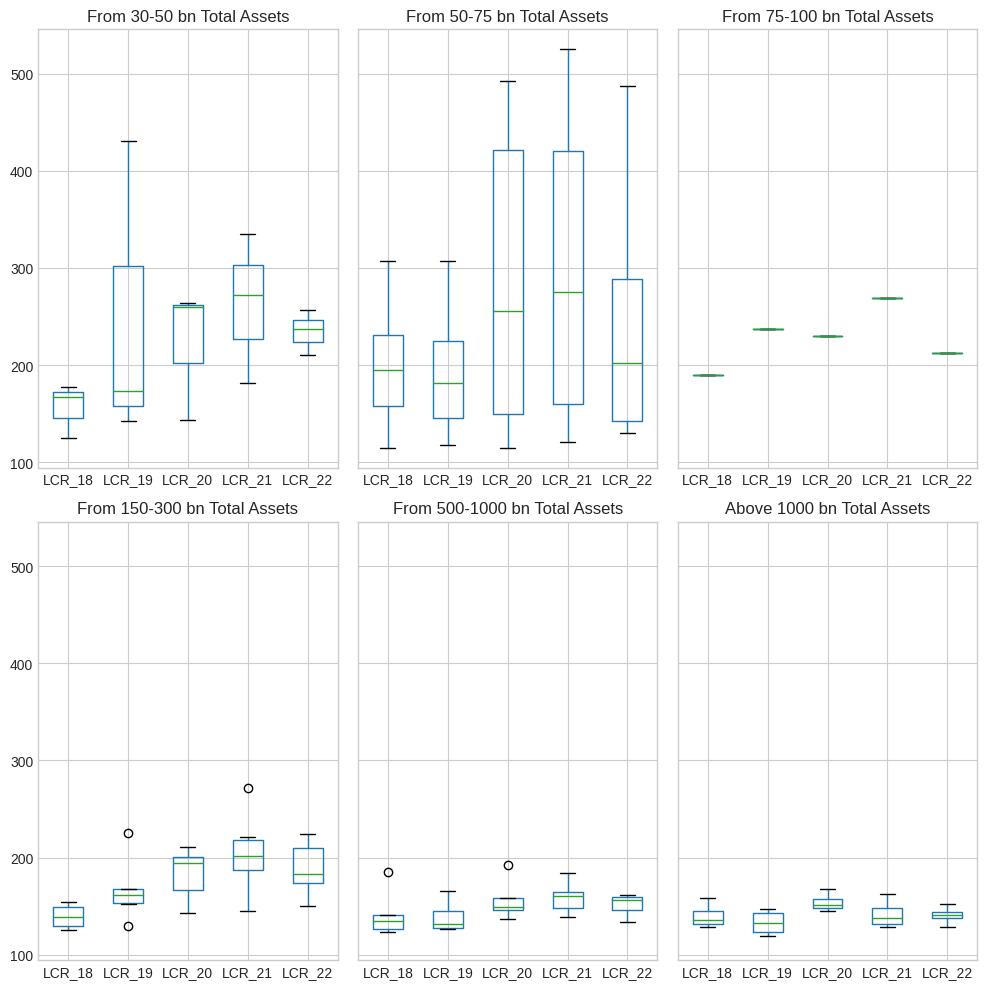

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=10,10

plt.rcParams["figure.autolayout"] = True

Quartile_1 = merge_1Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_2 = merge_2Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_3 = merge_3Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_4 = merge_4Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_5 = merge_5Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_6 = merge_6Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_7 = merge_7Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
Quartile_8 = merge_8Q_21[['Country','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]

fix,((ax1, ax2, ax3),(ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3, sharey=True) # Create the figure and axes object

Quartile_1.boxplot(ax = ax1, fontsize=10)
ax1.set_title('From 30-50 bn Total Assets')

Quartile_2.boxplot(ax = ax2, fontsize=10)
ax2.set_title('From 50-75 bn Total Assets')

Quartile_3.boxplot(ax = ax3, fontsize=10)
ax3.set_title('From 75-100 bn Total Assets')

Quartile_5.boxplot(ax = ax4, fontsize=10)
ax4.set_title('From 150-300 bn Total Assets')

Quartile_7.boxplot(ax = ax5, fontsize=10)
ax5.set_title('From 500-1000 bn Total Assets')

Quartile_8.boxplot(ax = ax6, fontsize=10)
ax6.set_title('Above 1000 bn Total Assets')




plt.show()

<Axes: title={'center': 'Above 1000 bn Total Assets'}>

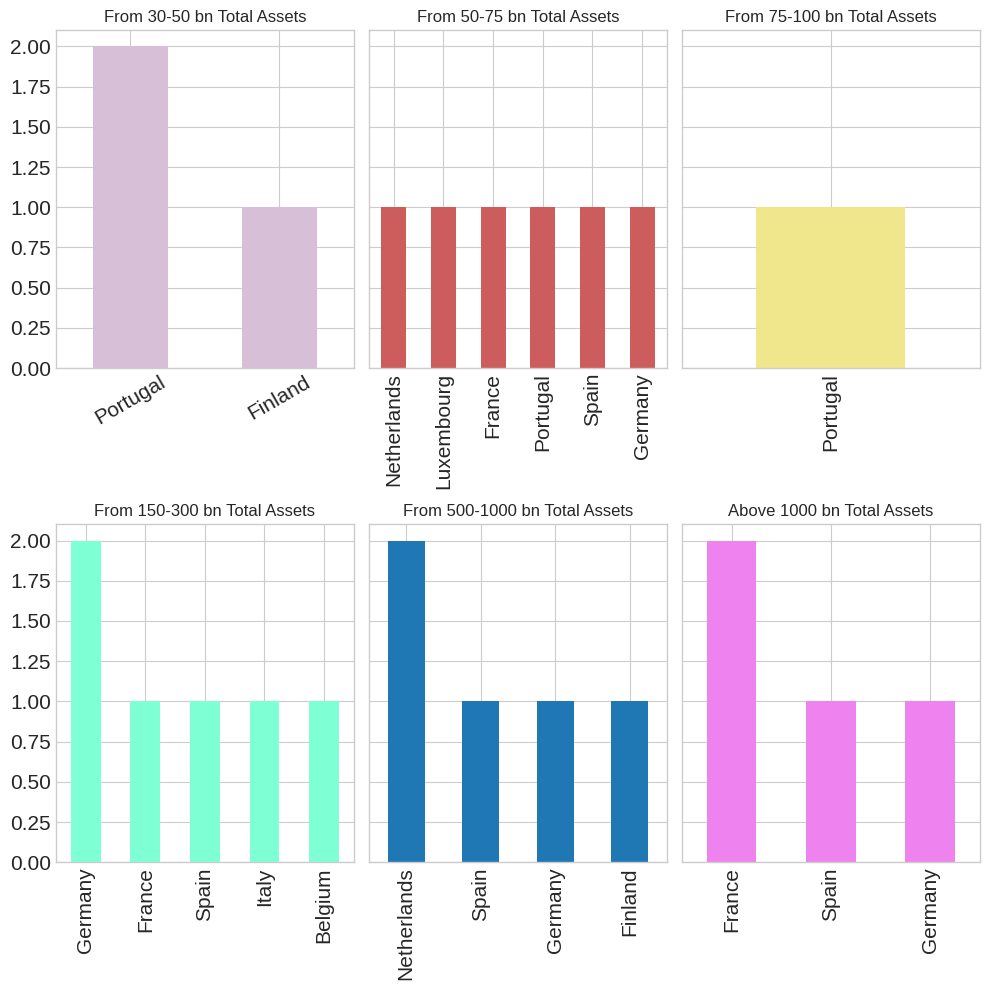

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 10,10

plt.rcParams["figure.autolayout"] = True

#Crearing the Quartiles for years

country_over_30 = Quartile_1['Country'].value_counts()
country_over_50 = Quartile_2['Country'].value_counts()
country_over_75 = Quartile_3['Country'].value_counts()
country_over_150 = Quartile_5['Country'].value_counts()
country_over_500 = Quartile_7['Country'].value_counts()
country_over_1000 = Quartile_8['Country'].value_counts()

fix,((ax1, ax2, ax3),(ax4, ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3, sharey = True) # Create the figure and axes object

country_over_30.plot(ax = ax1, rot = 30, kind = 'bar', color = 'thistle', title = 'From 30-50 bn Total Assets', fontsize = 15)
country_over_50.plot(ax = ax2, kind = 'bar', color = 'indianred', title = 'From 50-75 bn Total Assets', fontsize = 15)
country_over_75.plot(ax = ax3, kind = 'bar', color = 'khaki', title = 'From 75-100 bn Total Assets', fontsize = 15)
country_over_150.plot(ax = ax4, kind = 'bar', color = 'aquamarine', title = 'From 150-300 bn Total Assets', fontsize = 15)
country_over_500.plot(ax = ax5, kind = 'bar', title = 'From 500-1000 bn Total Assets', fontsize = 15)
country_over_1000.plot(ax = ax6, kind = 'bar', color = 'violet', title = 'Above 1000 bn Total Assets', fontsize = 15)


## *2.2 YEAR TO YEAR ANALYSIS*



The first step towards a year to year analysis is isolating each year and examining the LCR ratio. To isolate the year we created a varibale containg only the LCR ratio for teh ceratin year from our sample of 109 banks.

### **2018**

In [ ]:
lcr_18 = data_object[['Company', 'Country', 'LCR_18']]
lcr_df_18_na = lcr_18.dropna(axis = 'rows')
lcr_df_18_na.shape

(72, 3)

What we see is that in the new dataframe we have 72 banks for the year 2018  with LCR ratio not missing.

In [ ]:
def line_plot_boxplot2(lcr_df_18_na, lcr_18, year):
  rcParams['figure.figsize'] = 15,5

  fix, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True) # Create the figure and axes object

  sns.scatterplot(ax = ax1, data = lcr_18, x = range(1,110), y = 'LCR_'  + str(year)[2:])
  ax1.set_title('LCR in ' f'{year} ({lcr_df_18_na.shape[0]} banks)', fontweight = 'bold', fontsize = 12)
  # Set x-axis label
  ax1.set_xlabel("Banks' Identifier", fontweight = 'bold', fontsize = 10)
  # Set y-axis label
  ax1.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
  ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
  ax1.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)
  ax1.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = ax1.transAxes)

  lcr_df_18_na.boxplot(ax = ax2, fontsize = 10, color = '#F72585')
  ax2.set_title('Distribution of LCR in ' f'{year} ({lcr_df_18_na.shape[0]} banks)', fontweight = 'bold', fontsize = 12)
  #ax2.set_xlabel(f'{year}', fontweight = 'bold', fontsize = 10)
  ax2.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

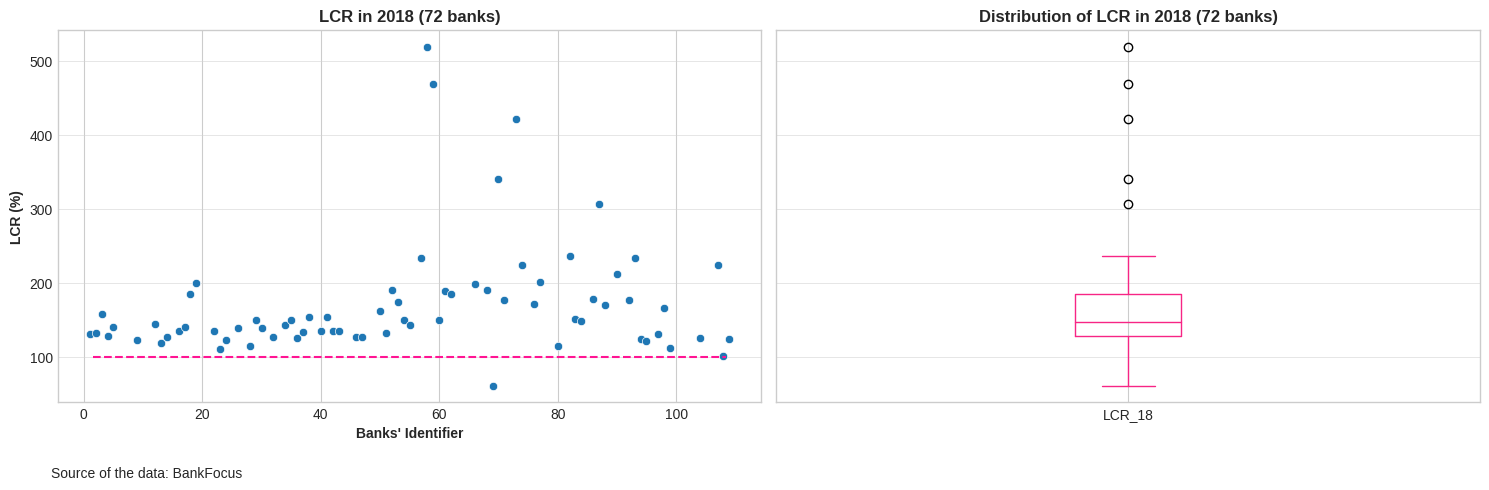

In [ ]:
line_plot_boxplot2(lcr_df_18_na, lcr_18, 2018)

Opposite to what we were seeing till now, we see that there has been a bank with less than 100% LCR ratio in 2018.

*The bank that does not satisfy the minimum value for the regulatory ratio LCR(%) is PIRAEUS FINANCIAL HOLDINGS SA and is only one withi the samplw with 72 banks.*

In [ ]:
lcr_df_18_na_less=lcr_df_18_na[(lcr_df_18_na['LCR_18']<100)]
lcr_df_18_na_less.head()

Company Country  LCR_18
68  PIRAEUS FINANCIAL HOLDINGS SA  Greece    62.0

In [ ]:
lcr_df_18_na_country=lcr_df_18_na['Country'].value_counts()
print(lcr_df_18_na_country)

France         18
Germany        12
Spain           9
Italy           7
Belgium         5
Portugal        5
Netherlands     4
Ireland         4
Austria         3
Finland         2
Greece          2
Luxembourg      1
Name: Country, dtype: int64


[Text(0, 0, '18'),
 Text(0, 0, '12'),
 Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

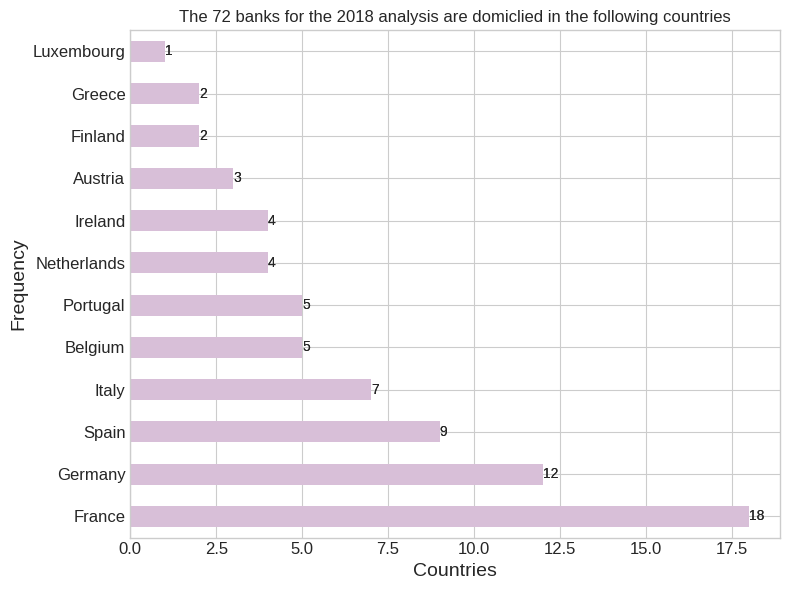

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 8,6

bottom,top = plt.ylim(0,19)
plt.rcParams["figure.autolayout"] = True
plot_country_18=lcr_df_18_na_country.plot(kind='barh', x='Country', color='thistle', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title('The 72 banks for the 2018 analysis are domiclied in the following countries')
plt.xlabel('Countries', fontsize=14)


for bars in plot_country_18.containers:
    plot_country_18.bar_label(bars)


plot_country_18.bar_label(bars)

In [ ]:
for x in ['LCR_18']:
    q75,q25 = np.percentile(lcr_df_18_na.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    lcr_df_18_na.loc[lcr_df_18_na[x] < min,x] = np.nan
    lcr_df_18_na.loc[lcr_df_18_na[x] > max,x] = np.nan

    lcr_df_18_na_outliers = lcr_df_18_na.dropna(axis = 'rows')

Considering the presence of outliers, we decided to remove them and get a second view of the situation of the LcR ratio for the year 2019 in our sample.
The banks decreased to 67 in this case.

In [ ]:
lcr_df_18_na_outliers.shape

(67, 3)

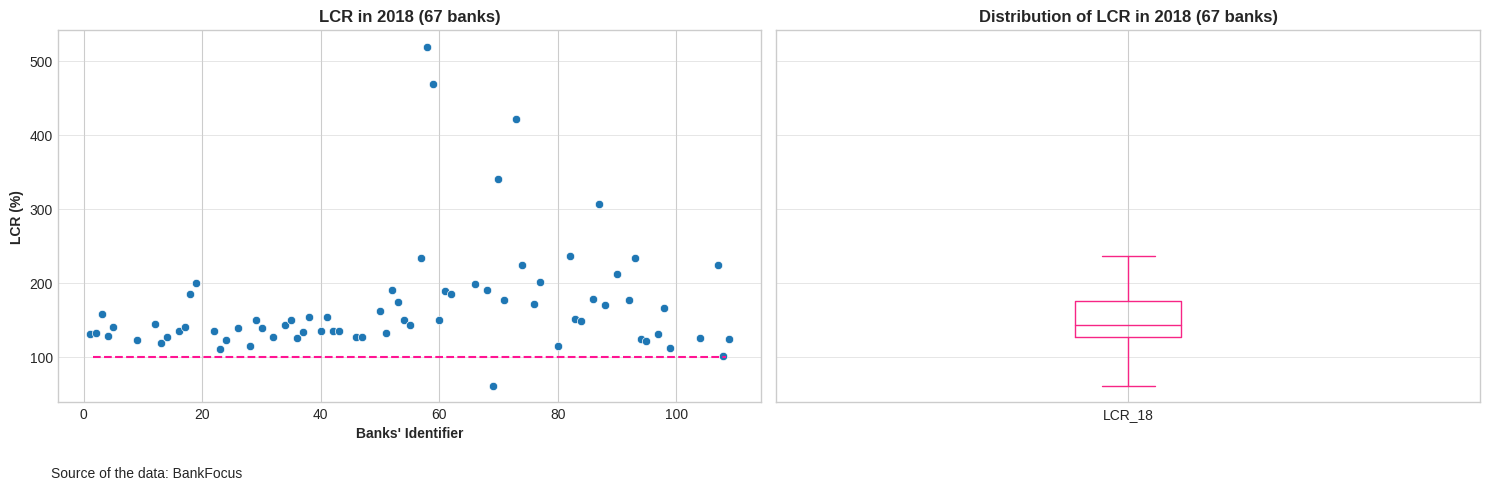

In [ ]:
line_plot_boxplot2(lcr_df_18_na_outliers, lcr_18, 2018)

In [ ]:
lcr_2018_mean_NoO=lcr_df_18_na_outliers['LCR_18'].mean()
print(lcr_2018_mean_NoO)

152.78597014925376


In [ ]:
 statistics.stdev(lcr_df_18_na_outliers['LCR_18'])

35.31954738460901

We see that the presence of the Greek bank that was not close to the regularoty min in 2018, however we see that the mean value is 1.5 times the regulatory min required and we also see the standard deviation of 35.31954738460901.

### **2019**

In [ ]:
lcr_19 = data_object[['Company', 'Country', 'LCR_19']]
lcr_df_19_na = lcr_19.dropna(axis = 'rows')
lcr_df_19_na.shape

(77, 3)

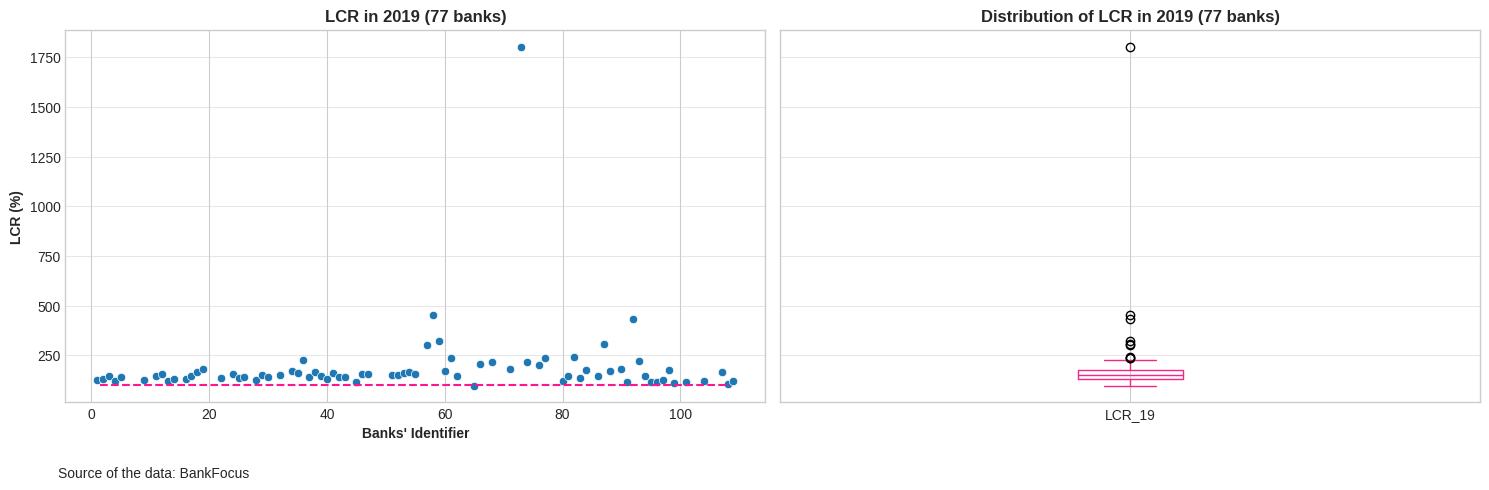

In [ ]:
line_plot_boxplot2(lcr_df_19_na, lcr_19, 2019)

For 2019 we see that we have 77 banks with LCR not missing.

In [ ]:
lcr_df_19_na_less=lcr_df_19_na[(lcr_df_19_na['LCR_19']<100)]
lcr_df_19_na_less.head()

Company Country  LCR_19
64  EUROBANK ERGASIAS SERVICES AND HOLDINGS SA  Greece    97.0

As in the case of the year 2018 we see that on the year 2019 there was a bank that did not comply with the 100% LCR ratio even though now the ratio is much closer to the 100% regulatory requirement and once again the bank domciled in Greece.

In [ ]:
lcr_df_19_na_countries=lcr_df_19_na['Country'].value_counts()
print(lcr_df_19_na_countries)

France         21
Germany        12
Spain          10
Italy           7
Netherlands     5
Belgium         5
Portugal        5
Ireland         4
Austria         3
Finland         2
Greece          2
Luxembourg      1
Name: Country, dtype: int64


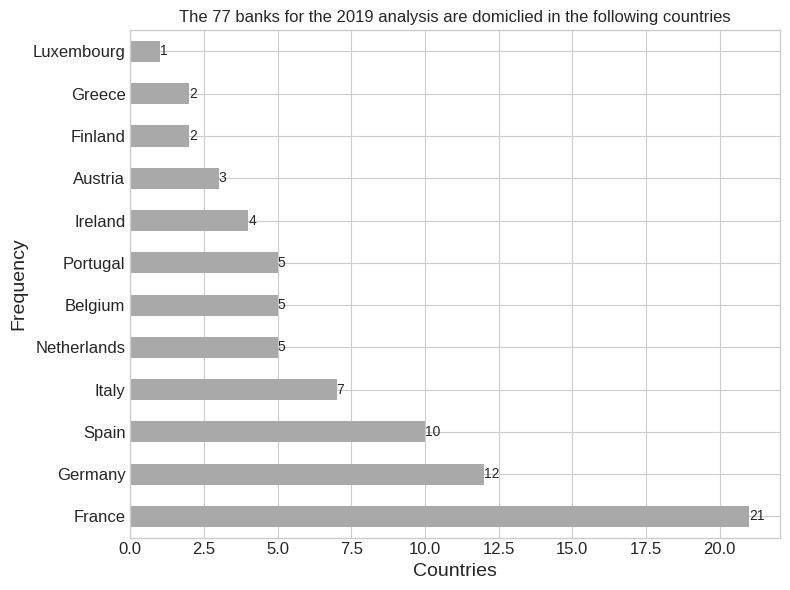

In [ ]:

%matplotlib inline
rcParams['figure.figsize'] = 8,6

bottom,top = plt.ylim(0,22)
plot_country_19=lcr_df_19_na_countries.plot(kind='barh', x='Country', color='darkgrey', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title('The 77 banks for the 2019 analysis are domiclied in the following countries')
plt.xlabel('Countries', fontsize=14)


for bars in plot_country_19.containers:
  plot_country_19.bar_label(bars)

In [ ]:
for x in ['LCR_19']:
    q75,q25 = np.percentile(lcr_df_19_na.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    lcr_df_19_na.loc[lcr_df_19_na[x] < min,x] = np.nan
    lcr_df_19_na.loc[lcr_df_19_na[x] > max,x] = np.nan

    lcr_df_19_na_outliers = lcr_df_19_na.dropna(axis = 'rows')

Considering that there seem to be a lot of outliers, we decided to remove them so as to be able to make some year to year comparison woithout the intervention of the outliers. We see that without outliers we have 68 banks.

In [ ]:
lcr_df_19_na_outliers.shape

(68, 3)

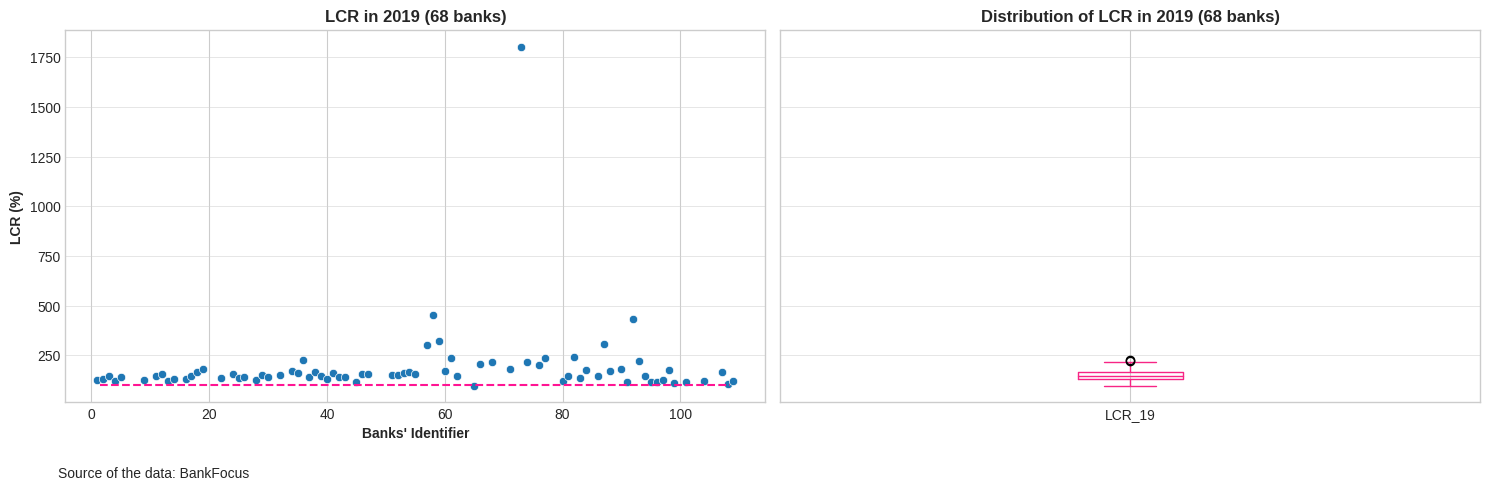

In [ ]:
line_plot_boxplot2(lcr_df_19_na_outliers, lcr_19, 2019)

Text(0.5, 1.0, '2019 variation in LCR(%) 68 banks')

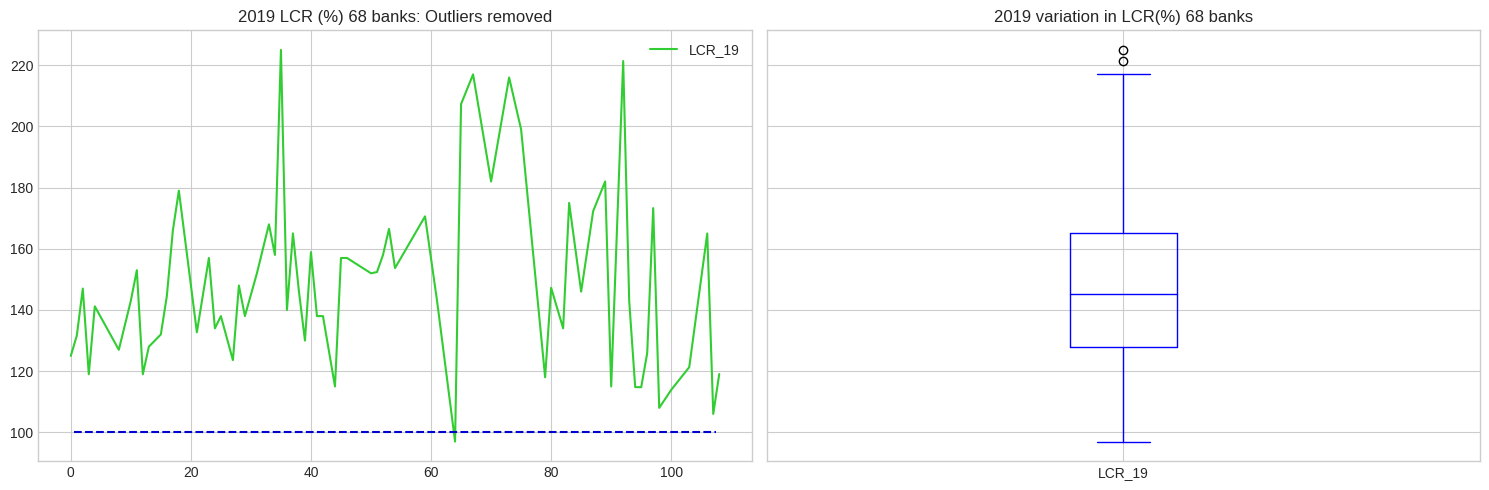

In [ ]:
rcParams['figure.figsize'] = 15,5

fix, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True) # Create the figure and axes object
%matplotlib inline


# Plot the first x and y axes:
lcr_df_19_na_outliers.plot(ax = ax1, fontsize=10, color='limegreen')
ax1.set_title('2019 LCR (%) 68 banks: Outliers removed')
ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "mediumblue", linewidth = 1.5, linestyle = 'dashed')

lcr_df_19_na_outliers.boxplot(ax = ax2, fontsize=10, color='blue')
ax2.set_title('2019 variation in LCR(%) 68 banks')

In [ ]:
lcr_2019_mean_NoO=lcr_df_19_na_outliers['LCR_19'].mean()
print(lcr_2019_mean_NoO)

148.6050294117647


In [ ]:
 statistics.stdev(lcr_df_19_na_outliers['LCR_19'])

28.65774905595947

Even though at first sight this graph seems to show more variability, we see that the scale has changed a lot and we see that most of the banks within our sample have a ratio between 120% LcR and 180% and the mean value is 148.605029% and the standard deviation is 28.65774905595947.

### **2020**

In [ ]:
lcr_20 = data_object[['Company', 'Country', 'LCR_20']]
lcr_df_20_na = lcr_20.dropna(axis = 'rows')
lcr_df_20_na.shape

(85, 3)

For the year 2020 we see 85 banks with no LCR ratio missing. The situation wit the outliers is similar therefore we decided to use the same process as we did for 2019 and to remove the outleirs. Moreover, it seems that there is not bank that does not satify the minimum regulatory value for LCR, however we will have a better image when removing the outliers and decreasing the scale.

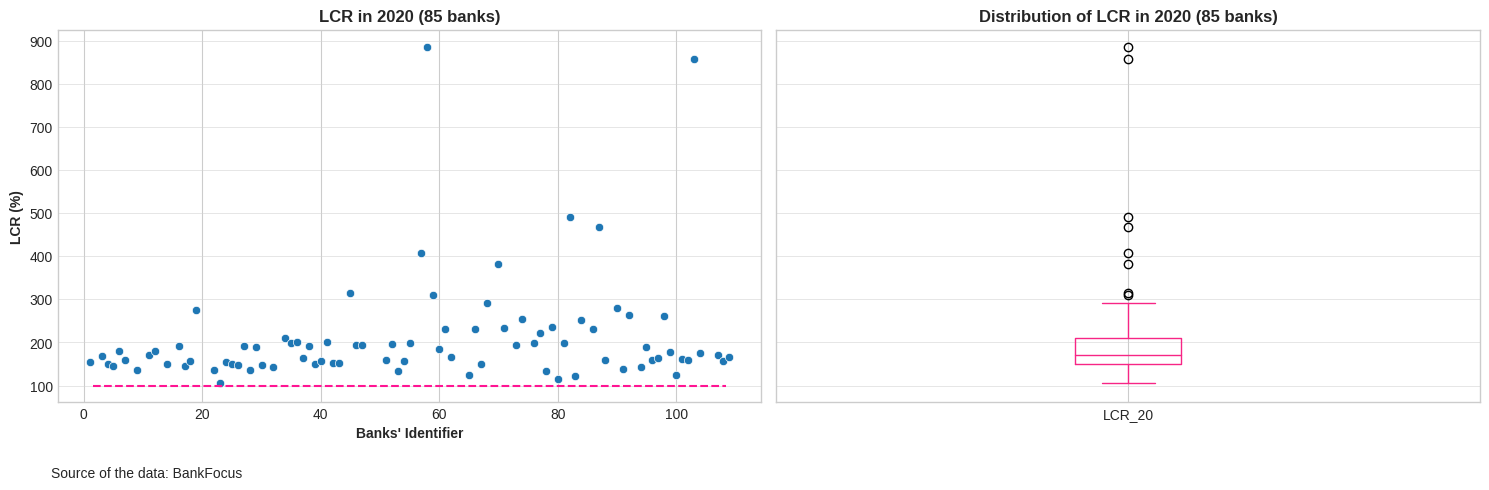

In [ ]:
line_plot_boxplot2(lcr_df_20_na, lcr_20, 2020)

Text(0.5, 1.0, '2020 variation in LCR(%) 85 banks')

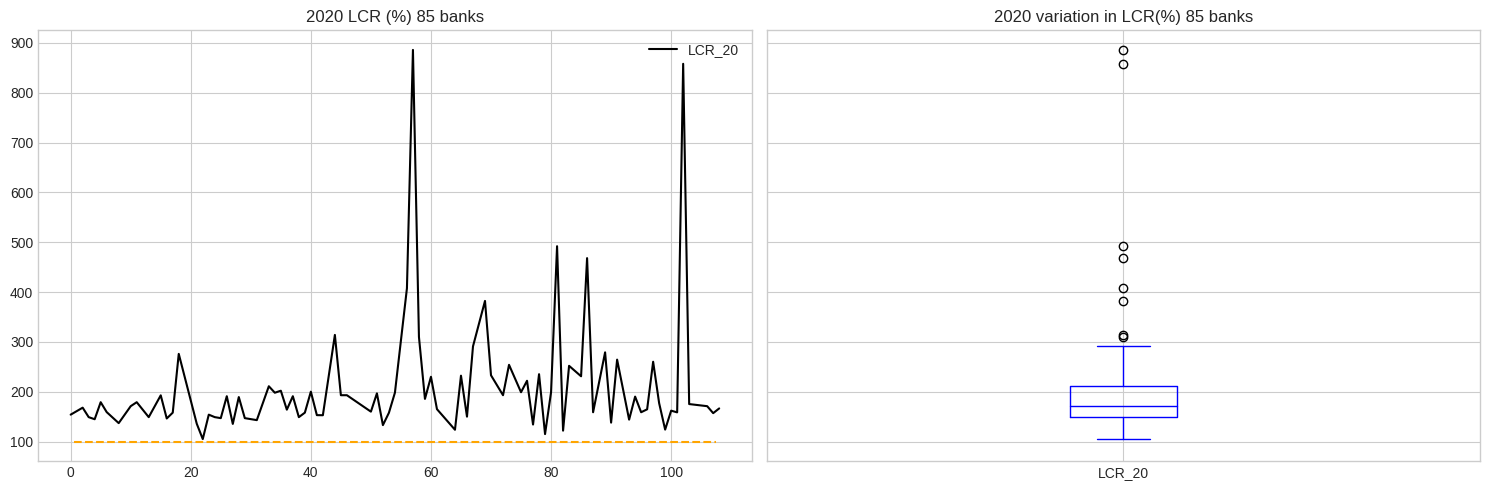

In [ ]:
rcParams['figure.figsize'] = 15,5

fix, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True) # Create the figure and axes object
%matplotlib inline


# Plot the first x and y axes:
lcr_df_20_na.plot(ax = ax1, fontsize=10, color='black')
ax1.set_title('2020 LCR (%) 85 banks')
ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "orange", linewidth = 1.5, linestyle = 'dashed')

lcr_df_20_na.boxplot(ax = ax2, fontsize=10, color='blue')
ax2.set_title('2020 variation in LCR(%) 85 banks')

In [ ]:
lcr_df_20_na_countries=lcr_df_20_na['Country'].value_counts()
print(lcr_df_20_na_countries)

France         23
Spain          11
Germany        11
Italy          11
Belgium         6
Netherlands     5
Portugal        5
Ireland         4
Austria         3
Greece          3
Finland         2
Luxembourg      1
Name: Country, dtype: int64


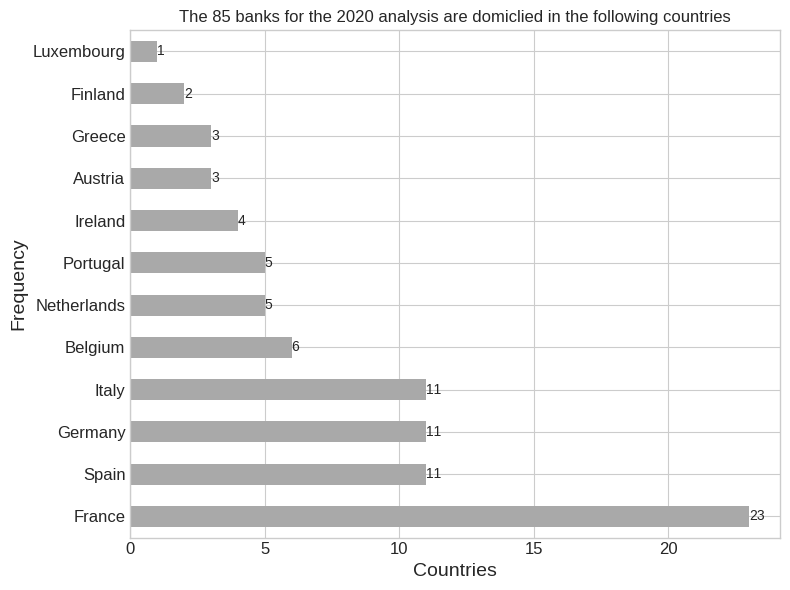

In [ ]:

%matplotlib inline
rcParams['figure.figsize'] = 8,6

bottom,top = plt.ylim(0,22)
plot_country_20=lcr_df_20_na_countries.plot(kind='barh', x='Country', color='darkgrey', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title('The 85 banks for the 2020 analysis are domiclied in the following countries')
plt.xlabel('Countries', fontsize=14)


for bars in plot_country_20.containers:
    plot_country_20.bar_label(bars)

In [ ]:
for x in ['LCR_20']:
    q75,q25 = np.percentile(lcr_df_20_na.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    lcr_df_20_na.loc[lcr_df_20_na[x] < min,x] = np.nan
    lcr_df_20_na.loc[lcr_df_20_na[x] > max,x] = np.nan

    lcr_df_20_na_outliers = lcr_df_20_na.dropna(axis = 'rows')

    lcr_df_20_na_outliers = lcr_df_20_na.dropna(axis = 'rows')

After removing the outliers we see that the elemnets (banks within the sample) go from 85 to 77.

In [ ]:
lcr_df_20_na_outliers.shape

(77, 3)

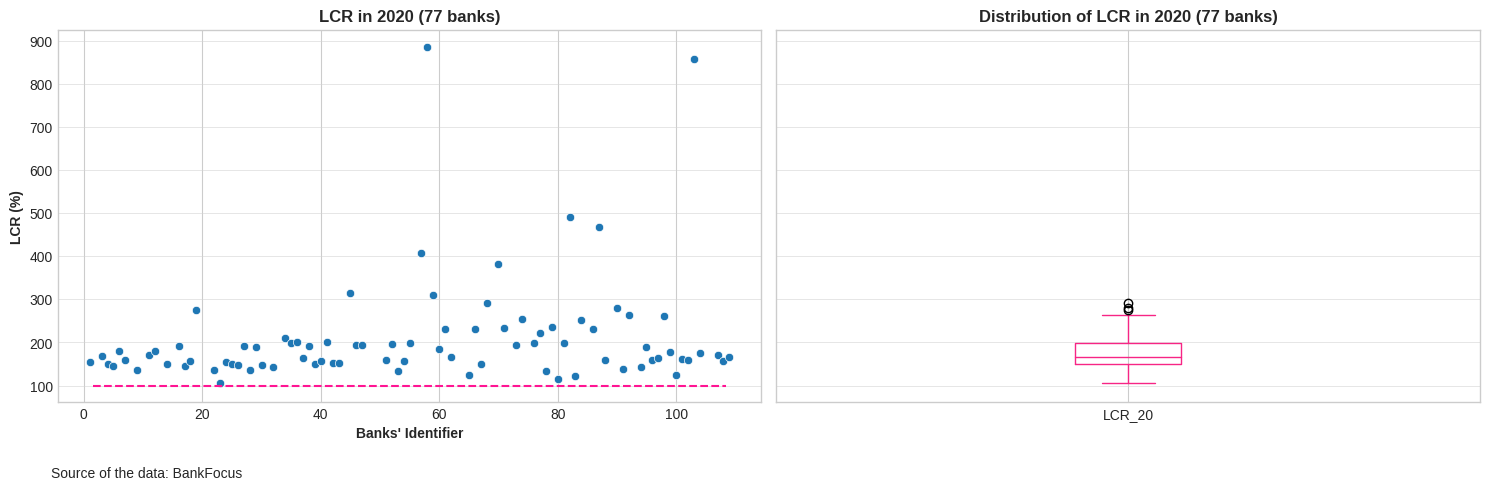

In [ ]:
line_plot_boxplot2(lcr_df_20_na_outliers, lcr_20, 2020)

Text(0.5, 1.0, '2020 variation in LCR(%) 77 banks')

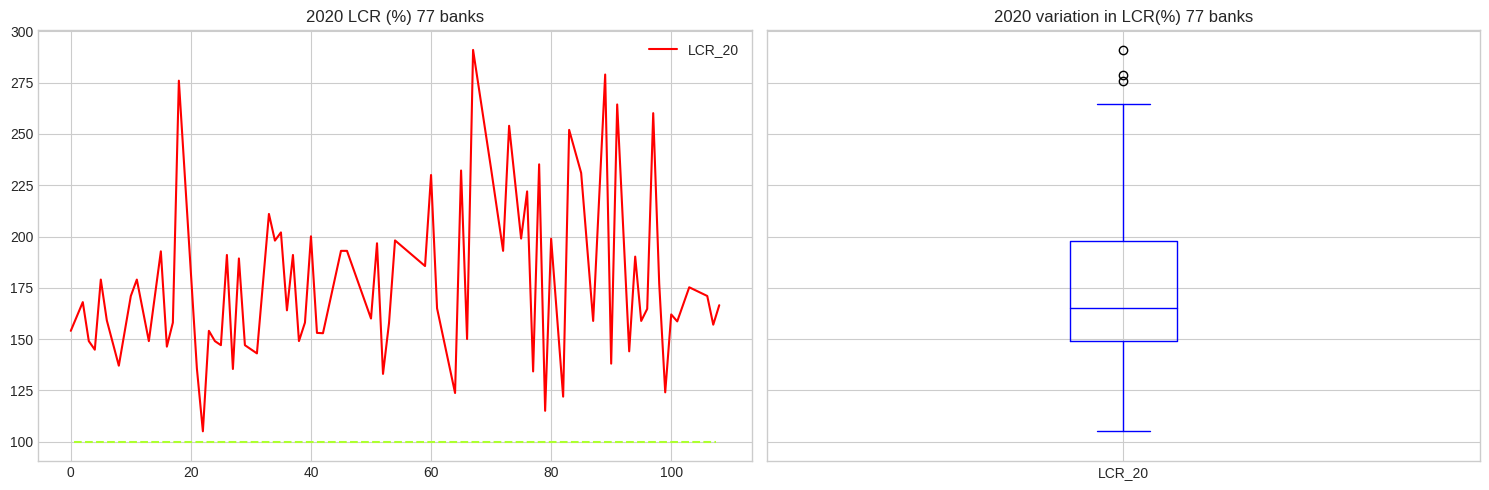

In [ ]:
rcParams['figure.figsize'] = 15,5

fix, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True) # Create the figure and axes object
%matplotlib inline


# Plot the first x and y axes:
lcr_df_20_na_outliers.plot(ax = ax1, fontsize=10, color='red')
ax1.set_title('2020 LCR (%) 77 banks')
ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "greenyellow", linewidth = 1.5, linestyle = 'dashed')

lcr_df_20_na_outliers.boxplot(ax = ax2, fontsize=10, color='blue')
ax2.set_title('2020 variation in LCR(%) 77 banks')

In [ ]:
lcr_df_20_na_outliers['LCR_20'].mean()

177.74103896103898

In [ ]:
 statistics.stdev(lcr_df_20_na_outliers['LCR_20'])

40.90452814286662

Again we see that the variation has decreased a lot after the removal of the outliers and by looking at this graph (since the scale has decreased) we see that in the sample for 2020 there seems to be no bank that has not satisfied the minimum value for the LCR ratio and the mean has increased to 177.741039% but also the standard deviation has increased to 40.90452814286662.


### **2021**

**For the year 2021 we see 85 banks with LCR not missing within our sample. **

In [ ]:
lcr_21 = data_object[['Company', 'Country', 'LCR_21']]
lcr_df_21_na = lcr_21.dropna(axis = 'rows')
lcr_df_21_na.shape

(85, 3)

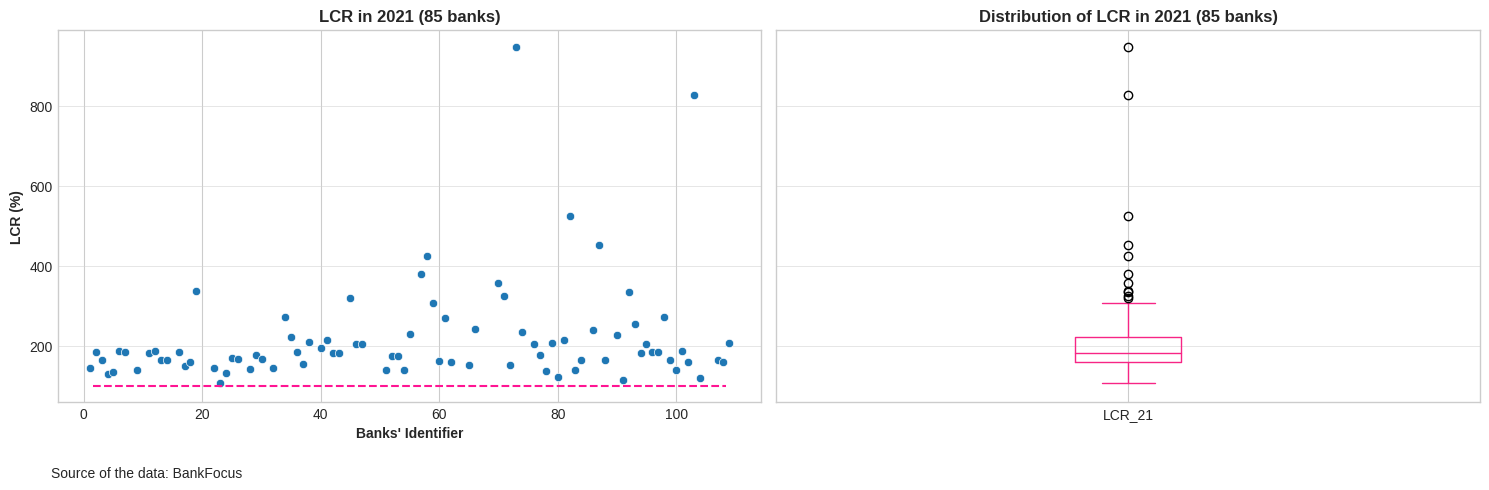

In [ ]:
line_plot_boxplot2(lcr_df_21_na, lcr_21, 2021)

Text(0.5, 1.0, '2021 variation in LCR(%) 85 banks')

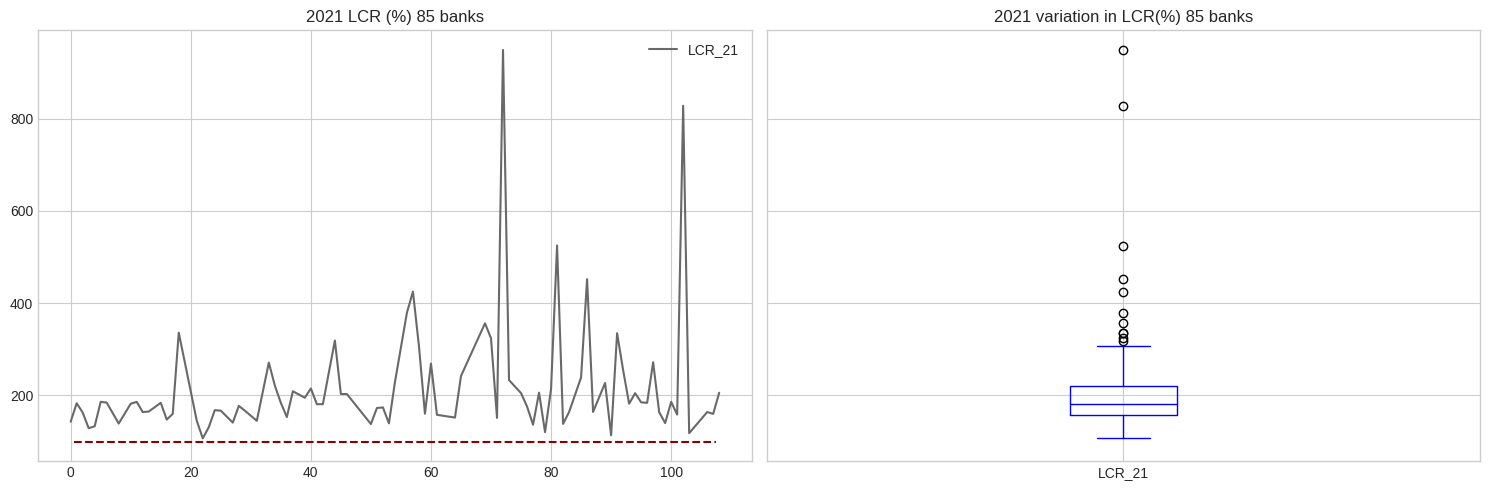

In [ ]:
rcParams['figure.figsize'] = 15,5

fix, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True) # Create the figure and axes object
%matplotlib inline


# Plot the first x and y axes:
lcr_df_21_na.plot(ax = ax1, fontsize=10, color='dimgrey')
ax1.set_title('2021 LCR (%) 85 banks')
ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "darkred", linewidth = 1.5, linestyle = 'dashed')

lcr_df_21_na.boxplot(ax = ax2, fontsize=10, color='blue')
ax2.set_title('2021 variation in LCR(%) 85 banks')

France         25
Germany        12
Italy          11
Spain          10
Netherlands     5
Belgium         5
Portugal        5
Ireland         4
Austria         3
Finland         2
Greece          2
Luxembourg      1
Name: Country, dtype: int64


[Text(0, 0, '25'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

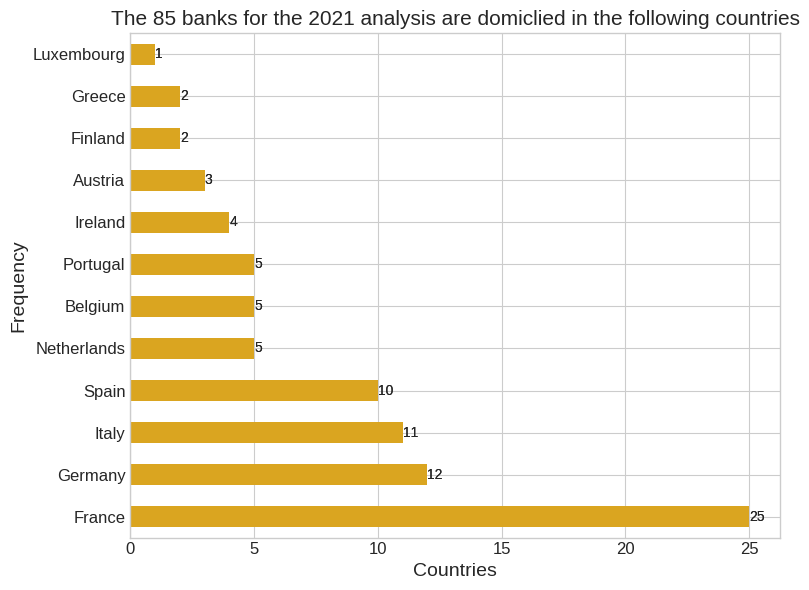

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 8,6

lcr_df_21_na_country=lcr_df_21_na['Country'].value_counts()
print(lcr_df_21_na_country)

bottom,top = plt.ylim(0,19)
plt.rcParams["figure.autolayout"] = True
plot_country_21=lcr_df_21_na_country.plot(kind='barh', x='Country', color='goldenrod', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title('The 85 banks for the 2021 analysis are domiclied in the following countries', fontsize=15)
plt.xlabel('Countries', fontsize=14)


for bars in plot_country_21.containers:
    plot_country_21.bar_label(bars)


plot_country_21.bar_label(bars)

In [ ]:
for x in ['LCR_21']:
    q75,q25 = np.percentile(lcr_df_21_na.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    lcr_df_21_na.loc[lcr_df_21_na[x] < min,x] = np.nan
    lcr_df_21_na.loc[lcr_df_21_na[x] > max,x] = np.nan

    lcr_df_21_na_outliers = lcr_df_21_na.dropna(axis = 'rows')

    lcr_df_21_na_outliers = lcr_df_21_na.dropna(axis = 'rows')

    lcr_df_21_na_outliers = lcr_df_21_na.dropna(axis = 'rows')

In [ ]:
lcr_df_21_na_outliers.shape

(74, 3)

Text(0.5, 1.0, '2021 variation in LCR(%) 74 banks')

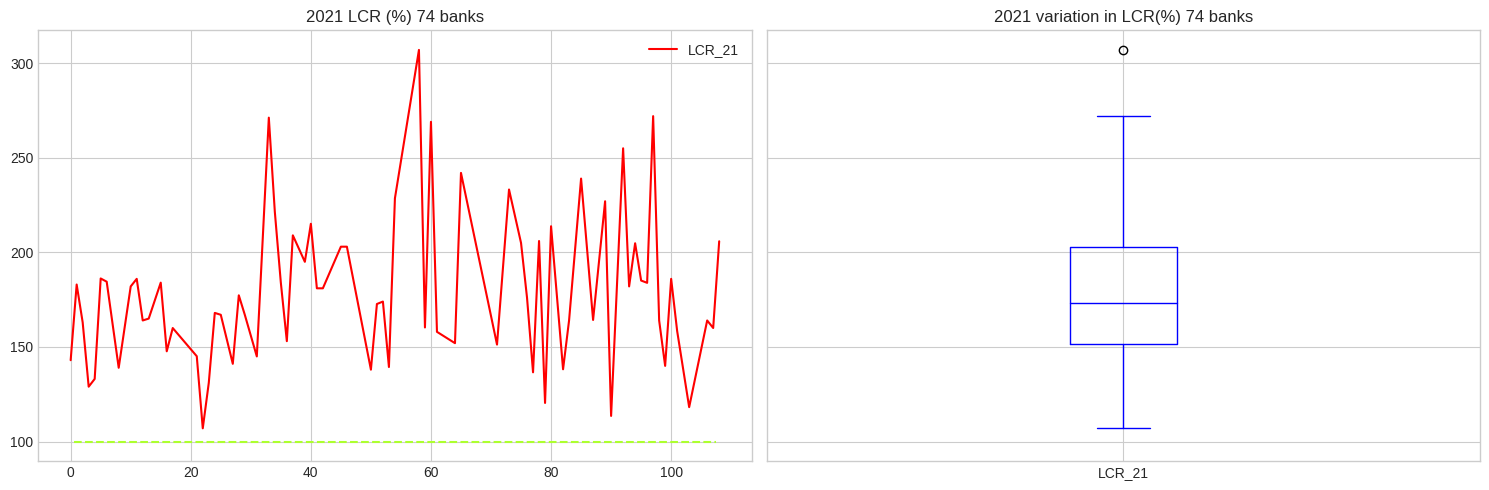

In [ ]:
rcParams['figure.figsize'] = 15,5

fix, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True) # Create the figure and axes object
%matplotlib inline


# Plot the first x and y axes:
lcr_df_21_na_outliers.plot(ax = ax1, fontsize=10, color='red')
ax1.set_title('2021 LCR (%) 74 banks')
ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "greenyellow", linewidth = 1.5, linestyle = 'dashed')

lcr_df_21_na_outliers.boxplot(ax = ax2, fontsize=10, color='blue')
ax2.set_title('2021 variation in LCR(%) 74 banks')

In [ ]:
lcr_df_21_na_outliers['LCR_21'].mean()

178.69351351351352

In [ ]:
 statistics.stdev(lcr_df_21_na_outliers['LCR_21'])

40.195530673400164

Similar to 2020 we see that that there seems to be no bank that does not satisfy the regularoty min for the LCR ratio in our sample for 2021. Additionally we see that the mean and the stadard deviation for the elemnts of the sample that are not considered extreme outliers is almost the same as the one for 2020.


### **2022**

For 2022 we see that the banks with no missing LCR ratio within the sample are 87.

In [ ]:
lcr_22 = data_object[['Company', 'Country', 'LCR_22']]
lcr_df_22_na = lcr_22.dropna(axis = 'rows')
lcr_df_22_na.shape

(87, 3)

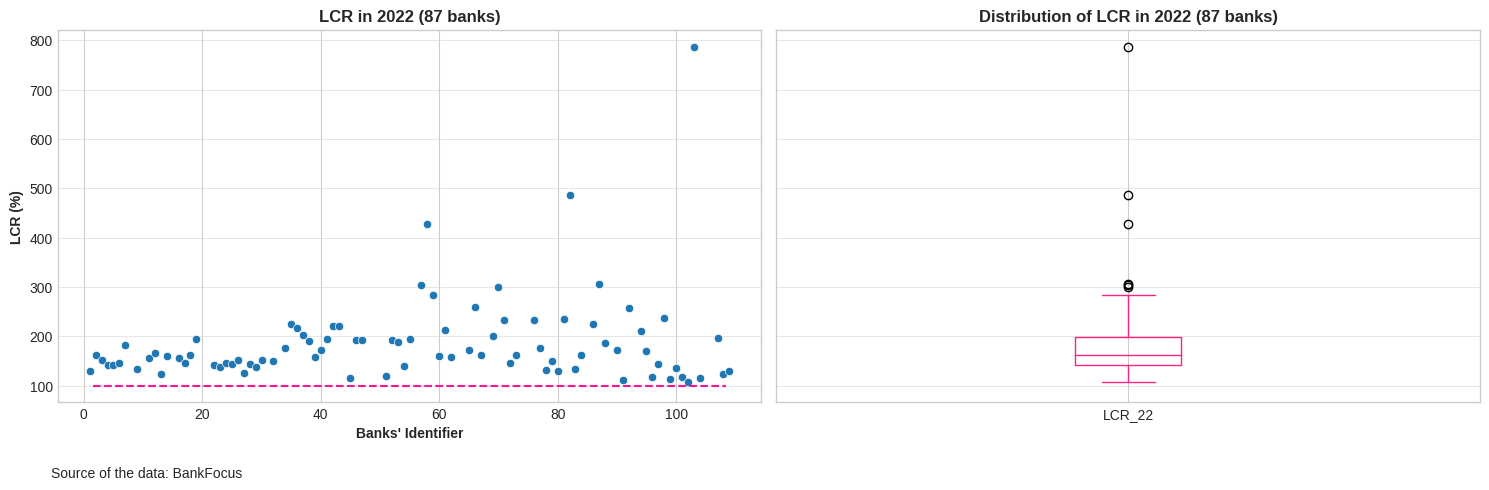

In [ ]:
line_plot_boxplot2(lcr_df_22_na, lcr_22, 2022)

Text(0.5, 1.0, '2022 variation in LCR(%) 87 banks')

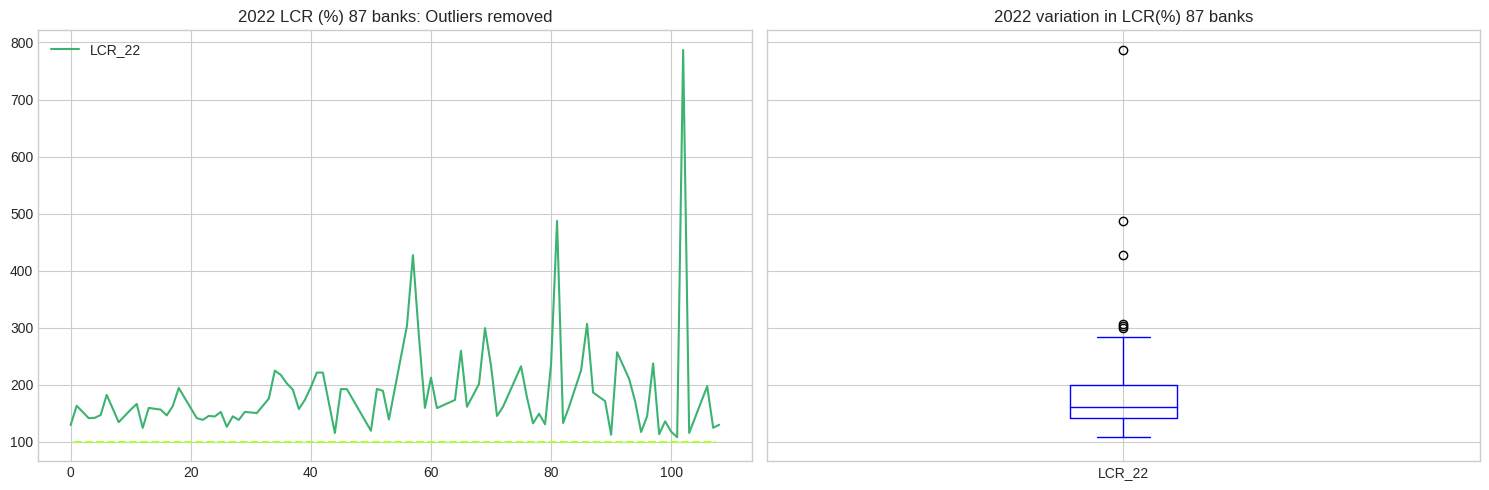

In [ ]:
rcParams['figure.figsize'] = 15,5

fix, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True) # Create the figure and axes object
%matplotlib inline


# Plot the first x and y axes:
lcr_df_22_na.plot(ax = ax1, fontsize=10, color='mediumseagreen')
ax1.set_title('2022 LCR (%) 87 banks: Outliers removed')
ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "greenyellow", linewidth = 1.5, linestyle = 'dashed')

lcr_df_22_na.boxplot(ax = ax2, fontsize=10, color='blue')
ax2.set_title('2022 variation in LCR(%) 87 banks')

As for the previous years we remove the outliers to get a better view of the general value for the LCR for the banks within the sample.

In [ ]:
for x in ['LCR_22']:
    q75,q25 = np.percentile(lcr_df_22_na.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    lcr_df_22_na.loc[lcr_df_22_na[x] < min,x] = np.nan
    lcr_df_22_na.loc[lcr_df_22_na[x] > max,x] = np.nan

    lcr_df_22_na_outliers = lcr_df_22_na.dropna(axis = 'rows')

    lcr_df_22_na_outliers = lcr_df_22_na.dropna(axis = 'rows')

In [ ]:
lcr_df_22_na_outliers.shape

(81, 3)

We see that after the outlier removal, the banks become 81 and the variation (the scale) changes a lot as in the other cases.

Text(0.5, 1.0, '2022 variation in LCR(%) 81 banks')

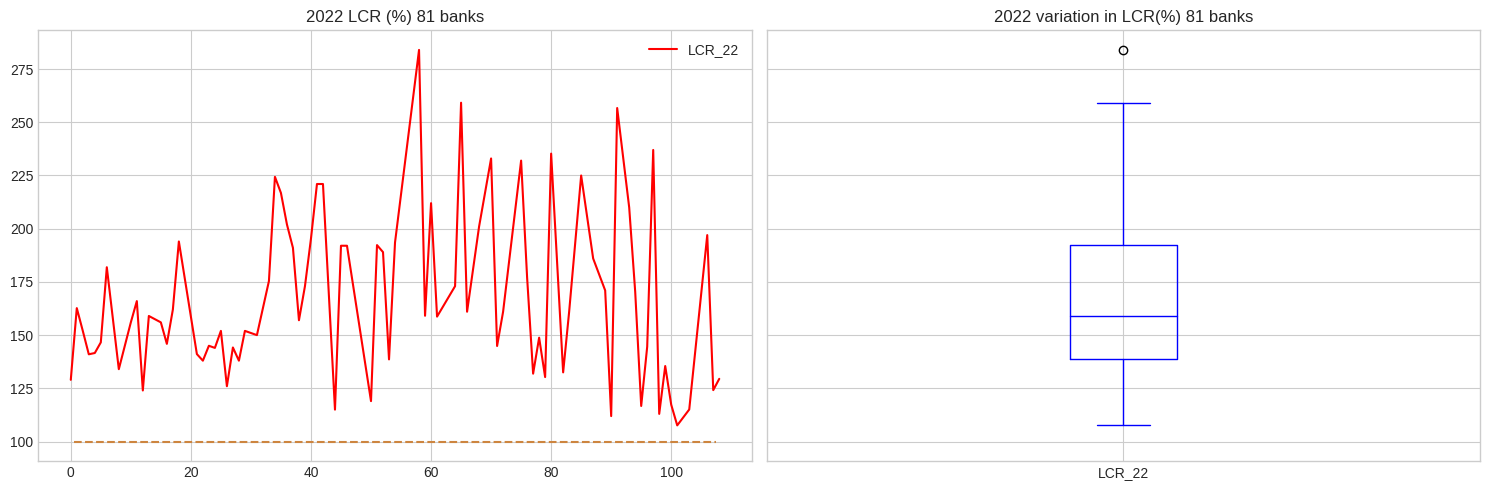

In [ ]:
rcParams['figure.figsize'] = 15,5

fix, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True) # Create the figure and axes object
%matplotlib inline


# Plot the first x and y axes:
lcr_df_22_na_outliers.plot(ax = ax1, fontsize=10, color='red')
ax1.set_title('2022 LCR (%) 81 banks')
ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "peru", linewidth = 1.5, linestyle = 'dashed')

lcr_df_22_na_outliers.boxplot(ax = ax2, fontsize=10, color='blue')
ax2.set_title('2022 variation in LCR(%) 81 banks')

In [ ]:
 statistics.stdev(lcr_df_22_na_outliers['LCR_22'])

39.15136633516759

In [ ]:
lcr_df_22_na_outliers['LCR_22'].mean()

167.3391975308642

Similar to the previous years, we see no banks that do not satisy the regulatory min for the LCR ratio and we see a slight decerase in the mean value and even a slighter decrease in the standard deviation. Nevertheless the behaviour is similar to the years before 2022.

## *2.3. COUNTRY*

Let's consider the average of Liquidity Coverage Ratio across **countries** in the Euro - Area, where companies are domiciled.

In [ ]:
# create the dataset with LCR by country
lcr_by_country = lcr_only_df.groupby(by = lcr_df['Country']).mean()
lcr_by_country = lcr_by_country.iloc[:, ::1]
lcr_by_country = lcr_by_country.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
lcr_by_country

2018        2019        2020        2021        2022
Country                                                                
Austria      154.366667  144.666667  194.766667  189.786667  188.333333
Belgium      157.070000  163.262000  166.564000  173.854000  168.000000
Finland      181.000000  298.100000  211.200000  247.450000  209.350000
France       179.046667  269.740000  236.041333  253.850667  181.446667
Germany      153.836000  161.922000  176.860000  171.290000  163.070000
Greece       198.300000  207.300000  232.200000  242.000000  259.200000
Ireland      132.000000  147.500000  172.957500  192.000000  206.500000
Italy        167.621667  165.555000  200.633333  187.300000  188.383333
Luxembourg   115.000000  118.000000  115.000000  120.400000  130.300000
Netherlands  152.500000  149.750000  173.942500  205.250000  178.000000
Portugal     173.720000  197.460000  232.740000  248.140000  218.900000
Spain        222.140000  198.824286  252.458571  267.577143  216.202857

In [ ]:
lcr_100 = lcr[(lcr['LCR_18'] > 100) | (lcr['LCR_19'] > 100) | (lcr['LCR_20'] > 100) | (lcr['LCR_21'] > 100) | (lcr['LCR_22'] > 100)]

# drop rows with NaN
lcr100_df = lcr_100.dropna(axis = 'rows')

lcr100_df.shape

(63, 12)

In [ ]:
lcr100_df.value_counts('Country')

Country
France         15
Germany        10
Spain           7
Italy           6
Belgium         5
Portugal        5
Ireland         4
Netherlands     4
Austria         3
Finland         2
Greece          1
Luxembourg      1
dtype: int64

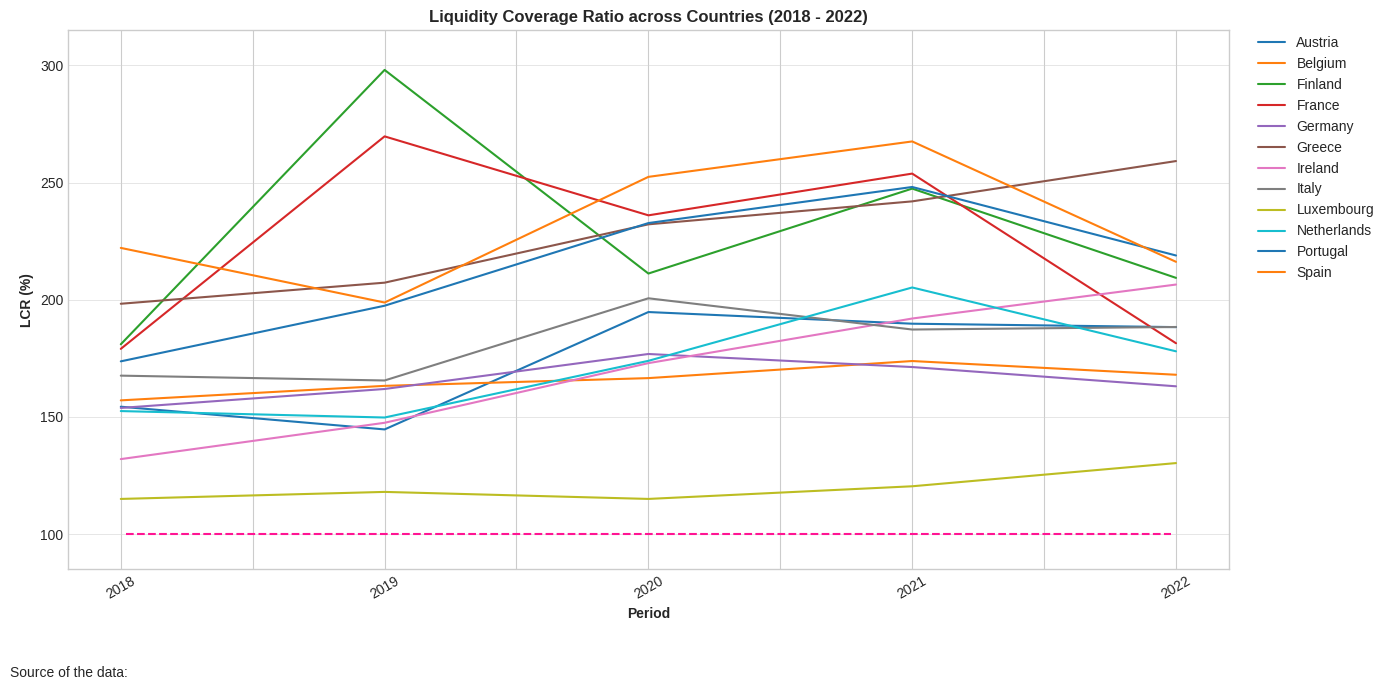

In [ ]:
# COUNTRY
pl = lcr_by_country.T.plot(rot = 30, figsize = (14, 7))
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Liquidity Coverage Ratio across Countries (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.ylim(85, 315)
pl.text(-0.05, -0.2, 'Source of the data: ', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

<ipython-input-145-cc026b31cb2e>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'LCR: Country analysis of the sample')

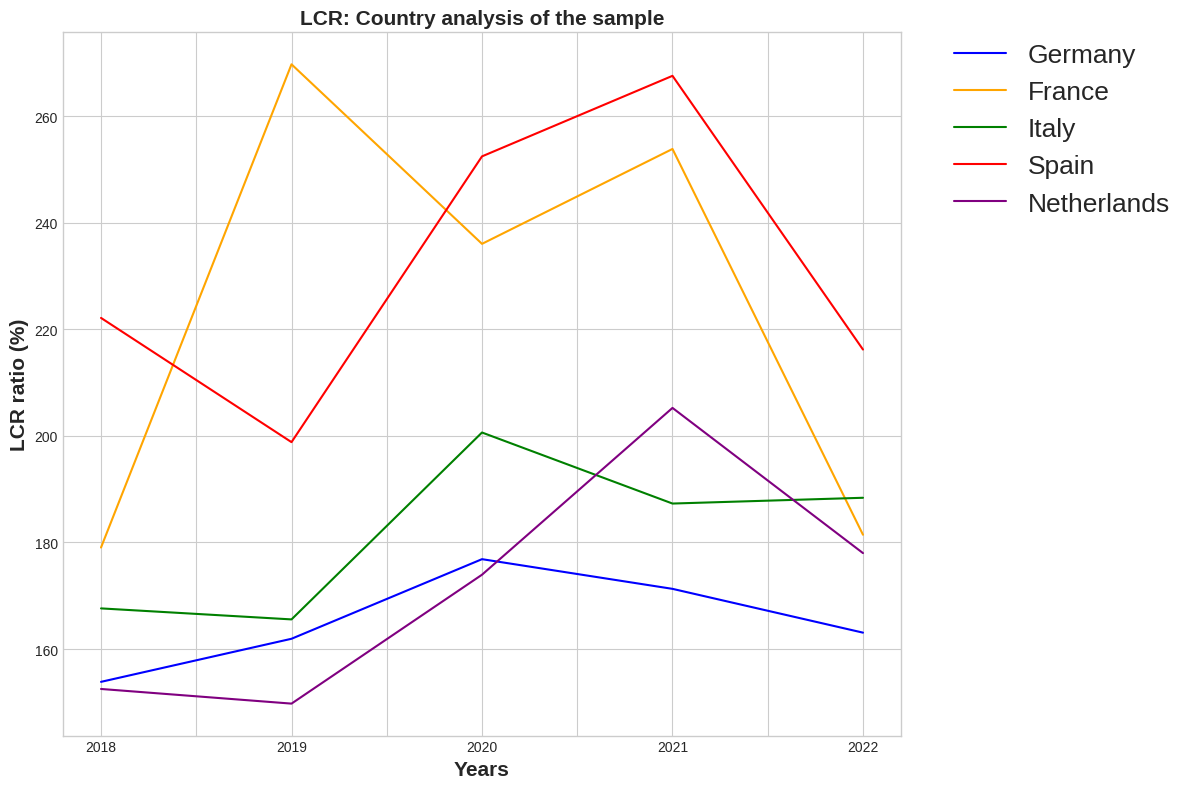

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8


pl_2=lcr_by_country[lcr_by_country.index=='Germany']
pl_3=lcr_by_country[lcr_by_country.index=='France']
pl_4=lcr_by_country[lcr_by_country.index=='Italy']
pl_5=lcr_by_country[lcr_by_country.index=='Spain']
pl_6=lcr_by_country[lcr_by_country.index=='Netherlands']

plt.style.use('seaborn-whitegrid')

fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl_2.mean().plot(ax = ax, label='Germany', color=['blue'])
pl_3.mean().plot(ax = ax, label='France', color=['orange'])
pl_4.mean().plot(ax = ax, label='Italy', color=['green'])
pl_5.mean().plot(ax = ax, label='Spain', color=['red'])
pl_6.mean().plot(ax = ax, label='Netherlands', color=['purple'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=19)
ax.set_xlabel('Years', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('LCR ratio (%)' , fontweight = 'bold', fontsize = 15)
ax.set_title('LCR: Country analysis of the sample', fontweight = 'bold', fontsize = 15)

Inspecting the graph by considering only the *12* countries in which banks show the available data for the entire period, we can infer that all the *63* observations of the sample satisfy the requirement **LCR > 100%**.

With the objective of evaluating the situaution from a micro point of view, we separate each country into a graph:

In [ ]:
lcr_only_df.value_counts

<bound method DataFrame.value_counts of       2018    2019   2020    2021    2022
0    132.0  125.00  154.0  143.00  129.00
1    133.0  131.60    NaN  183.00  162.70
2    158.0  147.00  168.0  163.00  152.00
3    129.0  119.00  149.0  129.00  141.00
4    140.4  141.20  144.8  133.10  141.60
..     ...     ...    ...     ...     ...
104    NaN     NaN    NaN     NaN     NaN
105    NaN     NaN    NaN     NaN     NaN
106  225.0  165.00  171.0  164.00  197.00
107  102.1  106.03  157.0  160.02  124.16
108  124.2  119.07  166.5  205.86  129.47

[109 rows x 5 columns]>

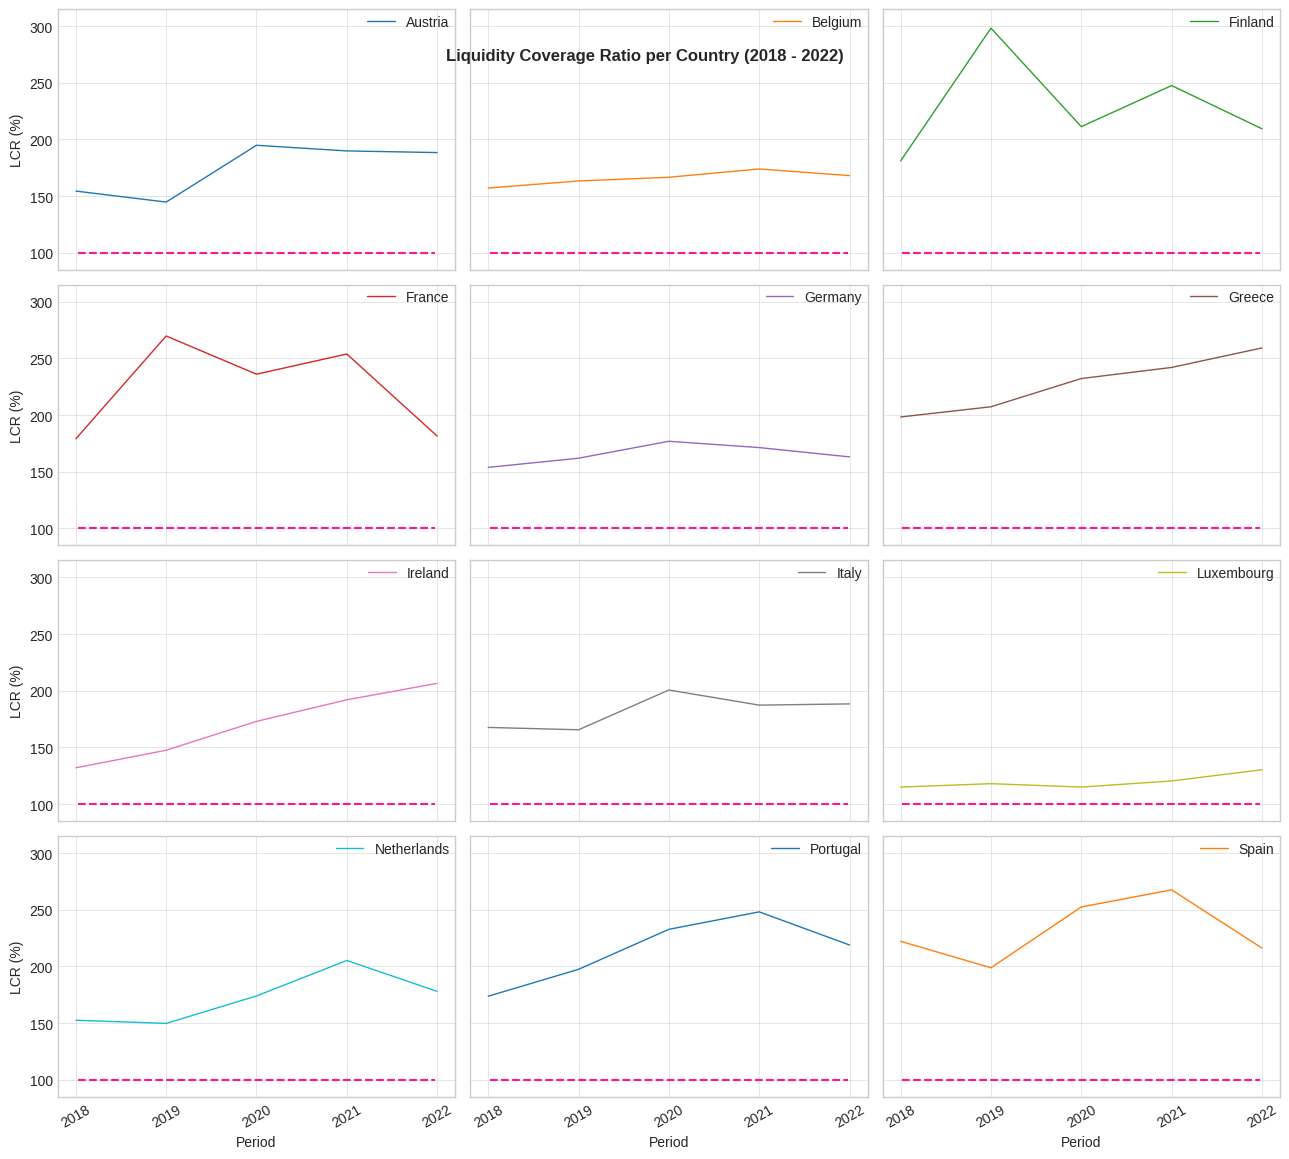

In [ ]:
# EACH COUNTRY
lcr_by_country.T.plot(subplots = True, layout = (4, 3), figsize = (13, 12), sharey = True,
                    rot = 30,  ylabel = 'LCR (%)', xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle('Liquidity Coverage Ratio per Country (2018 - 2022)', fontsize = 12, fontweight = 'bold', y = 0.93)

for ax in plt.gcf().axes:
    ax.legend(loc = 'best', borderaxespad = 0)
    ax.grid(color = 'lightgrey', linewidth = 0.4)
    ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
    plt.ylim(85, 315)

## *2.4. SOMETHING WITH OUTLIERS*

In [ ]:
list_lcr = ['LCR_18', 'LCR_19','LCR_20', 'LCR_21', 'LCR_22']
for i in list_lcr:
  z = np.abs(stats.zscore(lcr_df[i]))
  missing = z[z > 3]
  missing = missing.reset_index()
  print(i + ' outliers: ')
  for j in missing.loc[:, 'index']:
    print(lcr_df.loc[j, ['Company', 'Country']])
  print('\n')

LCR_18 outliers: 
Company    BPIFRANCE
Country       France
Name: 57, dtype: object
Company    UNICAJA BANCO SA
Country               Spain
Name: 58, dtype: object
Company      SFIL
Country    France
Name: 72, dtype: object


LCR_19 outliers: 
Company      SFIL
Country    France
Name: 72, dtype: object


LCR_20 outliers: 
Company    BPIFRANCE
Country       France
Name: 57, dtype: object


LCR_21 outliers: 
Company      SFIL
Country    France
Name: 72, dtype: object


LCR_22 outliers: 
Company    BPIFRANCE
Country       France
Name: 57, dtype: object
Company    RCI BANQUE SA
Country           France
Name: 81, dtype: object




Most of them (3/4) are french banks.

In [ ]:
sfil = data_object[data_object['Company'] == 'SFIL']
sfil = sfil[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
sfil = sfil.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

bpifrance = data_object[data_object['Company'] == 'BPIFRANCE']
bpifrance = bpifrance[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
bpifrance = bpifrance.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

rcibanquesa = data_object[data_object['Company'] == 'RCI BANQUE SA']
rcibanquesa = rcibanquesa[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
rcibanquesa = rcibanquesa.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

frames = [sfil, bpifrance, rcibanquesa]
union = pd.concat(frames)

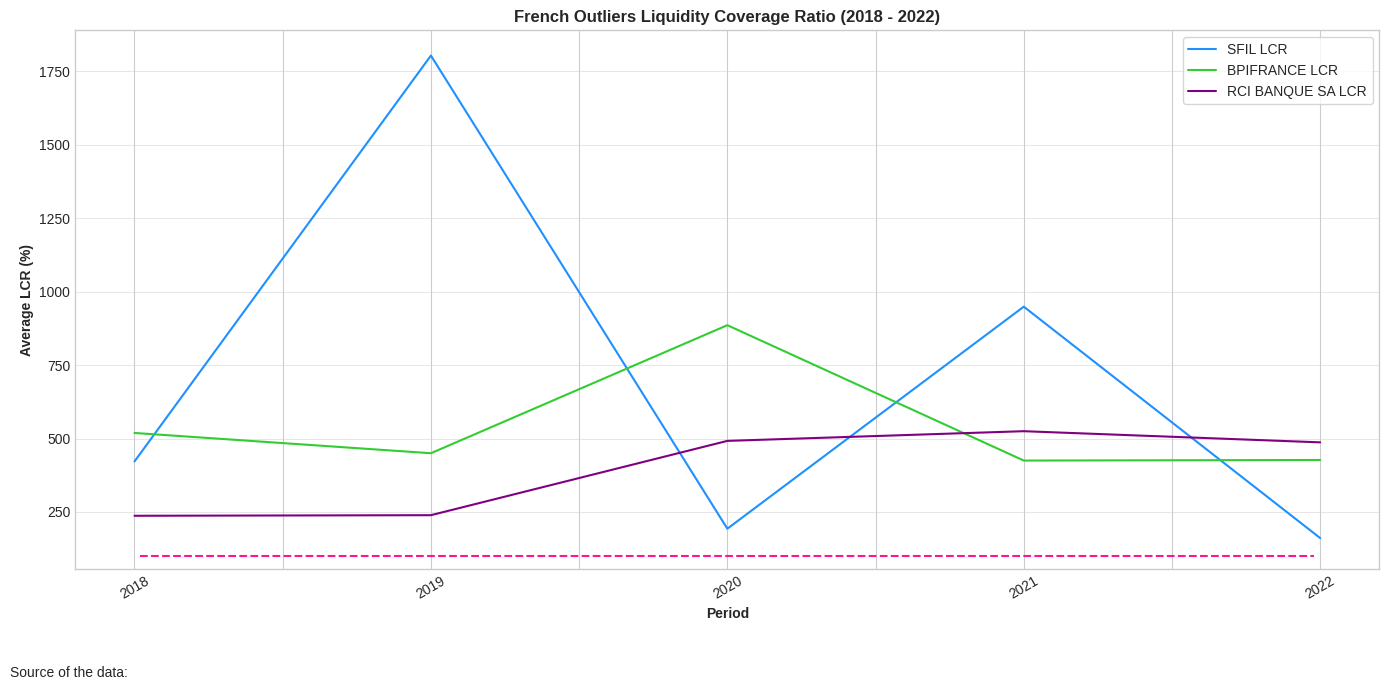

In [ ]:
pl = union.T.plot(color = ('dodgerblue', 'limegreen', 'purple'), rot = 30, figsize = (14, 7))
pl.set_title('French Outliers Liquidity Coverage Ratio (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
pl.set_ylabel('Average LCR (%)', fontweight = 'bold', fontsize = 10)
plt.ylim(55, 1890)
pl.legend(['SFIL LCR', 'BPIFRANCE LCR', 'RCI BANQUE SA LCR'], frameon = True, loc = 'upper right')
pl.text(-0.05, -0.2, 'Source of the data: ', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

### *A.* ***SFIL***

In [ ]:
sfil = data_object[data_object['Company'] == 'SFIL']
sfil = sfil[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
sfil = sfil.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

Text(0, 0.5, 'LCR (%)')

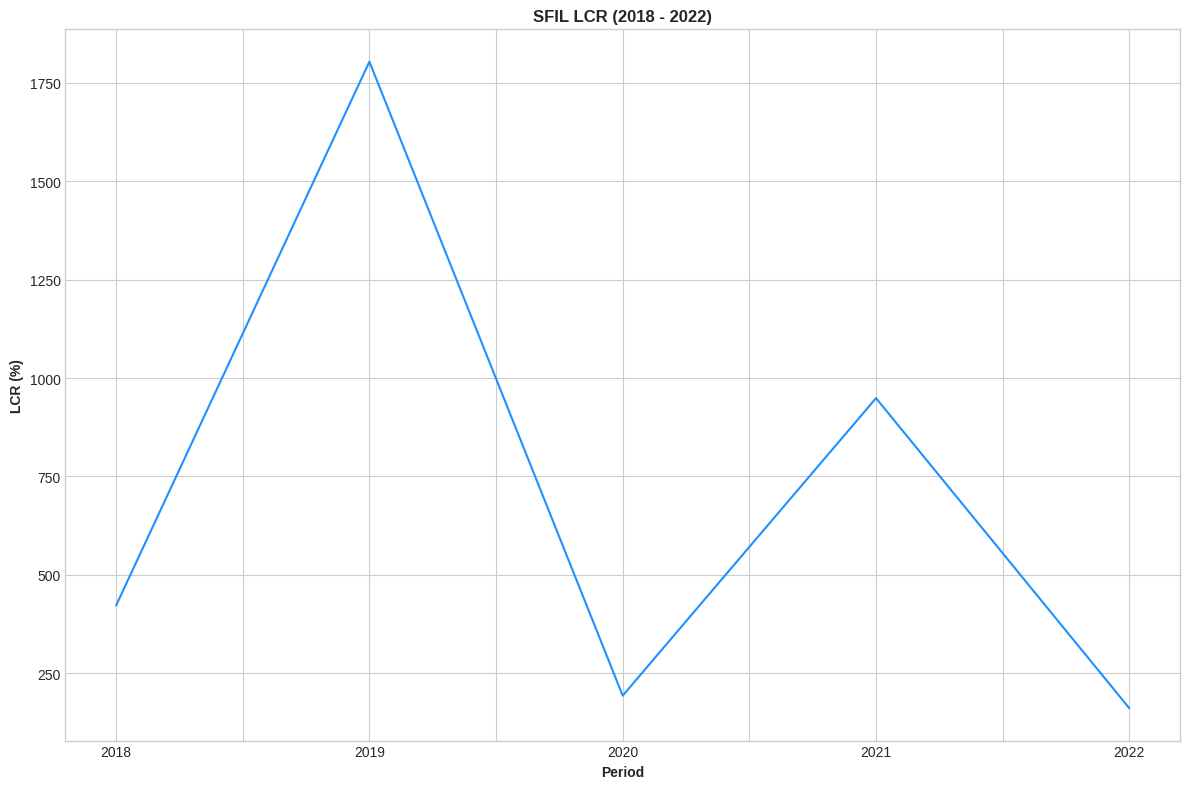

In [ ]:
pl = sfil.T.plot(color = 'dodgerblue', legend = None)
pl.set_title('SFIL LCR (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)

### *B.* ***BPIFRANCE***

In [ ]:
bpifrance = data_object[data_object['Company'] == 'BPIFRANCE']
bpifrance = bpifrance[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
bpifrance = bpifrance.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

Text(0, 0.5, 'LCR (%)')

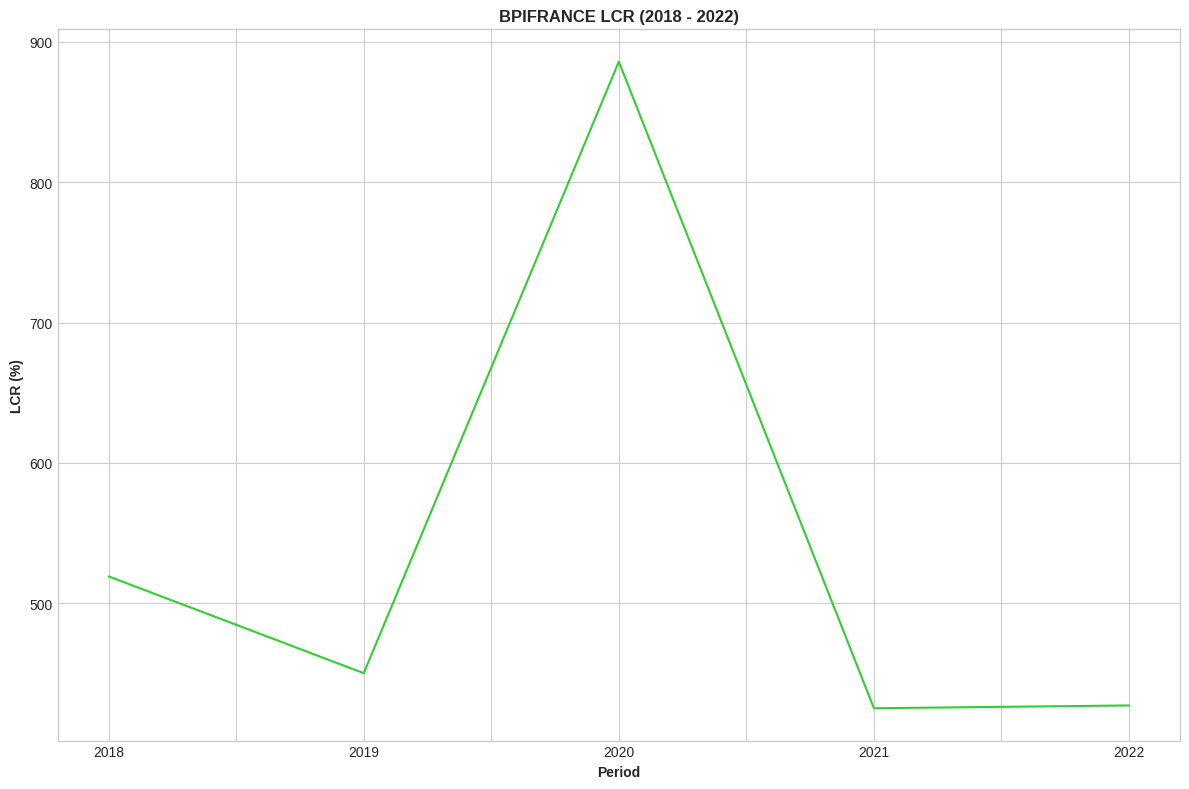

In [ ]:
pl = bpifrance.T.plot(color = 'limegreen', legend = None)
pl.set_title('BPIFRANCE LCR (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)

### *C.* ***RCI BANQUE SA***

In [ ]:
rcibanquesa = data_object[data_object['Company'] == 'RCI BANQUE SA']
rcibanquesa = rcibanquesa[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
rcibanquesa = rcibanquesa.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

Text(0, 0.5, 'LCR (%)')

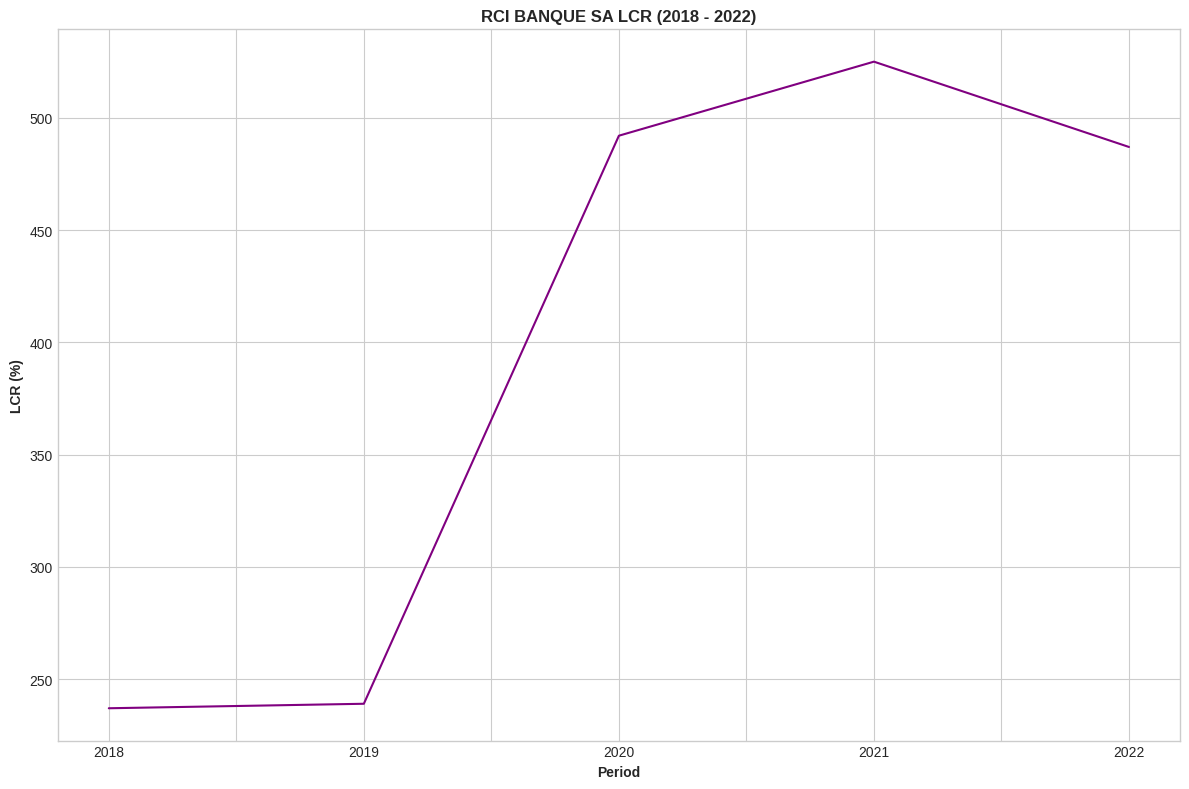

In [ ]:
pl = rcibanquesa.T.plot(color = 'purple', legend = None)
pl.set_title('RCI BANQUE SA LCR (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)

### *4.* ***UNICAJA BANCO SA***

In [ ]:
unicajabancosa = data_object[data_object['Company'] == 'UNICAJA BANCO SA']
unicajabancosa = unicajabancosa[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
unicajabancosa = unicajabancosa.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

Text(0, 0.5, 'LCR (%)')

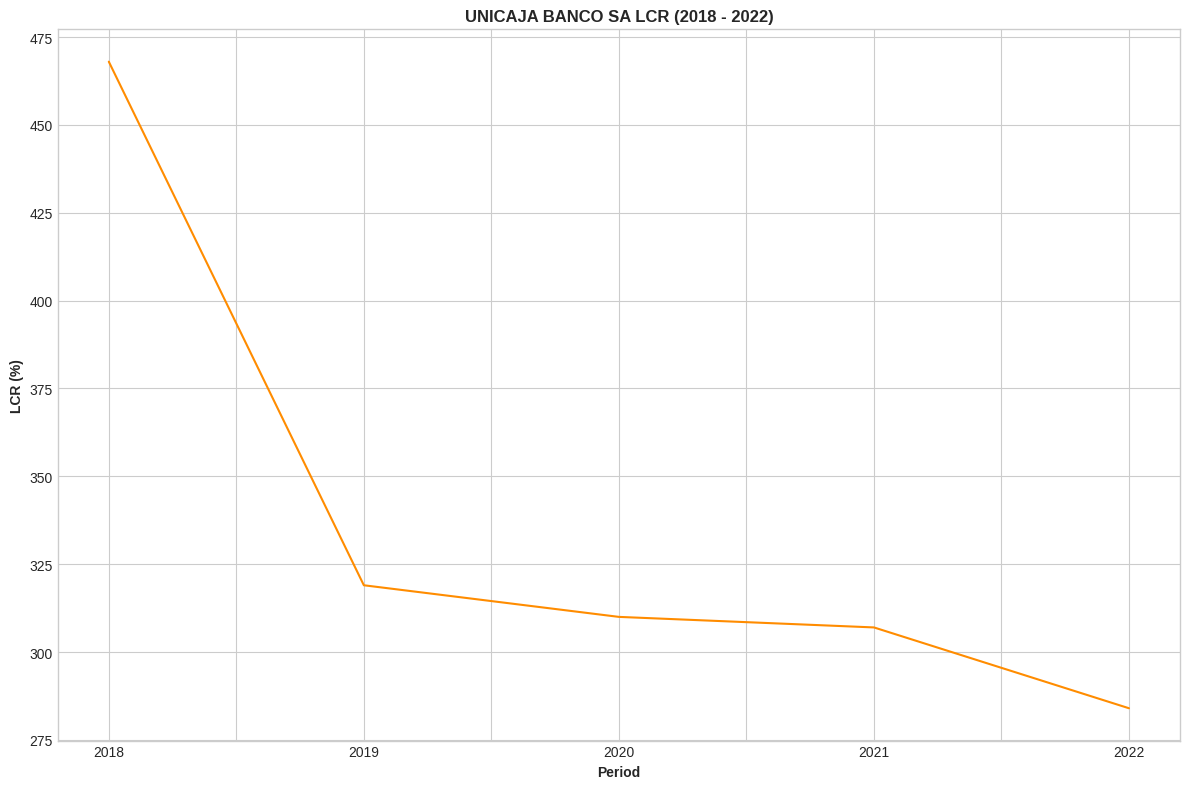

In [ ]:
pl = unicajabancosa.T.plot(color = 'darkorange', legend = None)
pl.set_title('UNICAJA BANCO SA LCR (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)

Let's see France LCR.

In [ ]:
france_lcr = lcr_df[['Company', 'Country', 'LCR_18','LCR_19','LCR_20','LCR_21','LCR_22']]
france_lcr = france_lcr[france_lcr.loc[:, 'Country'] == 'France']
france_lcr = france_lcr.loc[:, france_lcr.columns != 'Country']
france_lcr = france_lcr.groupby(by = france_lcr['Company']).mean()
france_lcr = france_lcr.iloc[:, ::1]
france_lcr = france_lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

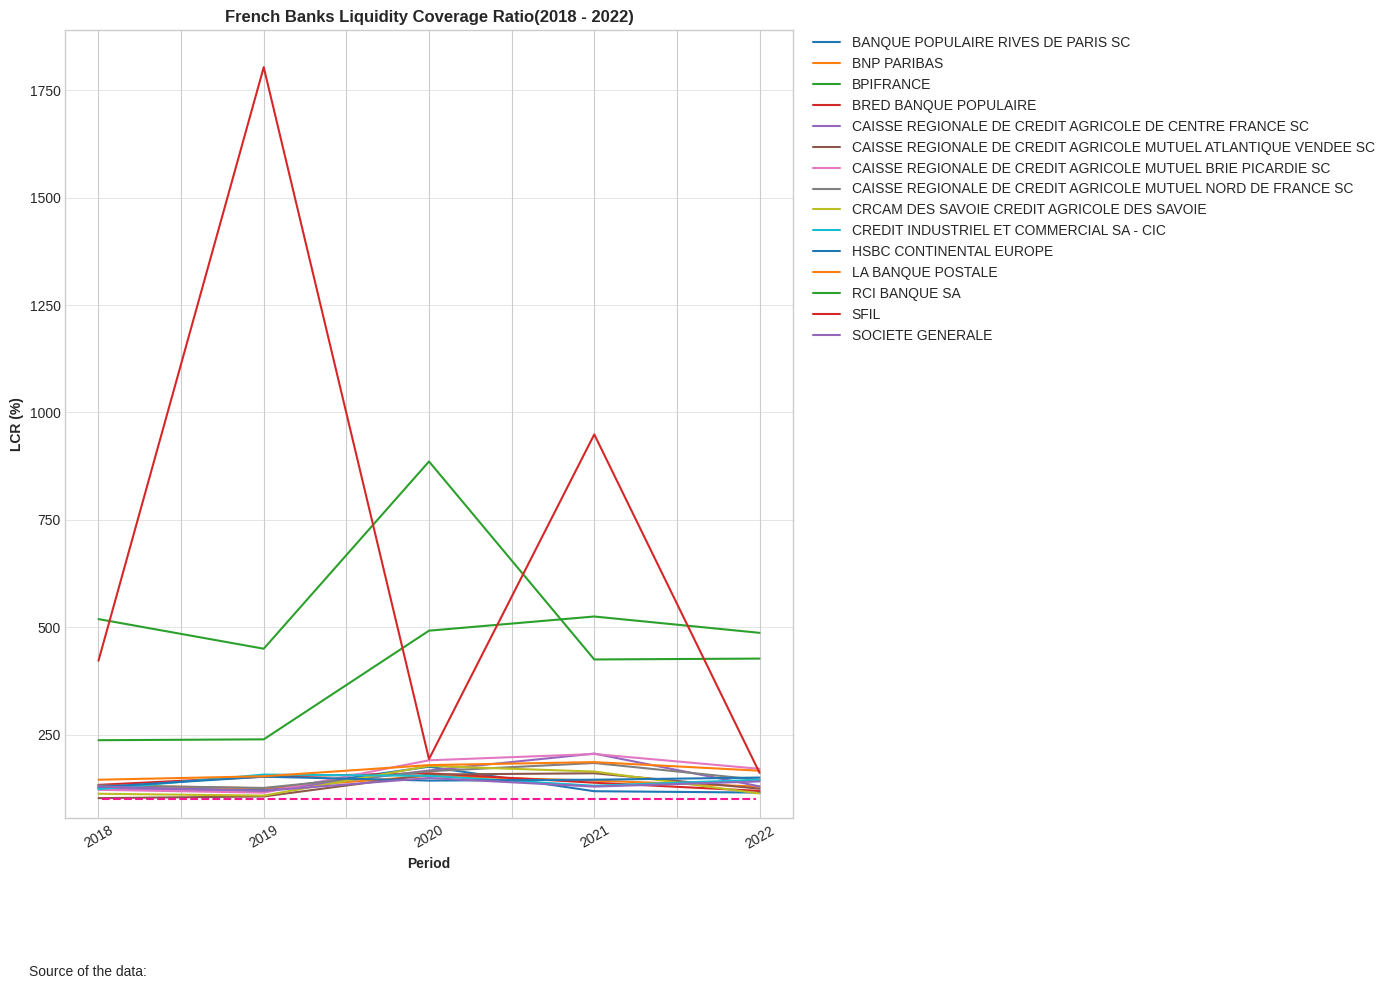

In [ ]:
pl = france_lcr.T.plot(rot = 30, figsize = (14, 10))
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('French Banks Liquidity Coverage Ratio(2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.ylim(55, 1890)
pl.text(-0.05, -0.2, 'Source of the data: ', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

# **3. MERGE**

In [ ]:
merge = pd.merge(nsfr_df, lcr_df)
#merge = merge[['Company', 'Country', 'NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22', 'LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
merge.shape

(28, 17)

In [ ]:
# Creating the Quartiles for years
%matplotlib inline
rcParams['figure.figsize'] = 12,8

#First quartile of elements for the sample according to total assets
Quart1_2018 = merge[(merge['TotAss_18']>=30000) & (merge['TotAss_18']<=50000)]
Quart1_2019 = merge[(merge['TotAss_19']>=30000) & (merge['TotAss_19']<=50000)]
Quart1_2020 = merge[(merge['TotAss_20']>=30000) & (merge['TotAss_20']<=50000)]
Quart1_2021 = merge[(merge['TotAss_21']>=30000) & (merge['TotAss_21']<=50000)]
Quart1_2022 = merge[(merge['TotAss_22']>=30000) & (merge['TotAss_22']<=50000)]

#Second quartile of elements for the sample according to total assets
Quart2_2018 = merge[(merge['TotAss_18']>=50000) & (merge['TotAss_18']<=75000)]
Quart2_2019 = merge[(merge['TotAss_19']>=50000) & (merge['TotAss_19']<=75000)]
Quart2_2020 = nsfr_df[(nsfr_df['TotAss_20']>=50000) & (nsfr_df['TotAss_20']<=75000)]
Quart2_2021 = nsfr_df[(nsfr_df['TotAss_21']>=50000) & (nsfr_df['TotAss_21']<=75000)]
Quart2_2022 = nsfr_df[(nsfr_df['TotAss_22']>=50000) & (nsfr_df['TotAss_22']<=75000)]

#Third quartile of elements for the sample according to total assets
Quart3_2018 = nsfr_df[(nsfr_df['TotAss_18']>=75000) & (nsfr_df['TotAss_18']<=100000)]
Quart3_2019 = nsfr_df[(nsfr_df['TotAss_19']>=75000) & (nsfr_df['TotAss_19']<=100000)]
Quart3_2020 = nsfr_df[(nsfr_df['TotAss_20']>=75000) & (nsfr_df['TotAss_20']<=100000)]
Quart3_2021 = nsfr_df[(nsfr_df['TotAss_21']>=75000) & (nsfr_df['TotAss_21']<=100000)]
Quart3_2022 = nsfr_df[(nsfr_df['TotAss_22']>=75000) & (nsfr_df['TotAss_22']<=100000)]

#Forth quartile of elements for the sample according to total assets
Quart4_2018 = nsfr_df[(nsfr_df['TotAss_18']>=100000) & (nsfr_df['TotAss_18']<=150000)]
Quart4_2019 = nsfr_df[(nsfr_df['TotAss_19']>=100000) & (nsfr_df['TotAss_19']<=150000)]
Quart4_2020 = nsfr_df[(nsfr_df['TotAss_20']>=100000) & (nsfr_df['TotAss_20']<=150000)]
Quart4_2021 = nsfr_df[(nsfr_df['TotAss_21']>=100000) & (nsfr_df['TotAss_21']<=150000)]
Quart4_2022 = nsfr_df[(nsfr_df['TotAss_22']>=100000) & (nsfr_df['TotAss_22']<=150000)]

#Fifth quartile of elements for the sample according to total assets
Quart5_2018 = nsfr_df[(nsfr_df['TotAss_18']>=150000) & (nsfr_df['TotAss_18']<=300000)]
Quart5_2019 = nsfr_df[(nsfr_df['TotAss_19']>=150000) & (nsfr_df['TotAss_19']<=300000)]
Quart5_2020 = nsfr_df[(nsfr_df['TotAss_20']>=150000) & (nsfr_df['TotAss_20']<=300000)]
Quart5_2021 = nsfr_df[(nsfr_df['TotAss_21']>=150000) & (nsfr_df['TotAss_21']<=300000)]
Quart5_2022 = nsfr_df[(nsfr_df['TotAss_22']>=150000) & (nsfr_df['TotAss_22']<=300000)]

#Sixth quartile of elements for the sample according to total assets
Quart6_2018 = nsfr_df[(nsfr_df['TotAss_18']>=300000) & (nsfr_df['TotAss_18']<=500000)]
Quart6_2019 = nsfr_df[(nsfr_df['TotAss_19']>=300000) & (nsfr_df['TotAss_19']<=500000)]
Quart6_2020 = nsfr_df[(nsfr_df['TotAss_20']>=300000) & (nsfr_df['TotAss_20']<=500000)]
Quart6_2021 = nsfr_df[(nsfr_df['TotAss_21']>=300000) & (nsfr_df['TotAss_21']<=500000)]
Quart6_2022 = nsfr_df[(nsfr_df['TotAss_22']>=300000) & (nsfr_df['TotAss_22']<=500000)]

#Seventh quartile of elements for the sample according to total assets
Quart7_2018 = nsfr_df[(nsfr_df['TotAss_18']>=500000) & (nsfr_df['TotAss_18']<=1000000)]
Quart7_2019 = nsfr_df[(nsfr_df['TotAss_19']>=500000) & (nsfr_df['TotAss_19']<=1000000)]
Quart7_2020 = nsfr_df[(nsfr_df['TotAss_20']>=500000) & (nsfr_df['TotAss_20']<=1000000)]
Quart7_2021 = nsfr_df[(nsfr_df['TotAss_21']>=500000) & (nsfr_df['TotAss_21']<=1000000)]
Quart7_2022 = nsfr_df[(nsfr_df['TotAss_22']>=500000) & (nsfr_df['TotAss_22']<=1000000)]

#Eighth quartile of elements for the sample according to total assets
Quart8_2018 = nsfr_df[(nsfr_df['TotAss_18']>1000000)]
Quart8_2019 = nsfr_df[(nsfr_df['TotAss_19']>1000000)]
Quart8_2020 = nsfr_df[(nsfr_df['TotAss_20']>1000000)]
Quart8_2021 = nsfr_df[(nsfr_df['TotAss_21']>1000000)]
Quart8_2022 = nsfr_df[(nsfr_df['TotAss_22']>1000000)]

In [ ]:
bpifrance = merge[merge['Company'] == 'BPIFRANCE']
bpifrance_nsfr = bpifrance[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
bpifrance_nsfr = bpifrance_nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
bpifrance_lcr = bpifrance[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
bpifrance_lcr = bpifrance_lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

frames = [bpifrance_nsfr, bpifrance_lcr]

union = pd.concat(frames)
union

2018   2019    2020   2021   2022
18  118.0  114.0  132.84  122.0  117.0
18  519.0  450.0  885.96  425.0  427.0

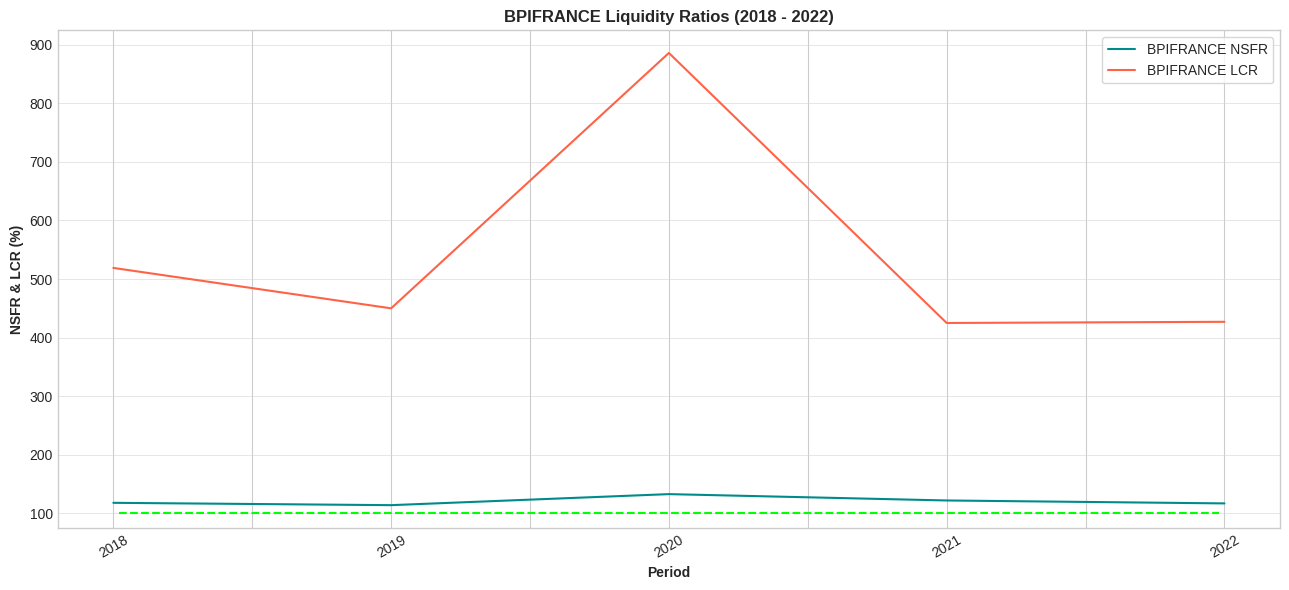

In [ ]:
pl = union.T.plot(color = ('darkcyan', 'tomato'), rot = 30, figsize = (13, 6))
pl.set_title('BPIFRANCE Liquidity Ratios (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
pl.set_ylabel('NSFR & LCR (%)', fontweight = 'bold', fontsize = 10)
#plt.ylim(55, 910)
pl.legend(['BPIFRANCE NSFR', 'BPIFRANCE LCR'], frameon = True, loc = 'upper right')
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

In [ ]:
santander = merge[merge['Company'] == 'BANCO SANTANDER SA']
santander_nsfr = santander[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
santander_nsfr = santander_nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
santander_lcr = santander[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
santander_lcr = santander_lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

frames = [santander_nsfr, santander_lcr]

union = pd.concat(frames)
union

2018   2019   2020   2021   2022
0  114.0  112.0  120.0  126.0  121.0
0  158.0  147.0  168.0  163.0  152.0

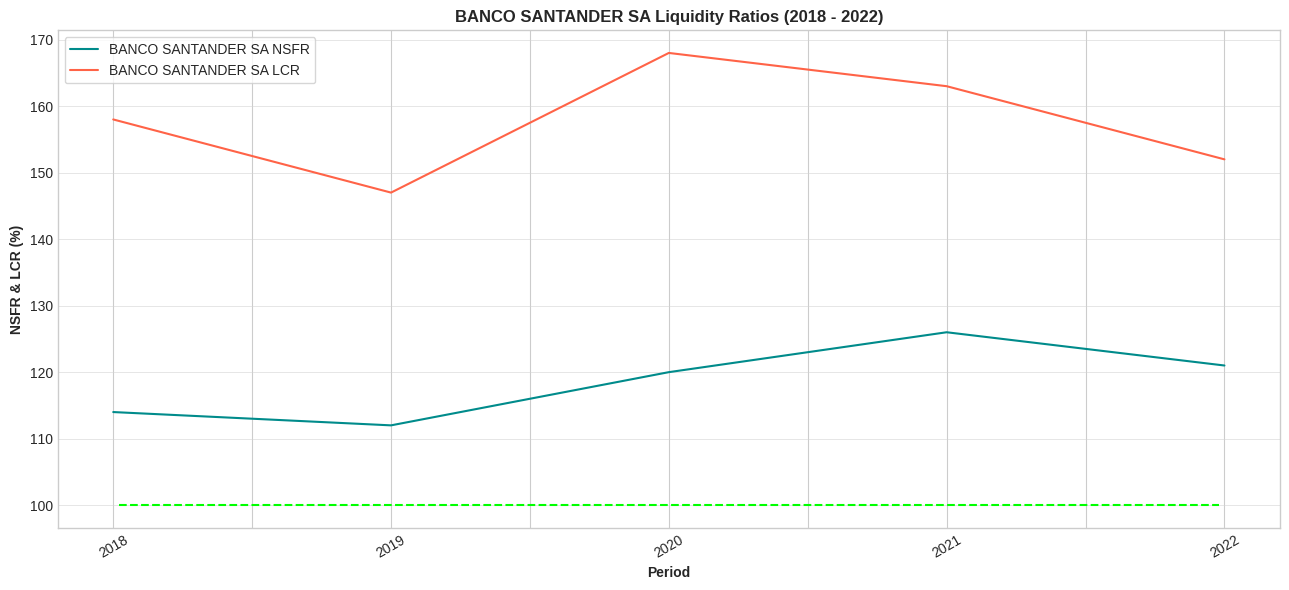

In [ ]:
pl = union.T.plot(color = ('darkcyan', 'tomato'), rot = 30, figsize = (13, 6))
pl.set_title('BANCO SANTANDER SA Liquidity Ratios (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
pl.set_ylabel('NSFR & LCR (%)', fontweight = 'bold', fontsize = 10)
#plt.ylim(55, 910)
pl.legend(['BANCO SANTANDER SA NSFR', 'BANCO SANTANDER SA LCR'], frameon = True, loc = 'upper left')
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

# **4. FOCUS (2021 - 2022)**

In [ ]:
data_2122 = data_object[['Company', 'Country', 'NSFR_21', 'NSFR_22', 'LCR_21', 'LCR_22']]
data_2122

Company  Country  NSFR_21  \
0                                          BNP PARIBAS   France   121.58   
1                                   CREDIT AGRICOLE SA   France   122.48   
2                                   BANCO SANTANDER SA    Spain   126.00   
3                                     SOCIETE GENERALE   France      NaN   
4                                     DEUTSCHE BANK AG  Germany   121.00   
..                                                 ...      ...      ...   
104                   OESTERREICHISCHE KONTROLLBANK AG  Austria      NaN   
105                        GROUPE BRUXELLES LAMBERT SA  Belgium      NaN   
106                         HAMBURG COMMERCIAL BANK AG  Germany   114.00   
107  CAISSE REGIONALE DE CREDIT AGRICOLE MUTUEL ATL...   France   112.17   
108  CAISSE REGIONALE DE CREDIT AGRICOLE DE CENTRE ...   France   112.67   

     NSFR_22  LCR_21  LCR_22  
0     115.05  143.00  129.00  
1     114.20  183.00  162.70  
2     121.00  163.00  152.00  
3     113.60  129.00  141.00  
4     120.00  133.10  141.60  
..       ...     ...     ...  
104      NaN     NaN     NaN  
105      NaN     NaN     NaN  
106   112.70  164.00  197.00  
107   106.80  160.02  124.16  
108   106.17  205.86  129.47  

[109 rows x 6 columns]

In [ ]:
# drop column with NaN
data2122_df = data_2122.dropna(axis = 'rows')
#data2122_df

data2122_df.shape

(78, 6)

## 4.1 LCR

In [ ]:
lcrcountry = lcr.groupby(by = lcr['Country']).mean()
lcrcountry = lcrcountry.iloc[:, ::-1]
lcrcountry = lcrcountry.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
lcrcountry

<ipython-input-169-71e315b812e9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lcrcountry = lcr.groupby(by = lcr['Country']).mean()


TotAss_22      TotAss_21      TotAss_20      TotAss_19  \
Country                                                                   
Austria      145633.055600  141457.377200  130049.840800  115668.734600   
Belgium      179311.636889  157473.281111  152411.269444  142164.324333   
Finland      321290.146500  308356.530000  298101.213000  296890.879000   
France       436002.619345  425587.542586  404855.130793  327845.444828   
Germany      284339.179889  278829.155444  274544.640944  260088.759944   
Greece        78313.172750   78738.739000   71701.268500   63424.405250   
Ireland      140543.000000  141582.250000  122082.500000  115234.500000   
Italy        248079.820615  263348.712692  250654.121077  218703.100000   
Luxembourg    59267.729500   57743.632000   53386.580000   52241.155000   
Netherlands  458957.142857  464742.857143  471903.285714  447778.142857   
Portugal      67282.224600   68619.479800   63540.100600   60121.939200   
Spain        353410.570636  346201.264091  314250.462000  301169.447545   

                 TotAss_18        2022        2021        2020        2019  \
Country                                                                      
Austria      109809.660400  188.333333  189.786667  194.766667  144.666667   
Belgium      140715.596111  161.000000  173.854000  170.636667  163.262000   
Finland      293542.369500  209.350000  247.450000  211.200000  298.100000   
France       307656.459034  160.921923  215.290800  205.001739  227.921905   
Germany      256196.016722  169.635000  181.808333  178.867273  165.653500   
Greece        61494.685000  198.550000  197.000000  168.626667  152.150000   
Ireland      107610.500000  206.500000  192.000000  172.957500  147.500000   
Italy        209179.023231  244.190000  255.570909  264.405455  162.332857   
Luxembourg    50290.401000  130.300000  120.400000  115.000000  118.000000   
Netherlands  444358.000000  171.200000  197.800000  168.954000  146.600000   
Portugal      59979.104400  218.900000  248.140000  232.740000  197.460000   
Spain        290053.802273  197.468889  263.125000  260.128182  193.977000   

                   2018  
Country                  
Austria      154.366667  
Belgium      157.070000  
Finland      181.000000  
France       169.372222  
Germany      161.223333  
Greece       130.150000  
Ireland      132.000000  
Italy        192.247143  
Luxembourg   115.000000  
Netherlands  152.500000  
Portugal     173.720000  
Spain        218.997778

In [ ]:
lcrcountry = lcr.loc[:, ['Country', 'LCR_21', 'LCR_22']]
lcrcountry = lcrcountry.groupby(by = lcrcountry['Country']).mean()
lcrcountry

LCR_21      LCR_22
Country                            
Austria      189.786667  188.333333
Belgium      173.854000  161.000000
Finland      247.450000  209.350000
France       215.290800  160.921923
Germany      181.808333  169.635000
Greece       197.000000  198.550000
Ireland      192.000000  206.500000
Italy        255.570909  244.190000
Luxembourg   120.400000  130.300000
Netherlands  197.800000  171.200000
Portugal     248.140000  218.900000
Spain        263.125000  197.468889

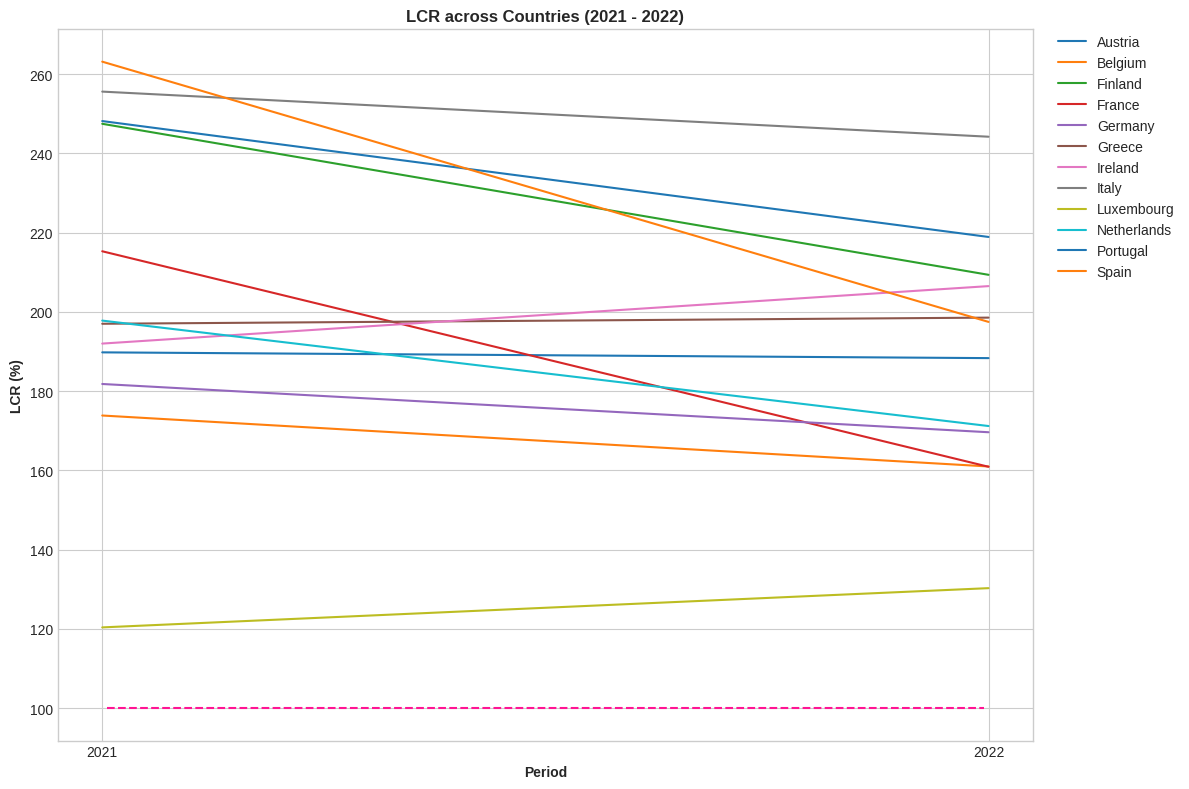

In [ ]:
pl = lcrcountry.T.plot()
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('LCR across Countries (2021 - 2022)', fontweight = 'bold', fontsize = 12)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
pl.set_xticks(np.arange(2), ['2021', '2022'])

<ipython-input-172-04c4c82dcabc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data21_22_year = data21_df_with_year.append(data22_df_with_year)


[Text(0, 0, 'France'),
 Text(1, 0, 'Spain'),
 Text(2, 0, 'Germany'),
 Text(3, 0, 'Italy'),
 Text(4, 0, 'Netherlands'),
 Text(5, 0, 'Finland'),
 Text(6, 0, 'Belgium'),
 Text(7, 0, 'Austria'),
 Text(8, 0, 'Ireland'),
 Text(9, 0, 'Portugal'),
 Text(10, 0, 'Greece'),
 Text(11, 0, 'Luxembourg')]

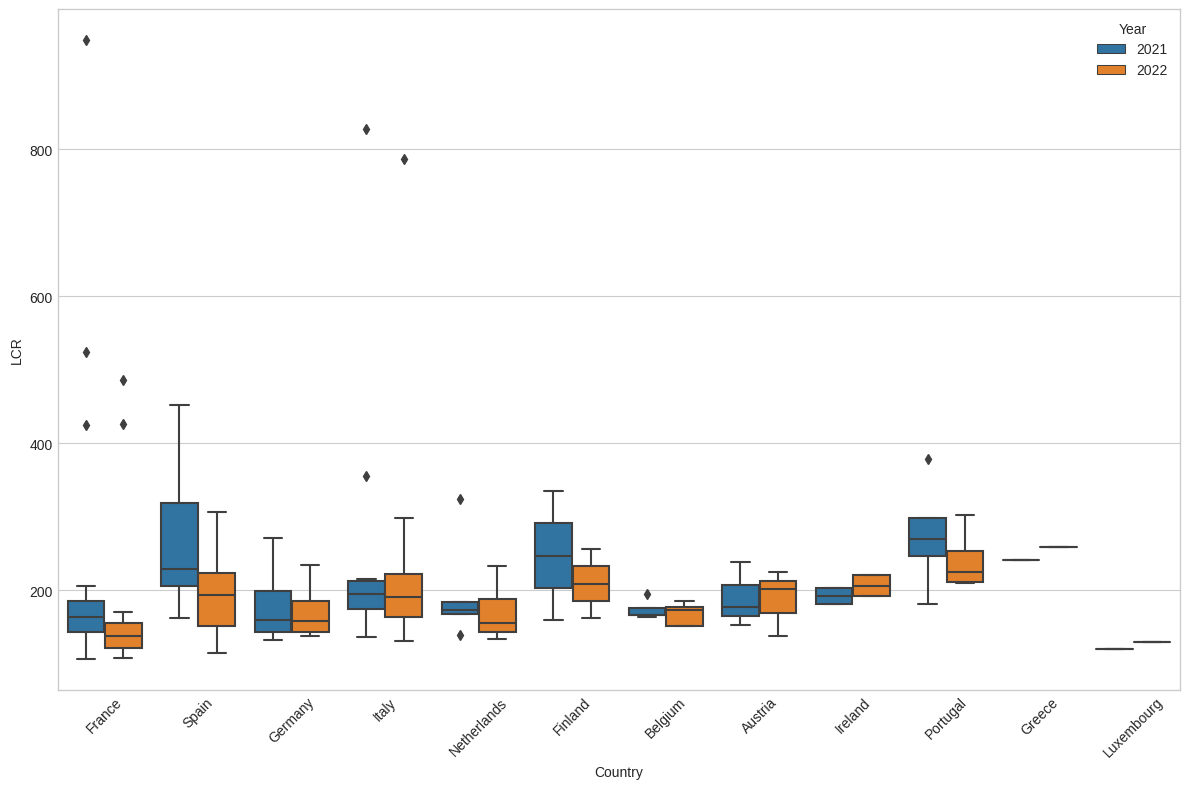

In [ ]:
data21_df_with_year = data2122_df[['Company', 'Country', 'NSFR_21', 'LCR_21']].copy()
data21_df_with_year.rename(columns={'NSFR_21': 'NSFR', 'LCR_21': 'LCR'}, inplace=True)
data21_df_with_year['Year'] = 2021

data22_df_with_year = data2122_df[['Company', 'Country', 'NSFR_22', 'LCR_22']].copy()
data22_df_with_year.rename(columns={'NSFR_22': 'NSFR', 'LCR_22': 'LCR'}, inplace=True)
data22_df_with_year['Year'] = 2022

data21_22_year = data21_df_with_year.append(data22_df_with_year)
ax = sns.boxplot(data=data21_22_year, x='Country', y='LCR', hue='Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## 4.2. Outliers in LCR


In [ ]:
def detect_outliers(name_country, name_ratio):
  df_country = data21_22_year[(data21_22_year['Country'] == name_country)]
  country_outliers_21_22 = pd.DataFrame()
  for i in data21_22_year['Year'].unique():
    q1, q3 = np.percentile(df_country[df_country['Year'] == i][name_ratio], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    #create conditions to isolate the outliers
    country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
                                        | ((df_country['Year'] == i) & (df_country[name_ratio] <= lower_bound))])
  country_outliers_names = country_outliers_21_22['Company'].unique()
  country_outliers_df = data_object[data_object['Company'].isin(country_outliers_names)]
  country_outliers_lcr = country_outliers_df[[name_ratio + '_18', name_ratio +'_19',
                                              name_ratio + '_20', name_ratio + '_21', name_ratio + '_22', 'Company']]
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',
                                         name_ratio + '_20': '2020', name_ratio + '_21': '2021', name_ratio + '_22': '2022'},
                              inplace=True)
  country_outliers_lcr = country_outliers_lcr.T
  country_outliers_lcr.drop(['Company'], axis=0, inplace=True)
  country_outliers_lcr.columns = country_outliers_names
  return country_outliers_lcr

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, 'French outliers (2018 - 2022)')

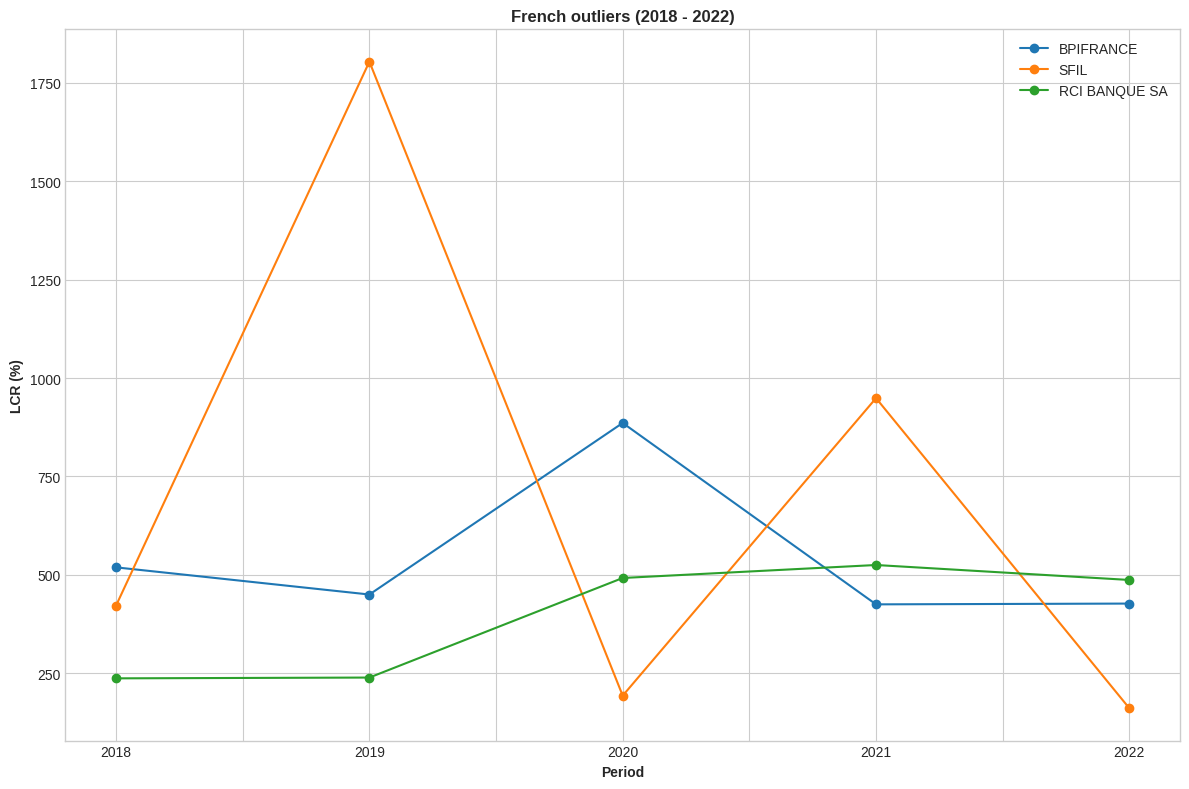

In [ ]:
# french outliers
french_outliers = detect_outliers('France', 'LCR')
french_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.title('French outliers (2018 - 2022)', fontweight = 'bold', fontsize = 12)

The French outliers are the same outliers from the previous part of the analysis.

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, 'Italian outliers (2018 - 2022)')

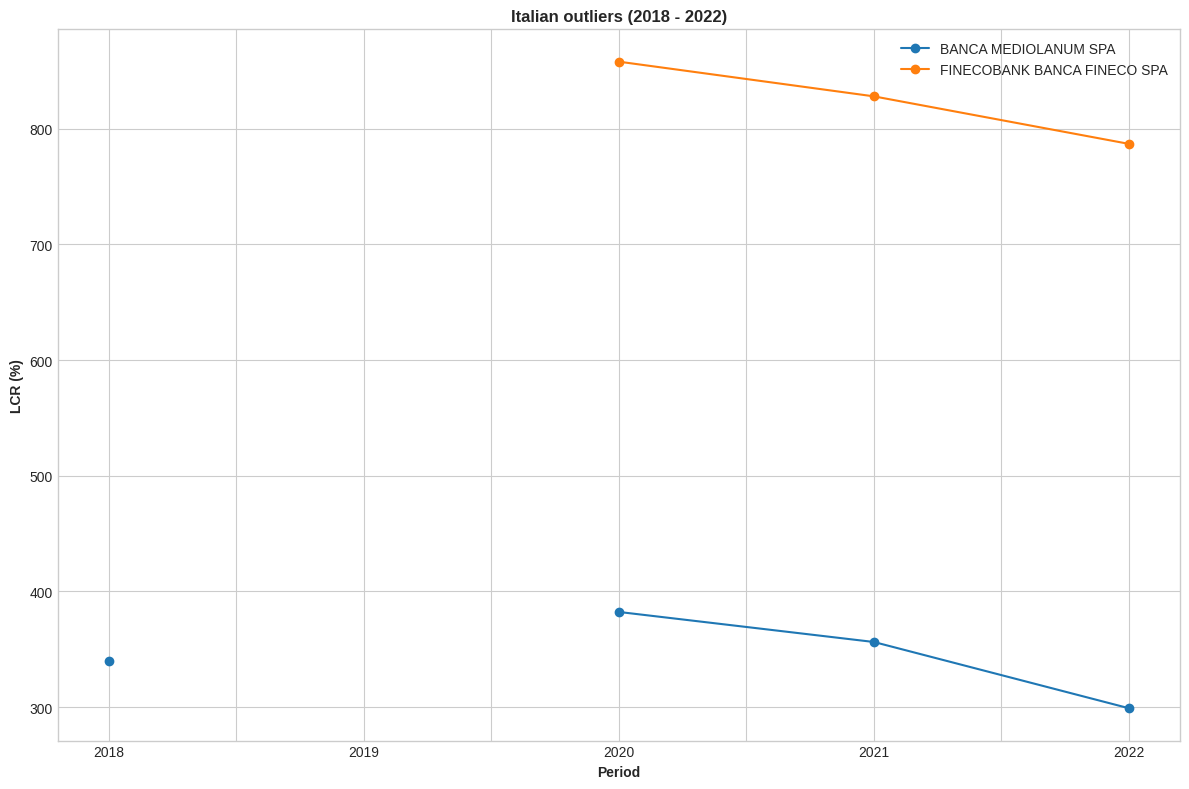

In [ ]:
# italian outliers
italian_outliers = detect_outliers('Italy', 'LCR')
italian_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.title('Italian outliers (2018 - 2022)', fontweight = 'bold', fontsize = 12)

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, "Netherlands' outliers (2018 - 2022)")

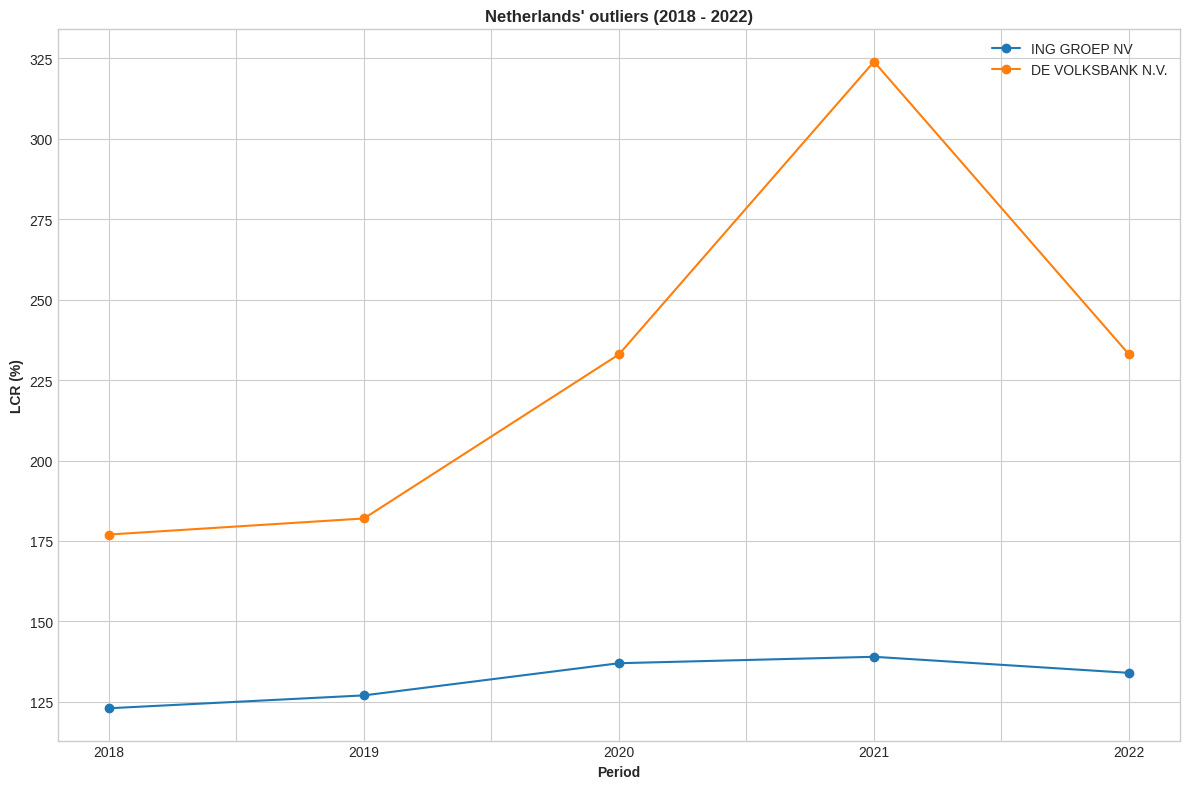

In [ ]:
# Netherlands' outliers
netherlands_outliers = detect_outliers('Netherlands', 'LCR')
netherlands_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.title("Netherlands' outliers (2018 - 2022)", fontweight = 'bold', fontsize = 12)

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, 'Belgian outliers (2018 - 2022)')

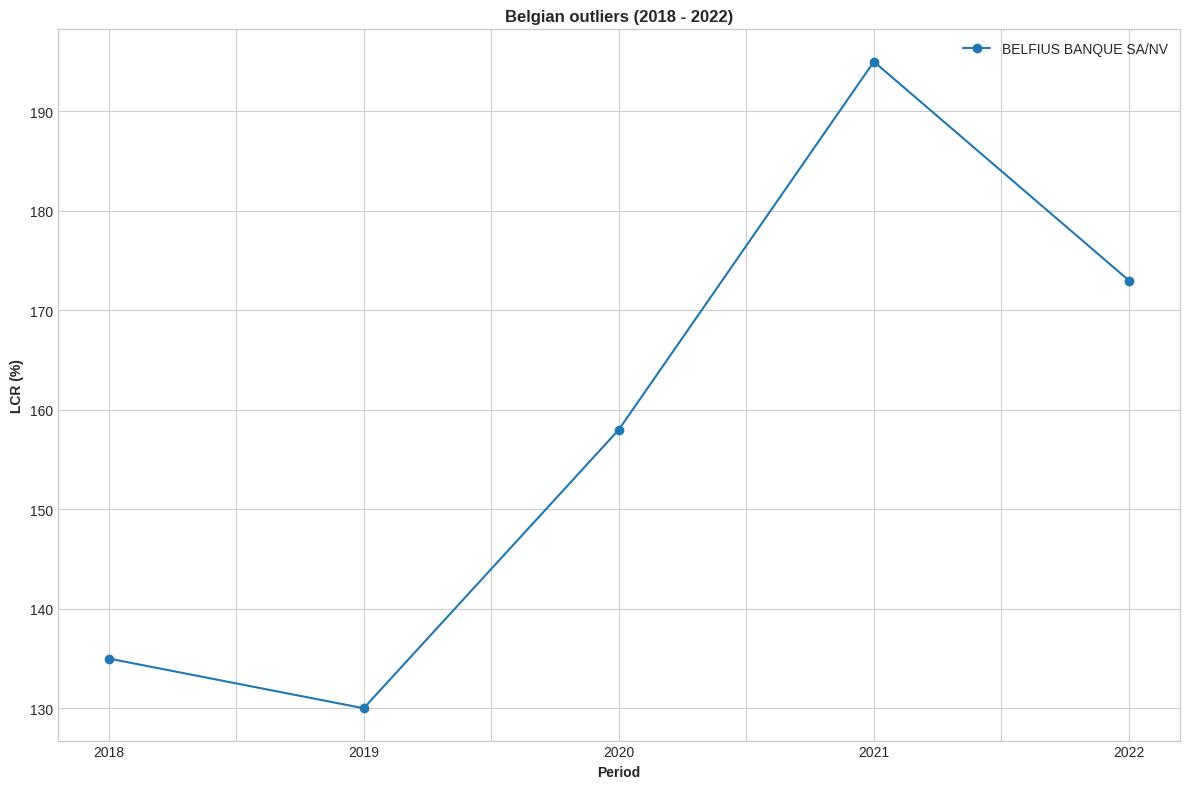

In [ ]:
# Belgium outliers
belgium_outliers = detect_outliers('Belgium', 'LCR')
belgium_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.title('Belgian outliers (2018 - 2022)', fontweight = 'bold', fontsize = 12)

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, 'Portuguese outliers (2018 - 2022)')

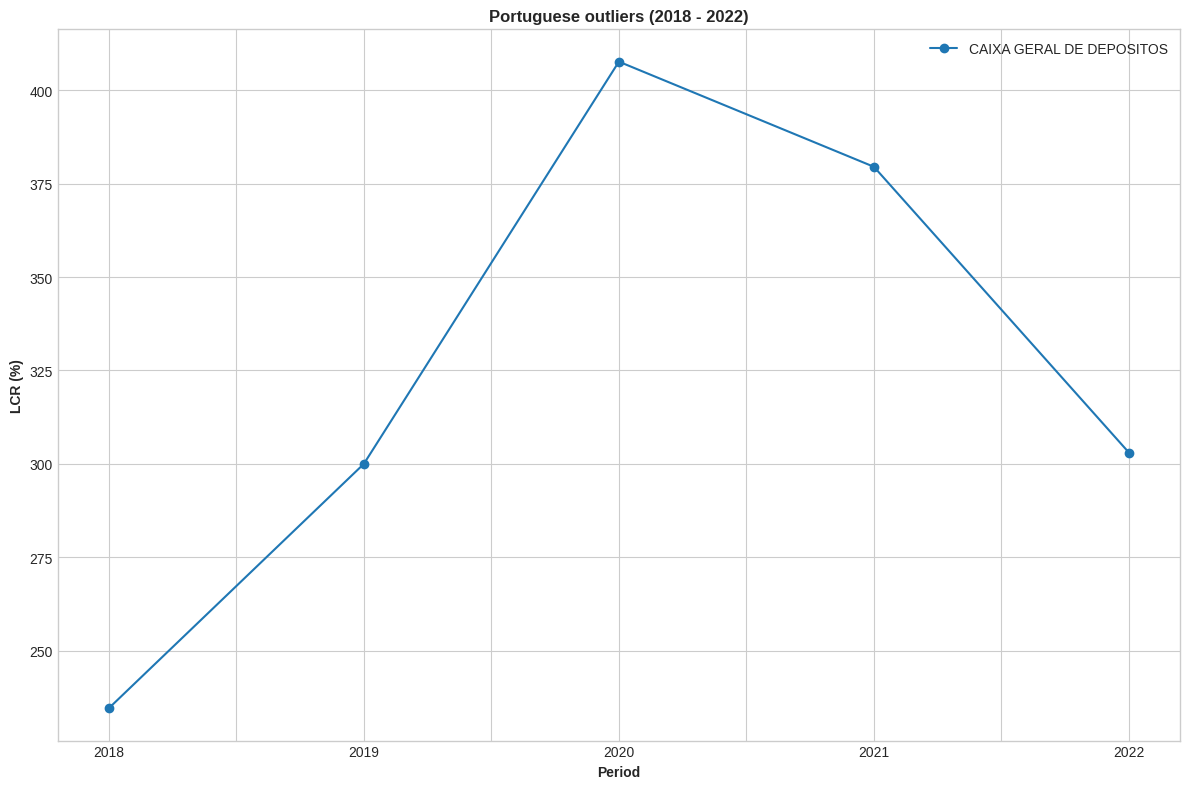

In [ ]:
# Portugal outliers
portugal_outliers = detect_outliers('Portugal', 'LCR')
portugal_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.title('Portuguese outliers (2018 - 2022)', fontweight = 'bold', fontsize = 12)

## 4.3. NSFR

[Text(0, 0, 'France'),
 Text(1, 0, 'Spain'),
 Text(2, 0, 'Germany'),
 Text(3, 0, 'Italy'),
 Text(4, 0, 'Netherlands'),
 Text(5, 0, 'Finland'),
 Text(6, 0, 'Belgium'),
 Text(7, 0, 'Austria'),
 Text(8, 0, 'Ireland'),
 Text(9, 0, 'Portugal'),
 Text(10, 0, 'Greece'),
 Text(11, 0, 'Luxembourg')]

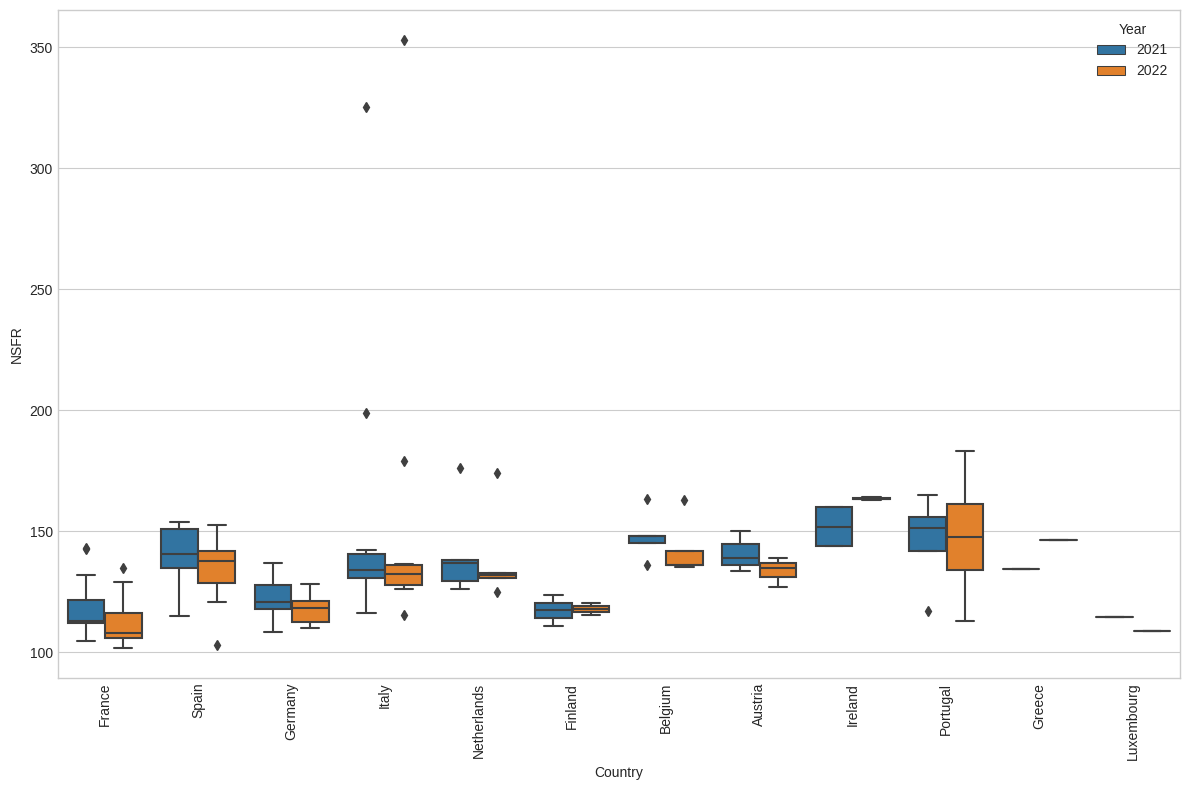

In [ ]:
ax = sns.boxplot(data=data21_22_year, x='Country', y='NSFR', hue='Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## 4.4 Outliers in NSFR

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, 'French outliers (2018 - 2022)')

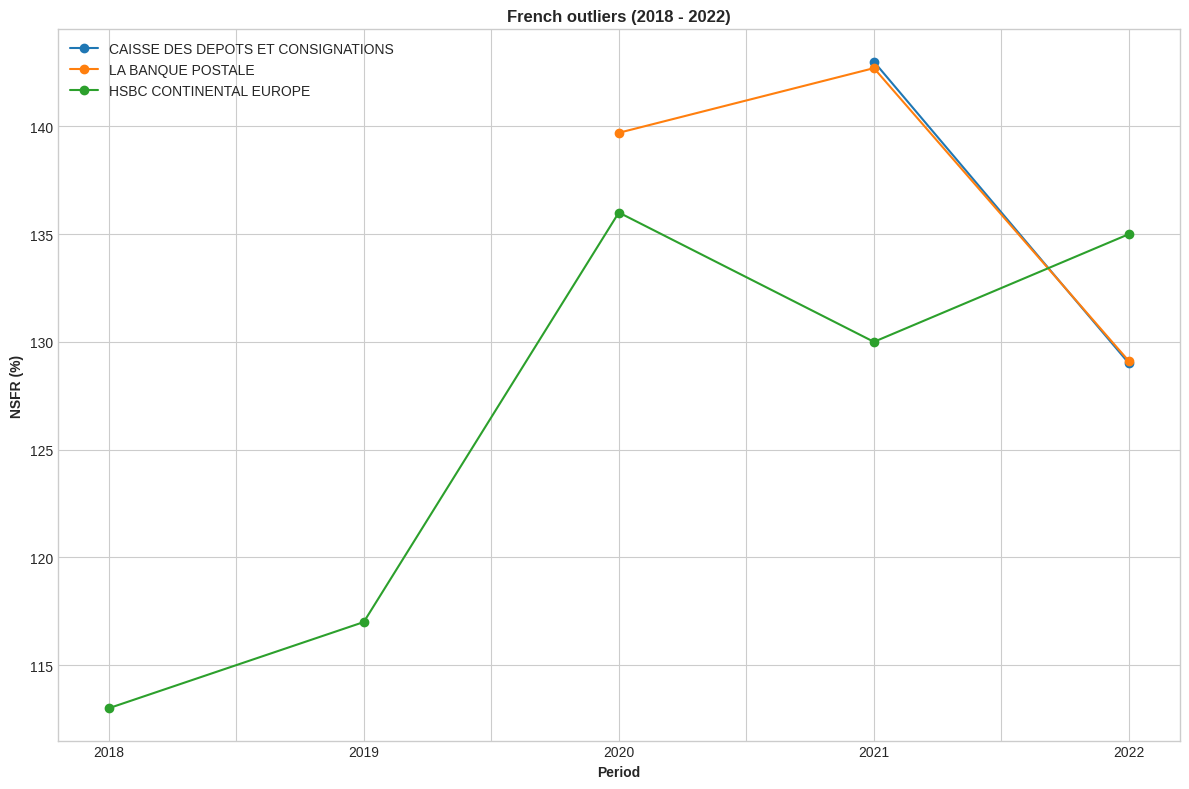

In [ ]:
# french outliers
french_outliers = detect_outliers('France', 'NSFR')
french_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
plt.title('French outliers (2018 - 2022)', fontweight = 'bold', fontsize = 12)

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, 'Spanish outliers (2018 - 2022)')

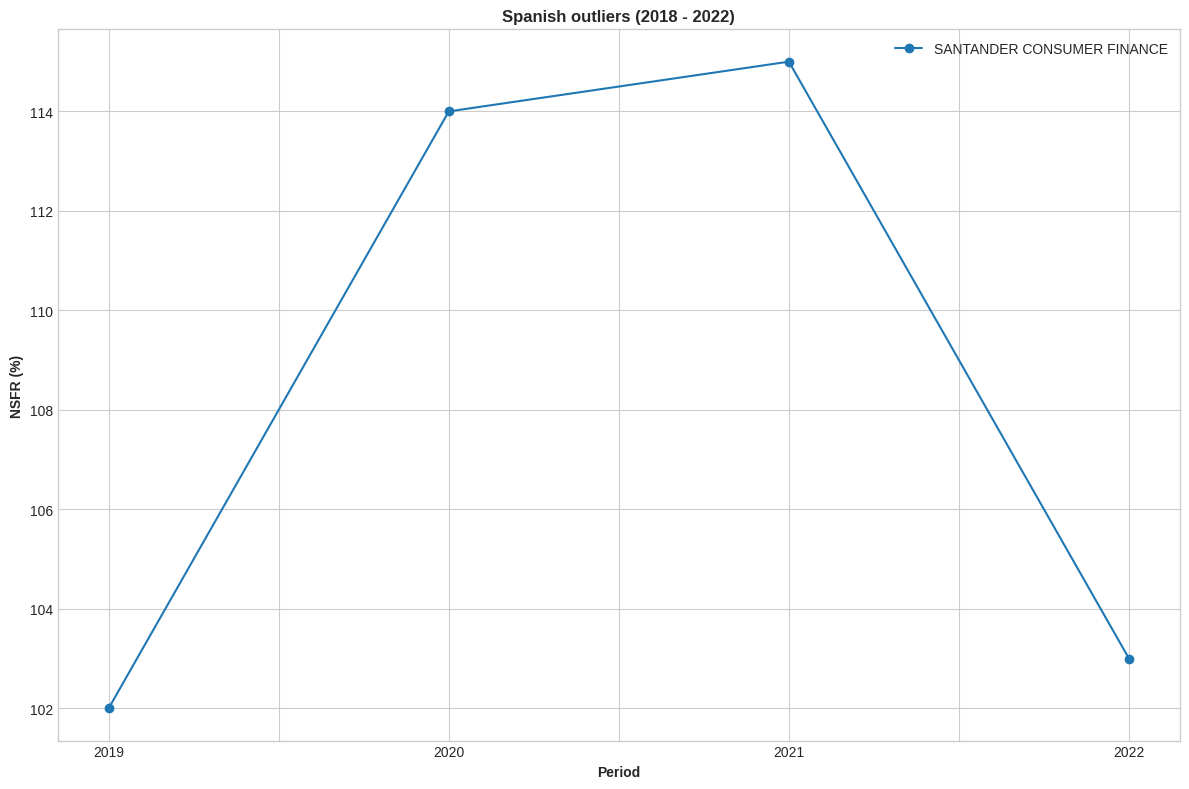

In [ ]:
# Spain outliers
spain_outliers = detect_outliers('Spain', 'NSFR')
spain_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
plt.title('Spanish outliers (2018 - 2022)', fontweight = 'bold', fontsize = 12)

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, 'Italian outliers (2018 - 2022)')

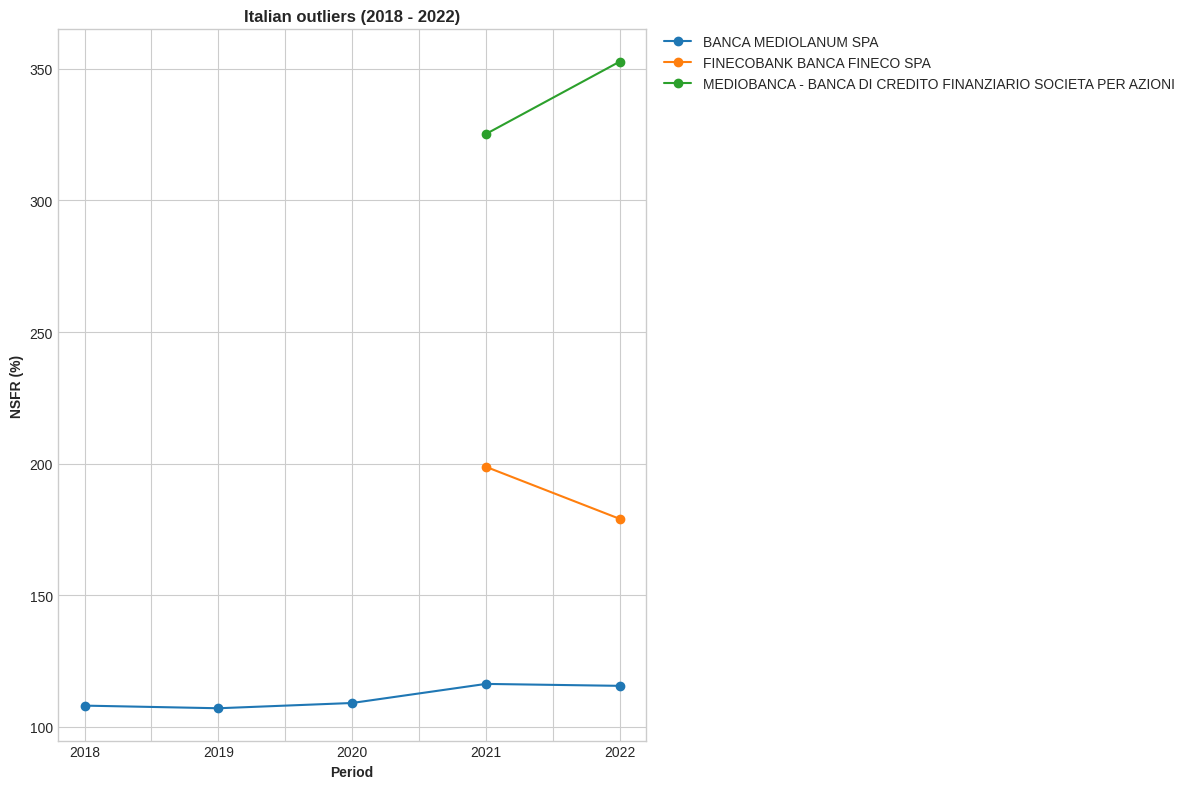

In [ ]:
# italian outliers
italian_outliers = detect_outliers('Italy', 'NSFR')
italian_outliers.plot(marker='o')
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
plt.title('Italian outliers (2018 - 2022)', fontweight = 'bold', fontsize = 12)

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, "Netherlands' outliers (2018 - 2022)")

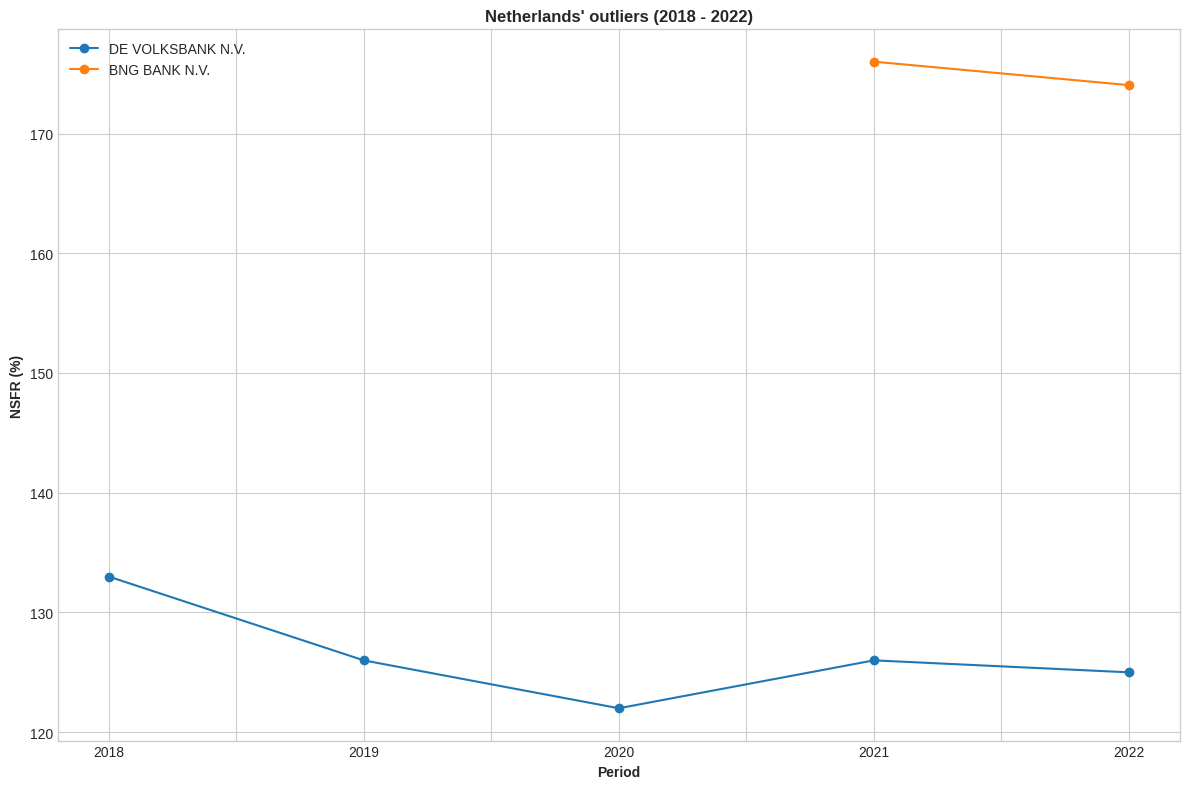

In [ ]:
# Netherlands' outliers
netherlands_outliers = detect_outliers('Netherlands', 'NSFR')
netherlands_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
plt.title("Netherlands' outliers (2018 - 2022)", fontweight = 'bold', fontsize = 12)

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, 'Belgian outliers (2018 - 2022)')

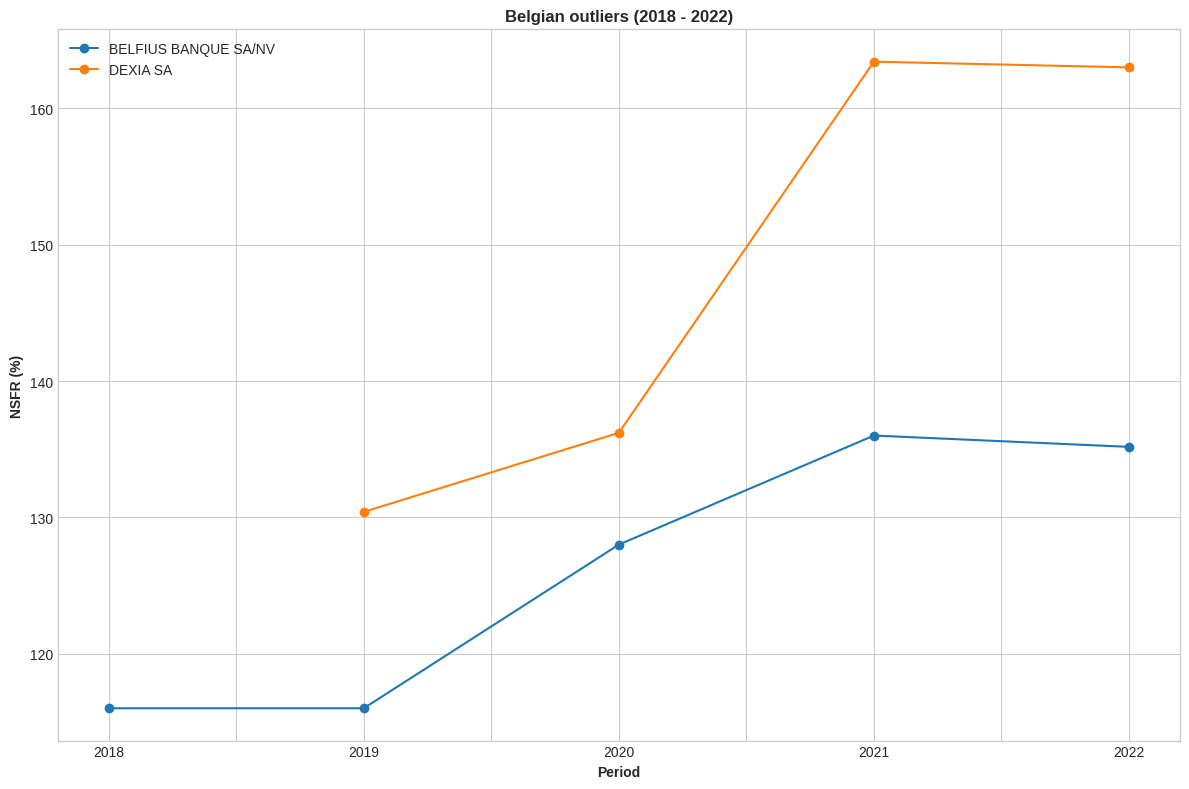

In [ ]:
# Belgium outliers
belgium_outliers = detect_outliers('Belgium', 'NSFR')
belgium_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
plt.title('Belgian outliers (2018 - 2022)', fontweight = 'bold', fontsize = 12)

<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  country_outliers_21_22 = country_outliers_21_22.append(df_country[((df_country['Year'] == i) & (df_country[name_ratio] >= upper_bound))
<ipython-input-173-625dd86c9681>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_outliers_lcr.rename(columns = {name_ratio + '_18': '2018', name_ratio +'_19': '2019',


Text(0.5, 1.0, 'Portuguese outliers (2018 - 2022)')

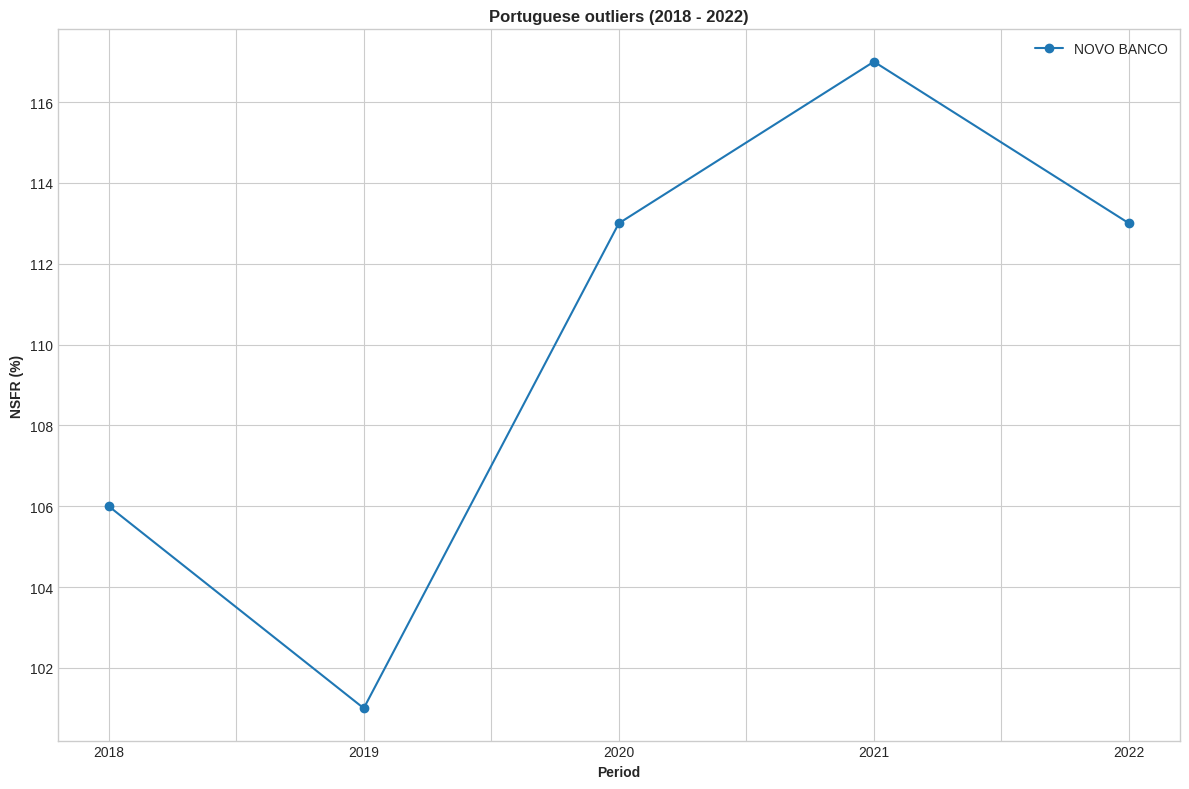

In [ ]:
# Portugal outliers
portugal_outliers = detect_outliers('Portugal', 'NSFR')
portugal_outliers.plot(marker='o')
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
plt.title('Portuguese outliers (2018 - 2022)', fontweight = 'bold', fontsize = 12)

# **5. Euro Area Members Generic Analysis**


We tertirved some data from the CBD2 dataset from the SDW of the ECB regarding the Net Stable Funding ratio with the scope of getting a snapshot of the general situation in the euro area in terms of the long term regulatory matric.

Text(0.5, 1.0, 'Average NSFR for the member states of the Euro Area')

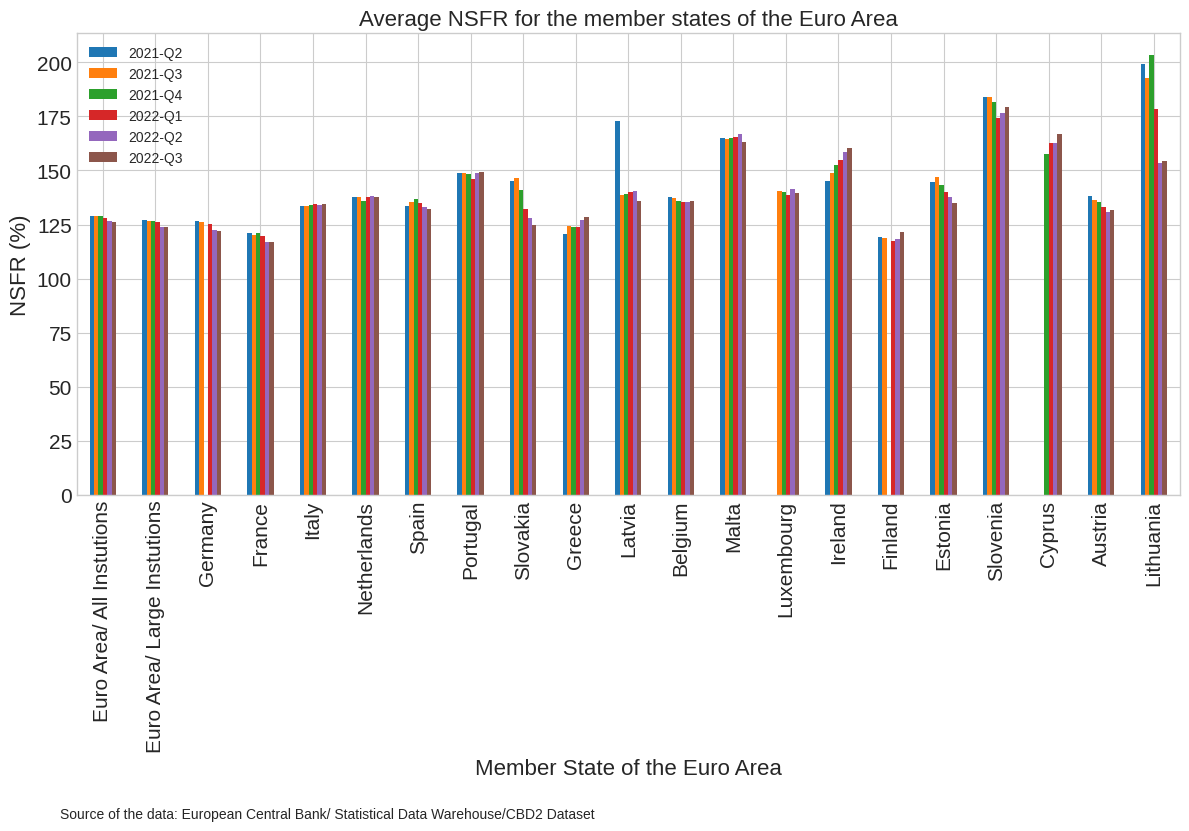

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8
pl = data_euro_area21_22.plot(kind='bar', x='Member', fontsize=15)
pl.set_ylabel("NSFR (%)",fontsize=16)
pl.set_xlabel("Member State of the Euro Area",fontsize=16)
pl.text(-0.015, -0.7,'Source of the data: European Central Bank/ Statistical Data Warehouse/CBD2 Dataset', transform = pl.transAxes)
pl.set_title('Average NSFR for the member states of the Euro Area', fontsize=16)



<ipython-input-187-4b6aff101f7a>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-187-4b6aff101f7a>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pl.mean().plot(ax = ax, label='Euro Area/ All Instutions', fontsize=15, color=['teal'])
<ipython-input-187-4b6aff101f7a>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid colu

Text(0.5, 1.0, 'NSFR Euro Area: Large vs All Instututions')

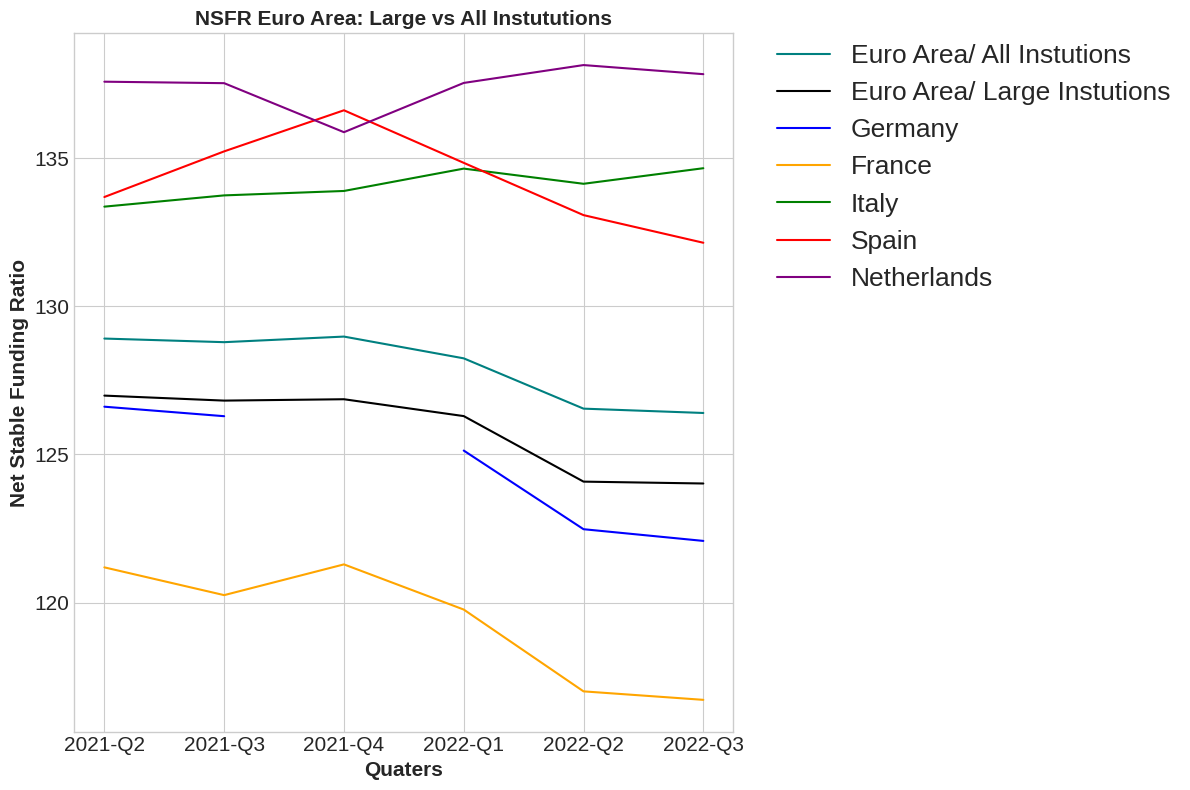

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8

pl=data_euro_area21_22[data_euro_area21_22['Member']=='Euro Area/ All Instutions']
pl_1=data_euro_area21_22[data_euro_area21_22['Member']=='Euro Area/ Large Instutions']
pl_2=data_euro_area21_22[data_euro_area21_22['Member']=='Germany']
pl_3=data_euro_area21_22[data_euro_area21_22['Member']=='France']
pl_4=data_euro_area21_22[data_euro_area21_22['Member']=='Italy']
pl_5=data_euro_area21_22[data_euro_area21_22['Member']=='Spain']
pl_6=data_euro_area21_22[data_euro_area21_22['Member']=='Netherlands']

plt.style.use('seaborn-whitegrid')

fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl.mean().plot(ax = ax, label='Euro Area/ All Instutions', fontsize=15, color=['teal'])
pl_1.mean().plot(ax = ax, label='Euro Area/ Large Instutions', color=['black'])
pl_2.mean().plot(ax = ax, label='Germany', color=['blue'])
pl_3.mean().plot(ax = ax, label='France', color=['orange'])
pl_4.mean().plot(ax = ax, label='Italy', color=['green'])
pl_5.mean().plot(ax = ax, label='Spain', color=['red'])
pl_6.mean().plot(ax = ax, label='Netherlands', color=['purple'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=19)
ax.set_xlabel('Quaters', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('Net Stable Funding Ratio' , fontweight = 'bold', fontsize = 15)
ax.set_title('NSFR Euro Area: Large vs All Instututions', fontweight = 'bold', fontsize = 15)

<ipython-input-188-bbcbcc2e71a6>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-188-bbcbcc2e71a6>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pl.mean().plot(ax = ax, label='Greece')
<ipython-input-188-bbcbcc2e71a6>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silen

Text(0.5, 1.0, 'NSFR Euro Area: Large Insitututions & Member States')

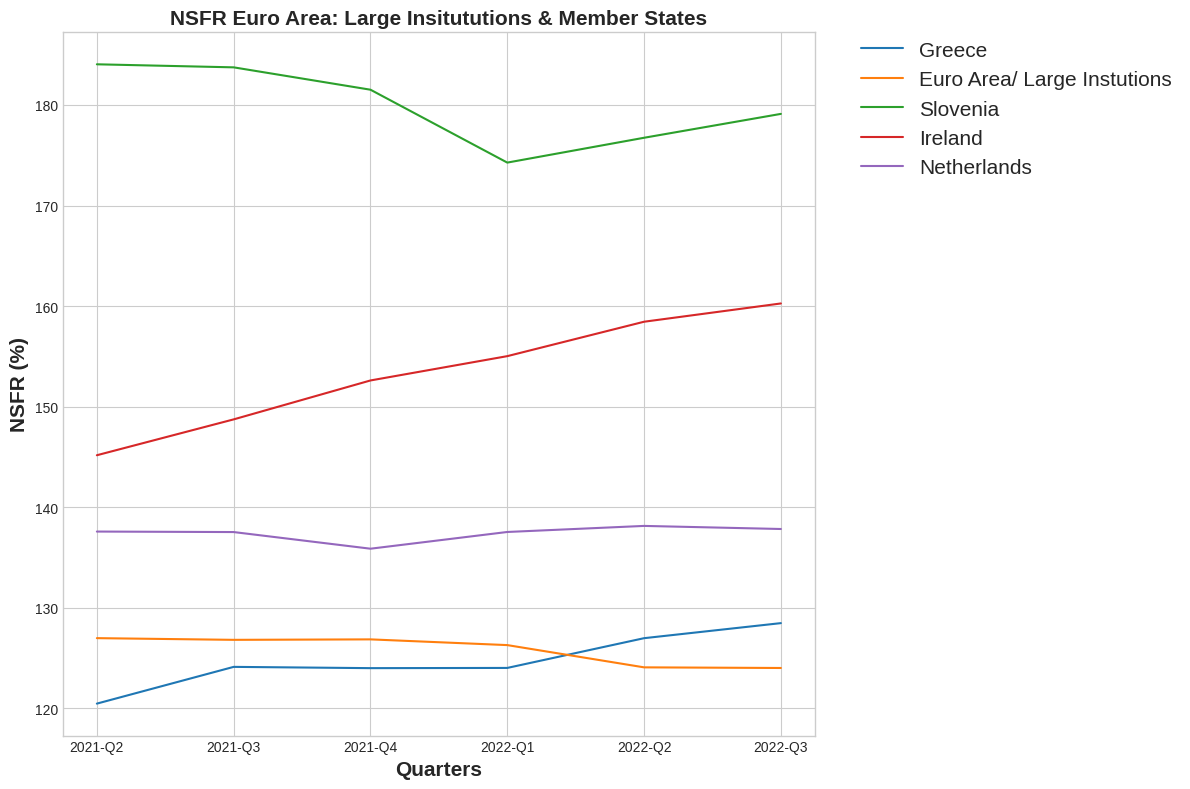

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8
pl=data_euro_area21_22[data_euro_area21_22['Member']=='Greece']
pl_1=data_euro_area21_22[data_euro_area21_22['Member']=='Euro Area/ Large Instutions']
pl_2=data_euro_area21_22[data_euro_area21_22['Member']=='Slovenia']
pl_3=data_euro_area21_22[data_euro_area21_22['Member']=='Ireland']
pl_4=data_euro_area21_22[data_euro_area21_22['Member']=='Netherlands']

plt.style.use('seaborn-whitegrid')

fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl.mean().plot(ax = ax, label='Greece')
pl_1.mean().plot(ax = ax, label='Euro Area/ Large Instutions')
pl_2.mean().plot(ax = ax, label='Slovenia')
pl_3.mean().plot(ax = ax, label='Ireland')
pl_4.mean().plot(ax = ax, label='Netherlands')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
ax.set_xlabel('Quarters', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('NSFR (%)' , fontweight = 'bold', fontsize = 15)
ax.set_title('NSFR Euro Area: Large Insitututions & Member States', fontweight = 'bold', fontsize = 15)

Text(-0.015, -0.4, 'Source of the data: European Central Bank/ Statistical Data Warehouse/CBD2 Dataset')

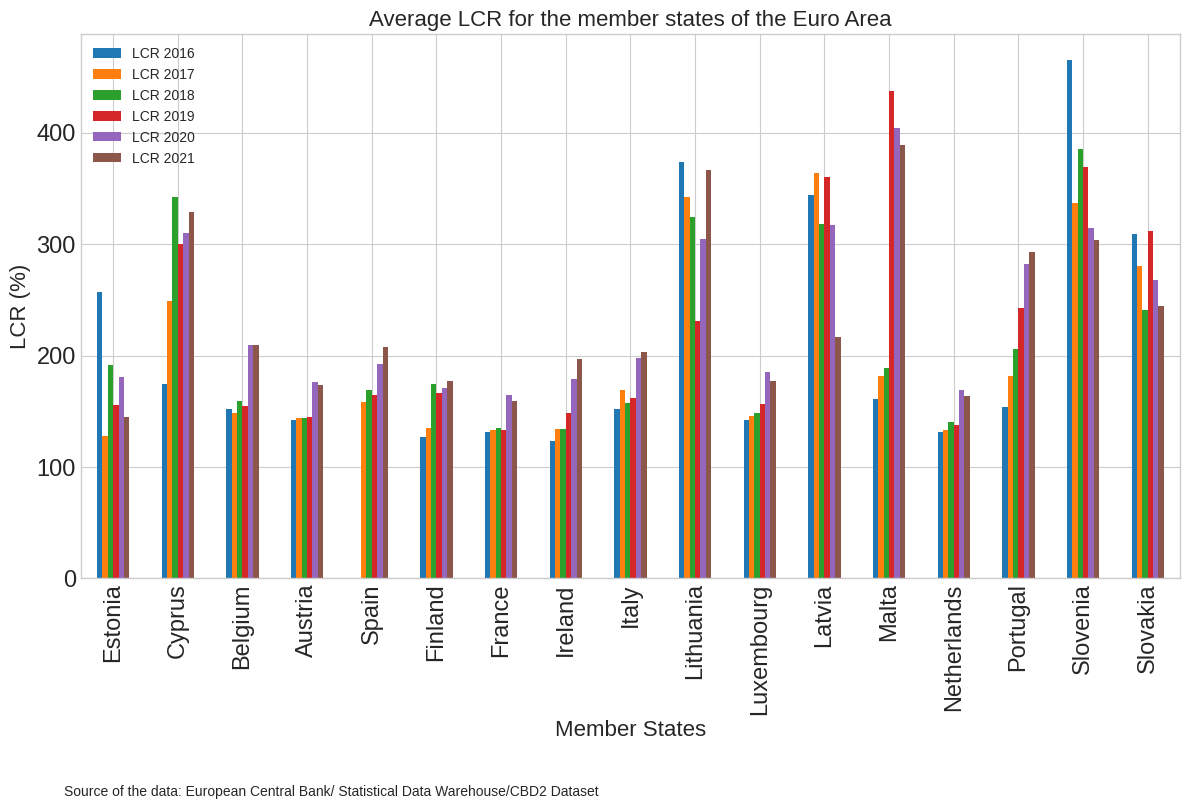

In [ ]:
u=lcr_euro_area.plot(kind='bar', x='Member State', fontsize=17)
plt.ylabel("LCR (%)",fontsize=16)
plt.xlabel("Member States",fontsize=16)
u.set_title('Average LCR for the member states of the Euro Area', fontsize=16)
u.text(-0.015, -0.4,'Source of the data: European Central Bank/ Statistical Data Warehouse/CBD2 Dataset', transform = u.transAxes)


# Missing countries: Germany and Greece due to missing data

<ipython-input-190-33819804188a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-190-33819804188a>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pl.mean().plot(ax = ax, label='Italy', fontsize=15, color=['green'])
<ipython-input-190-33819804188a>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the v

Text(0.5, 1.0, 'LCR Ratio 2016-2021')

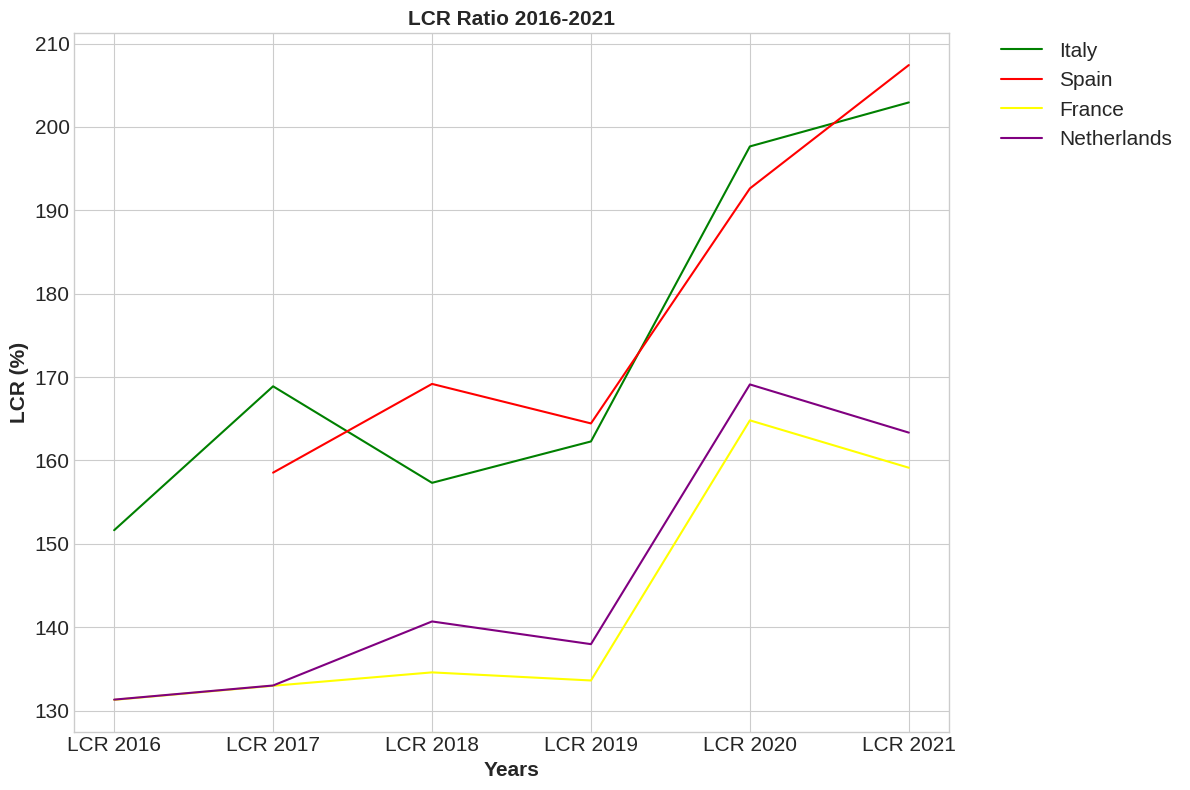

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8


plt.style.use('seaborn-whitegrid')


pl=lcr_euro_area[lcr_euro_area['Member State']=='Italy']
pl_1=lcr_euro_area[lcr_euro_area['Member State']=='Spain']
pl_2=lcr_euro_area[lcr_euro_area['Member State']=='France']
pl_3=lcr_euro_area[lcr_euro_area['Member State']=='Netherlands']


fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl.mean().plot(ax = ax, label='Italy', fontsize=15, color=['green'])
pl_1.mean().plot(ax = ax, label='Spain', color=['red'])
pl_2.mean().plot(ax = ax, label='France', color=['yellow'])
pl_3.mean().plot(ax = ax, label='Netherlands', color=['purple'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
ax.set_xlabel('Years', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('LCR (%)' , fontweight = 'bold', fontsize = 15)
ax.set_title('LCR Ratio 2016-2021', fontweight = 'bold', fontsize = 15)

<ipython-input-191-16a8b61e142f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-191-16a8b61e142f>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pl.mean().plot(ax = ax, label='Portugal', fontsize=15)
<ipython-input-191-16a8b61e142f>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeri

Text(0.5, 1.0, 'LCR Ratio 2016-2021')

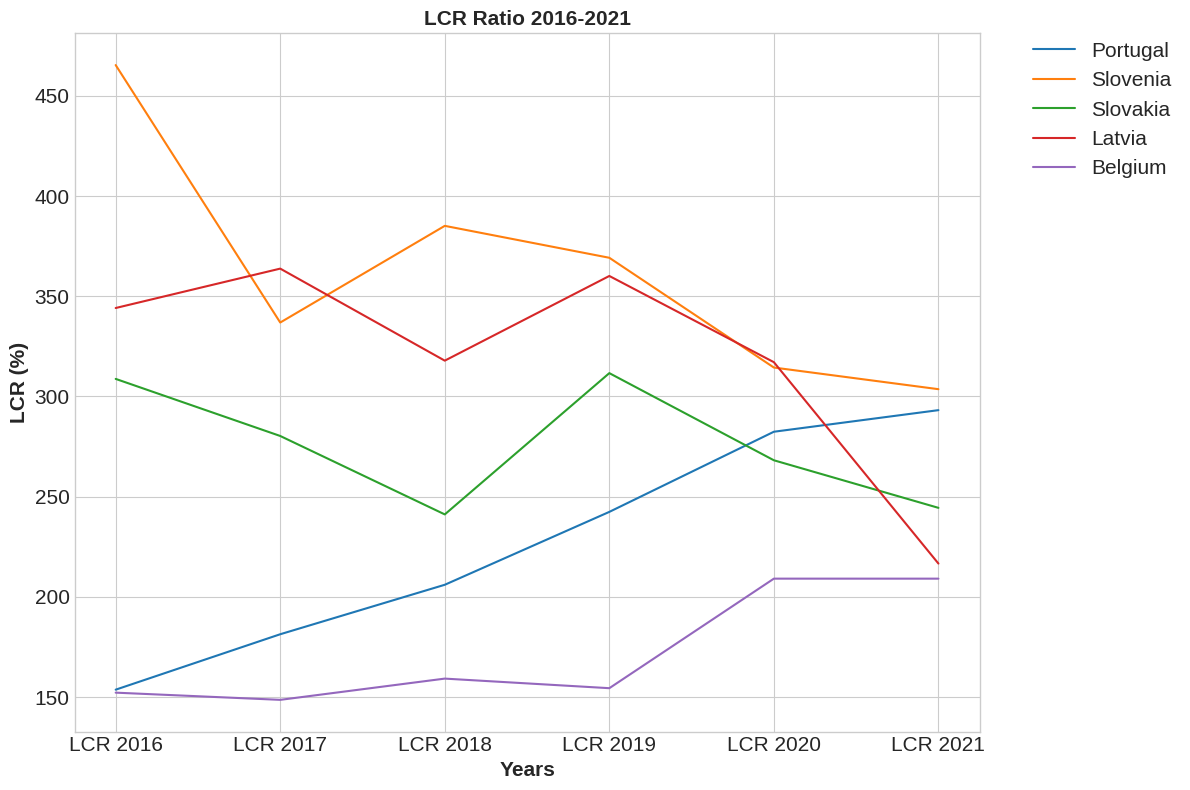

In [ ]:
plt.style.use('seaborn-whitegrid')


pl=lcr_euro_area[lcr_euro_area['Member State']=='Portugal']
pl_1=lcr_euro_area[lcr_euro_area['Member State']=='Slovenia']
pl_2=lcr_euro_area[lcr_euro_area['Member State']=='Slovakia']
pl_3=lcr_euro_area[lcr_euro_area['Member State']=='Latvia']
pl_4=lcr_euro_area[lcr_euro_area['Member State']=='Belgium']


fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl.mean().plot(ax = ax, label='Portugal', fontsize=15)
pl_1.mean().plot(ax = ax, label='Slovenia')
pl_2.mean().plot(ax = ax, label='Slovakia')
pl_3.mean().plot(ax = ax, label='Latvia')
pl_4.mean().plot(ax = ax, label='Belgium')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
ax.set_xlabel('Years', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('LCR (%)' , fontweight = 'bold', fontsize = 15)
ax.set_title('LCR Ratio 2016-2021', fontweight = 'bold', fontsize = 15)

# **6. G-SIBs analysis**





<ipython-input-192-f4065dc44ce5>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Euro area results vs. G-SIBs (2021- 2022)')

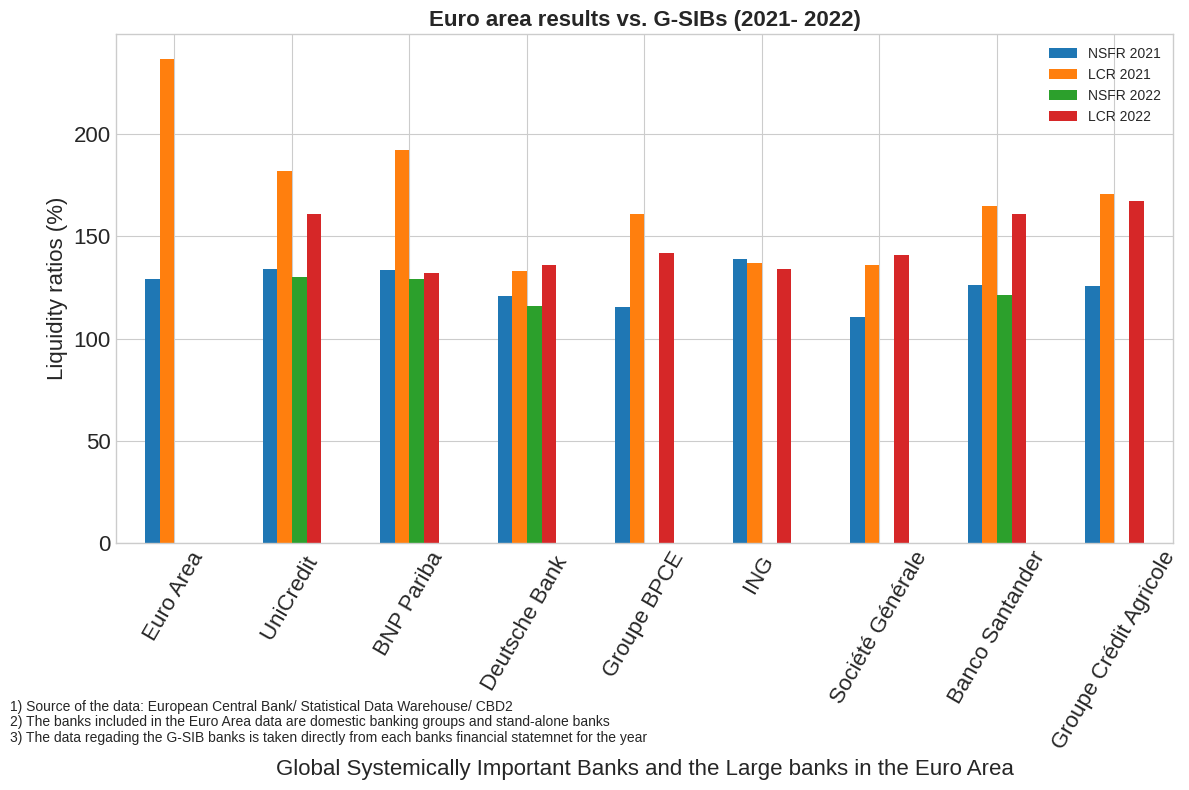

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8


plt.style.use('seaborn-whitegrid')
pl=gsib_df.plot(kind='bar', x='Bank', fontsize = 16, rot = 60)
plt.ylabel("Liquidity ratios (%)",fontsize=16)
plt.xlabel("Global Systemically Important Banks and the Large banks in the Euro Area",fontsize=16)
pl.text(-0.1, -0.33, '1) Source of the data: European Central Bank/ Statistical Data Warehouse/ CBD2', transform = pl.transAxes)
pl.text(-0.1, -0.36, '2) The banks included in the Euro Area data are domestic banking groups and stand-alone banks', transform = pl.transAxes)
pl.text(-0.1, -0.39, '3) The data regading the G-SIB banks is taken directly from each banks financial statemnet for the year', transform = pl.transAxes)
pl.set_title('Euro area results vs. G-SIBs (2021- 2022)', fontweight = 'bold', fontsize = 16)
